#**EUREKA || KOMPI 1**
1. Ahmad Fathullah
2. Baromim Triwijaya
3. Dinda Rahmalia
4. Imelda Wahyuni
5. M. Akbar Purnama Putra
6. Muwirotul Hasanah
7. Nadia Chusnul Ikromah

#**ABOUT DATASET**

##1. Population Exposure to Hot Days
Dataset ini mencatat jumlah populasi yang terpapar oleh hari-hari panas ekstrem. Data ini mengukur dampak kenaikan suhu pada populasi, biasanya dengan menghitung jumlah orang yang terpapar suhu di atas ambang batas tertentu. Hal ini penting untuk memahami risiko kesehatan dan kebutuhan adaptasi di wilayah tertentu.

##2. Production-Based CO2 Emissions
Dataset ini menunjukkan jumlah emisi CO2 yang dihasilkan berdasarkan kegiatan produksi di suatu wilayah atau negara. Emisi berbasis produksi biasanya mencakup CO2 yang dihasilkan oleh industri, transportasi, dan pembangkit energi. Data ini berguna untuk menilai kontribusi suatu wilayah terhadap perubahan iklim global.

##3. Renewable Energy Supply
Dataset ini mencakup informasi tentang pasokan energi dari sumber terbarukan seperti angin, matahari, hidro, dan biomassa. Dataset ini penting untuk memantau upaya transisi energi, mengurangi ketergantungan pada bahan bakar fosil, dan mendukung keberlanjutan energi.

##4. Land Forest
Dataset ini berisi data tentang luas wilayah hutan di suatu daerah atau negara. Hutan memainkan peran penting dalam menyerap CO2 dari atmosfer, sehingga perubahan luas hutan dapat memengaruhi emisi gas rumah kaca. Dataset ini membantu menganalisis pengaruh hutan terhadap mitigasi perubahan iklim.

##5. Population
Dataset ini memuat data jumlah penduduk di suatu wilayah atau negara pada periode waktu tertentu. Data populasi berfungsi sebagai dasar dalam analisis paparan populasi terhadap perubahan iklim, kebutuhan energi, dan pengelolaan sumber daya alam.

In [ ]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import os
from termcolor import colored
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
heat_exposure=pd.read_csv('/content/drive/My Drive/DATASET/hotdays.csv' , sep=',')
co2_emissions=pd.read_csv('/content/drive/My Drive/DATASET/co2.csv' , sep=',')
renewable_energy=pd.read_csv('/content/drive/My Drive/DATASET/EnergySupply.csv' , sep=',')
land_forest=pd.read_csv('/content/drive/My Drive/DATASET/land_forest.csv' , sep=',')
population=pd.read_csv('/content/drive/My Drive/DATASET/world_population.csv' , sep=',')

In [ ]:
# Menampilkan data dari dataframe heat exposure
heat_exposure

STRUCTURE                        STRUCTURE_ID  \
0    DATAFLOW  OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.1)   
1    DATAFLOW  OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.1)   
2    DATAFLOW  OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.1)   
3    DATAFLOW  OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.1)   
4    DATAFLOW  OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.1)   
..        ...                                 ...   
199  DATAFLOW  OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.1)   
200  DATAFLOW  OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.1)   
201  DATAFLOW  OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.1)   
202  DATAFLOW  OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.1)   
203  DATAFLOW  OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.1)   

                      STRUCTURE_NAME ACTION REF_AREA Reference area FREQ  \
0    Exposure to extreme temperature      I      RUS         Russia    A   
1    Exposure to extreme temperature      I      RUS         Russia    A   
2    Exposure to extreme temperature      I      RUS         Russia    A   
3    Exposure to extreme temperature      I      IDN      Indonesia    A   
4    Exposure to extreme temperature      I      IDN      Indonesia    A   
..                               ...    ...      ...            ...  ...   
199  Exposure to extreme temperature      I      IDN      Indonesia    A   
200  Exposure to extreme temperature      I      RUS         Russia    A   
201  Exposure to extreme temperature      I      RUS         Russia    A   
202  Exposure to extreme temperature      I      RUS         Russia    A   
203  Exposure to extreme temperature      I      RUS         Russia    A   

    Frequency of observation     MEASURE                          Measure  \
0                     Annual  HD_POP_EXP  Population exposure to hot days   
1                     Annual  HD_POP_EXP  Population exposure to hot days   
2                     Annual  HD_POP_EXP  Population exposure to hot days   
3                     Annual  HD_POP_EXP  Population exposure to hot days   
4                     Annual  HD_POP_EXP  Population exposure to hot days   
..                       ...         ...                              ...   
199                   Annual  HD_POP_EXP  Population exposure to hot days   
200                   Annual  HD_POP_EXP  Population exposure to hot days   
201                   Annual  HD_POP_EXP  Population exposure to hot days   
202                   Annual  HD_POP_EXP  Population exposure to hot days   
203                   Annual  HD_POP_EXP  Population exposure to hot days   

     ... TIME_PERIOD Time period  OBS_VALUE Observation value OBS_STATUS  \
0    ...        2022         NaN  14.821982               NaN        NaN   
1    ...        2021         NaN  40.797474               NaN        NaN   
2    ...        1999         NaN  19.374571               NaN        NaN   
3    ...        2015         NaN  28.057993               NaN        NaN   
4    ...        2014         NaN  37.714009               NaN        NaN   
..   ...         ...         ...        ...               ...        ...   
199  ...        2003         NaN  20.902961               NaN        NaN   
200  ...        1998         NaN  29.462827               NaN        NaN   
201  ...        1997         NaN   4.766965               NaN        NaN   
202  ...        1996         NaN  28.944020               NaN        NaN   
203  ...        2023         NaN  35.883320               NaN        NaN   

    Observation status UNIT_MULT Unit multiplier DECIMALS Decimals  
0                  NaN         0           Units        2      Two  
1                  NaN         0           Units        2      Two  
2                  NaN         0           Units        2      Two  
3                  NaN         0           Units        2      Two  
4                  NaN         0           Units        2      Two  
..                 ...       ...             ...      ...      ...  
199                NaN         0           Units        2      Two  
200                NaN         0           Units        2      T

In [ ]:
# Menampilkan data dari dataframe CO2 Emissions
co2_emissions

STRUCTURE                              STRUCTURE_ID STRUCTURE_NAME ACTION  \
0    DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
1    DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
2    DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
3    DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
4    DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
..        ...                                       ...            ...    ...   
187  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
188  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
189  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
190  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
191  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   

    REF_AREA Reference area FREQ Frequency of observation   MEASURE  \
0        KAZ     Kazakhstan    A                   Annual  CO2_PBEM   
1        KAZ     Kazakhstan    A                   Annual  CO2_PBEM   
2        KAZ     Kazakhstan    A                   Annual  CO2_PBEM   
3        IND          India    A                   Annual  CO2_PBEM   
4        IND          India    A                   Annual  CO2_PBEM   
..       ...            ...  ...                      ...       ...   
187      IND          India    A                   Annual  CO2_PBEM   
188      IND          India    A                   Annual  CO2_PBEM   
189      IND          India    A                   Annual  CO2_PBEM   
190      IND          India    A                   Annual  CO2_PBEM   
191      IND          India    A                   Annual  CO2_PBEM   

                            Measure  ... UNIT_MULT Unit multiplier PRICE_BASE  \
0    Production-based CO2 emissions  ...         6        Millions         _Z   
1    Production-based CO2 emissions  ...         6        Millions         _Z   
2    Production-based CO2 emissions  ...         6        Millions         _Z   
3    Production-based CO2 emissions  ...         6        Millions         _Z   
4    Production-based CO2 emissions  ...         6        Millions         _Z   
..                              ...  ...       ...             ...        ...   
187  Production-based CO2 emissions  ...         6        Millions         _Z   
188  Production-based CO2 emissions  ...         6        Millions         _Z   
189  Production-based CO2 emissions  ...         6        Millions         _Z   
190  Production-based CO2 emissions  ...         6        Millions         _Z   
191  Production-based CO2 emissions  ...         6        Millions         _Z   

         Price base  BASE_PER  Base period  TIMELINESS   Timeliness DECIMALS  \
0    Not applicable       NaN          NaN           2  2 years lag        2   
1    Not applicable       NaN          NaN           2  2 years lag        2   
2    Not applicable       NaN          NaN           2  2 years lag        2   
3    Not applicable       NaN          NaN           2  2 years lag        2   
4    Not applicable       NaN          NaN           2  2 years lag        2   
..              ...       ...          ...         ...          ...      ...   
187  Not applicable       NaN          NaN           2  2 years lag        2   
188  Not applicable       NaN          NaN           2  2 years lag        2   
189  Not applicable       NaN          NaN           2  2 years lag        2   
190  Not applicable       NaN          NaN           2  2 years lag        2   
191  Not applicable       NaN          NaN           2  2 years lag        2   

    Decimals  
0        Two  
1        Two  
2        Two  
3        Two  
4        Two  
..       ...  
187      Two  
188      Two  
189      Two  
190      Two  
191      Two  

[192 rows x 32 columns]

In [ ]:
# Menampilkan data dari dataframe Renewable Energy
renewable_energy

STRUCTURE                              STRUCTURE_ID STRUCTURE_NAME ACTION  \
0    DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
1    DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
2    DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
3    DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
4    DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
..        ...                                       ...            ...    ...   
403  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
404  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
405  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
406  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
407  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   

    REF_AREA Reference area FREQ Frequency of observation  MEASURE  \
0        SAU   Saudi Arabia    A                   Annual  RE_TPES   
1        SAU   Saudi Arabia    A                   Annual  RE_TPES   
2        SAU   Saudi Arabia    A                   Annual  RE_TPES   
3        SAU   Saudi Arabia    A                   Annual  RE_TPES   
4        SAU   Saudi Arabia    A                   Annual  RE_TPES   
..       ...            ...  ...                      ...      ...   
403      KAZ     Kazakhstan    A                   Annual  RE_TPES   
404      KAZ     Kazakhstan    A                   Annual  RE_TPES   
405      KAZ     Kazakhstan    A                   Annual  RE_TPES   
406      KAZ     Kazakhstan    A                   Annual  RE_TPES   
407      KAZ     Kazakhstan    A                   Annual  RE_TPES   

                     Measure  ... UNIT_MULT Unit multiplier PRICE_BASE  \
0    Renewable energy supply  ...         3       Thousands         _Z   
1    Renewable energy supply  ...         3       Thousands         _Z   
2    Renewable energy supply  ...         3       Thousands         _Z   
3    Renewable energy supply  ...         3       Thousands         _Z   
4    Renewable energy supply  ...         3       Thousands         _Z   
..                       ...  ...       ...             ...        ...   
403  Renewable energy supply  ...         0           Units         _Z   
404  Renewable energy supply  ...         0           Units         _Z   
405  Renewable energy supply  ...         0           Units         _Z   
406  Renewable energy supply  ...         0           Units         _Z   
407  Renewable energy supply  ...         0           Units         _Z   

         Price base  BASE_PER  Base period  TIMELINESS          Timeliness  \
0    Not applicable       NaN          NaN           1  1 year lag, timely   
1    Not applicable       NaN          NaN           1  1 year lag, timely   
2    Not applicable       NaN          NaN           1  1 year lag, timely   
3    Not applicable       NaN          NaN           1  1 year lag, timely   
4    Not applicable       NaN          NaN           1  1 year lag, timely   
..              ...       ...          ...         ...                 ...   
403  Not applicable       NaN          NaN           1  1 year lag, timely   
404  Not applicable       NaN          NaN           1  1 year lag, timely   
405  Not applicable       NaN          NaN           1  1 year lag, timely   
406  Not applicable       NaN          NaN           1  1 year lag, timely   
407  Not applicable       NaN          NaN           1  1 year lag, timely   

    DECIMALS Decimals  
0          2      Two  
1          2      Two  
2          2      Two  
3          2      Two  
4          2      Two  
..       ...      ...  
403        2      Two  
404        2      Two  
405        2      Two  
406        2      Two  
407        2      Two  

[408 rows x 32 columns]

In [ ]:
# Menampilkan data dari dataframe Land Forest
land_forest

STRUCTURE                                STRUCTURE_ID STRUCTURE_NAME  \
0    DATAFLOW  OECD.ENV.EPI:DSD_LAND_USE@DF_LAND_USE(1.0)       Land use   
1    DATAFLOW  OECD.ENV.EPI:DSD_LAND_USE@DF_LAND_USE(1.0)       Land use   
2    DATAFLOW  OECD.ENV.EPI:DSD_LAND_USE@DF_LAND_USE(1.0)       Land use   
3    DATAFLOW  OECD.ENV.EPI:DSD_LAND_USE@DF_LAND_USE(1.0)       Land use   
4    DATAFLOW  OECD.ENV.EPI:DSD_LAND_USE@DF_LAND_USE(1.0)       Land use   
..        ...                                         ...            ...   
189  DATAFLOW  OECD.ENV.EPI:DSD_LAND_USE@DF_LAND_USE(1.0)       Land use   
190  DATAFLOW  OECD.ENV.EPI:DSD_LAND_USE@DF_LAND_USE(1.0)       Land use   
191  DATAFLOW  OECD.ENV.EPI:DSD_LAND_USE@DF_LAND_USE(1.0)       Land use   
192  DATAFLOW  OECD.ENV.EPI:DSD_LAND_USE@DF_LAND_USE(1.0)       Land use   
193  DATAFLOW  OECD.ENV.EPI:DSD_LAND_USE@DF_LAND_USE(1.0)       Land use   

    ACTION REF_AREA                Reference area FREQ  \
0        I      CHN  China (People’s Republic of)    A   
1        I      CHN  China (People’s Republic of)    A   
2        I      CHN  China (People’s Republic of)    A   
3        I      CHN  China (People’s Republic of)    A   
4        I      CHN  China (People’s Republic of)    A   
..     ...      ...                           ...  ...   
189      I      SAU                  Saudi Arabia    A   
190      I      KAZ                    Kazakhstan    A   
191      I      IND                         India    A   
192      I      IDN                     Indonesia    A   
193      I      RUS                        Russia    A   

    Frequency of observation MEASURE Measure  ... TIME_PERIOD Time period  \
0                     Annual  FOREST  Forest  ...        2004         NaN   
1                     Annual  FOREST  Forest  ...        1993         NaN   
2                     Annual  FOREST  Forest  ...        1992         NaN   
3                     Annual  FOREST  Forest  ...        1991         NaN   
4                     Annual  FOREST  Forest  ...        1990         NaN   
..                       ...     ...     ...  ...         ...         ...   
189                   Annual  FOREST  Forest  ...        2005         NaN   
190                   Annual  FOREST  Forest  ...        2007         NaN   
191                   Annual  FOREST  Forest  ...        2005         NaN   
192                   Annual  FOREST  Forest  ...        2005         NaN   
193                   Annual  FOREST  Forest  ...        2007         NaN   

      OBS_VALUE  Observation value  OBS_STATUS  Observation status UNIT_MULT  \
0    1864445.00                NaN           E     Estimated value         0   
1    1630986.00                NaN           E     Estimated value         0   
2    1611126.00                NaN           E     Estimated value         0   
3    1591266.00                NaN           E     Estimated value         0   
4    1571406.00                NaN           A        Normal value         0   
..          ...                ...         ...                 ...       ...   
189     9770.00                NaN           E     Estimated value         0   
190    31046.04                NaN           E     Estimated value         0   
191   685435.00                NaN           E     Estimated value         0   
192  1004696.00                NaN           E     Estimated value         0   
193  8133755.00                NaN           E     Estimated value         0   

    Unit multiplier  DECIMALS Decimals  
0             Units         1      One  
1             Units         1      One  
2             Units         1      One  
3             Units         1      One  
4             Units         1      One  
..              ...       ...      ...  
189           Units         1      One  
190           Units         1      One  
191           Units         1      One  
192           Units         1      One  
193           Units         1      One  

[194 rows x 22 

In [ ]:
# Menampilkan data dari dataframe Population
population

nation  period  population
0      Afghanistan  -10000       14737
1      Afghanistan   -9000       20405
2      Afghanistan   -8000       28253
3      Afghanistan   -7000       39120
4      Afghanistan   -6000       54166
...            ...     ...         ...
59172     Zimbabwe    2019    15271377
59173     Zimbabwe    2020    15526888
59174     Zimbabwe    2021    15797220
59175     Zimbabwe    2022    16069061
59176     Zimbabwe    2023    16340829

[59177 rows x 3 columns]

### Dataframe baru dari dataset Heat Exposure

In [ ]:
# Membuat dataframe baru dengan mengambil nilai kolom dari dataframe data
df1 = heat_exposure[['Reference area', 'Measure','TIME_PERIOD', 'OBS_VALUE']].copy()

In [ ]:
# Menampilkan data dari dataframe heat exposure
df1

Reference area                          Measure  TIME_PERIOD  OBS_VALUE
0           Russia  Population exposure to hot days         2022  14.821982
1           Russia  Population exposure to hot days         2021  40.797474
2           Russia  Population exposure to hot days         1999  19.374571
3        Indonesia  Population exposure to hot days         2015  28.057993
4        Indonesia  Population exposure to hot days         2014  37.714009
..             ...                              ...          ...        ...
199      Indonesia  Population exposure to hot days         2003  20.902961
200         Russia  Population exposure to hot days         1998  29.462827
201         Russia  Population exposure to hot days         1997   4.766965
202         Russia  Population exposure to hot days         1996  28.944020
203         Russia  Population exposure to hot days         2023  35.883320

[204 rows x 4 columns]

In [ ]:
# Melihat informasi data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Reference area  204 non-null    object 
 1   Measure         204 non-null    object 
 2   TIME_PERIOD     204 non-null    int64  
 3   OBS_VALUE       204 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.5+ KB


Secara keseluruhan, output di atas memberikan gambaran tentang struktur dan jenis data dalam DataFrame.

In [ ]:
#  Mengubah nama kolom
df1.rename(columns={'TIME_PERIOD':'period','OBS_VALUE':'value','Reference area':'nation','Measure':'parameter'},inplace=True)
df1.head()

nation                        parameter  period      value
0     Russia  Population exposure to hot days    2022  14.821982
1     Russia  Population exposure to hot days    2021  40.797474
2     Russia  Population exposure to hot days    1999  19.374571
3  Indonesia  Population exposure to hot days    2015  28.057993
4  Indonesia  Population exposure to hot days    2014  37.714009

In [ ]:
# Membuat pivot table dari df1
df1 = df1.pivot_table(index=['period','nation'],columns='parameter',values='value')

In [ ]:
# Mereset indeks dari DataFrame yang sudah dipivot (pivoted DataFrame)
df1.reset_index(inplace=True)

In [ ]:
# Menampilkan data dari df1
df1

parameter  period                        nation  \
0            1990  China (People’s Republic of)   
1            1990                         India   
2            1990                     Indonesia   
3            1990                    Kazakhstan   
4            1990                        Russia   
..            ...                           ...   
199          2023                         India   
200          2023                     Indonesia   
201          2023                    Kazakhstan   
202          2023                        Russia   
203          2023                  Saudi Arabia   

parameter  Population exposure to hot days  
0                                55.451665  
1                                14.449631  
2                                20.559384  
3                                63.489118  
4                                 6.712737  
..                                     ...  
199                               7.078080  
200                              36.063690  
201                              58.026301  
202                              35.883320  
203                               1.273601  

[204 rows x 3 columns]

In [ ]:
# Mengganti teks 'China (People’s Republic of)' menjadi 'China'
df1['nation'] = df1['nation'].replace('China (People’s Republic of)', 'China')
df1

parameter  period        nation  Population exposure to hot days
0            1990         China                        55.451665
1            1990         India                        14.449631
2            1990     Indonesia                        20.559384
3            1990    Kazakhstan                        63.489118
4            1990        Russia                         6.712737
..            ...           ...                              ...
199          2023         India                         7.078080
200          2023     Indonesia                        36.063690
201          2023    Kazakhstan                        58.026301
202          2023        Russia                        35.883320
203          2023  Saudi Arabia                         1.273601

[204 rows x 3 columns]

### Dataframe baru dari dataset CO2 Emissions

In [ ]:
# Membuat dataframe baru dengan mengambil nilai kolom dari dataframe data
df2 = co2_emissions[['Reference area', 'Measure','TIME_PERIOD', 'OBS_VALUE']].copy()

In [ ]:
# Menampilkan data dari dataframe heat exposure
df2

Reference area                         Measure  TIME_PERIOD  OBS_VALUE
0       Kazakhstan  Production-based CO2 emissions         2003     134.80
1       Kazakhstan  Production-based CO2 emissions         2002     119.58
2       Kazakhstan  Production-based CO2 emissions         2006     172.94
3            India  Production-based CO2 emissions         2019    2277.78
4            India  Production-based CO2 emissions         2018    2316.24
..             ...                             ...          ...        ...
187          India  Production-based CO2 emissions         1990     530.12
188          India  Production-based CO2 emissions         2014    2026.90
189          India  Production-based CO2 emissions         2013    1860.19
190          India  Production-based CO2 emissions         2012    1804.59
191          India  Production-based CO2 emissions         2011    1661.67

[192 rows x 4 columns]

In [ ]:
# Melihat informasi data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Reference area  192 non-null    object 
 1   Measure         192 non-null    object 
 2   TIME_PERIOD     192 non-null    int64  
 3   OBS_VALUE       192 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ KB


Secara keseluruhan, output di atas memberikan gambaran tentang struktur dan jenis data dalam DataFrame.

In [ ]:
#  Mengubah nama kolom
df2.rename(columns={'TIME_PERIOD':'period','OBS_VALUE':'value','Reference area':'nation','Measure':'parameter'},inplace=True)
df2.head()

nation                       parameter  period    value
0  Kazakhstan  Production-based CO2 emissions    2003   134.80
1  Kazakhstan  Production-based CO2 emissions    2002   119.58
2  Kazakhstan  Production-based CO2 emissions    2006   172.94
3       India  Production-based CO2 emissions    2019  2277.78
4       India  Production-based CO2 emissions    2018  2316.24

In [ ]:
# Membuat pivot table dari df2
df2 = df2.pivot_table(index=['period','nation'],columns='parameter',values='value')

In [ ]:
# Mereset indeks dari DataFrame yang sudah dipivot (pivoted DataFrame)
df2.reset_index(inplace=True)

In [ ]:
df2

parameter  period                        nation  \
0            1990  China (People’s Republic of)   
1            1990                         India   
2            1990                     Indonesia   
3            1990                    Kazakhstan   
4            1990                        Russia   
..            ...                           ...   
187          2021                         India   
188          2021                     Indonesia   
189          2021                    Kazakhstan   
190          2021                        Russia   
191          2021                  Saudi Arabia   

parameter  Production-based CO2 emissions  
0                                 2088.85  
1                                  530.12  
2                                  131.11  
3                                  237.25  
4                                 2163.53  
..                                    ...  
187                               2279.01  
188                                556.57  
189                                223.69  
190                               1677.64  
191                                497.25  

[192 rows x 3 columns]

In [ ]:
# Mengganti teks 'China (People’s Republic of)' menjadi 'China'
df2['nation'] = df2['nation'].replace('China (People’s Republic of)', 'China')
df2

parameter  period        nation  Production-based CO2 emissions
0            1990         China                         2088.85
1            1990         India                          530.12
2            1990     Indonesia                          131.11
3            1990    Kazakhstan                          237.25
4            1990        Russia                         2163.53
..            ...           ...                             ...
187          2021         India                         2279.01
188          2021     Indonesia                          556.57
189          2021    Kazakhstan                          223.69
190          2021        Russia                         1677.64
191          2021  Saudi Arabia                          497.25

[192 rows x 3 columns]

### Dataframe baru dari dataset Renewable Energy

In [ ]:
# Membuat dataframe baru dengan mengambil nilai kolom dari dataframe data
df3 = renewable_energy[['Reference area', 'Measure','TIME_PERIOD', 'OBS_VALUE']].copy()

In [ ]:
# Menampilkan sampel 5 data tearatas dari dataframe
df3

Reference area                  Measure  TIME_PERIOD  OBS_VALUE
0     Saudi Arabia  Renewable energy supply         2001    4485.60
1     Saudi Arabia  Renewable energy supply         2000    4485.60
2     Saudi Arabia  Renewable energy supply         1999    4485.60
3     Saudi Arabia  Renewable energy supply         1998    4485.60
4     Saudi Arabia  Renewable energy supply         2023        NaN
..             ...                      ...          ...        ...
403     Kazakhstan  Renewable energy supply         2021       1.61
404     Kazakhstan  Renewable energy supply         2020       1.67
405     Kazakhstan  Renewable energy supply         2019       1.47
406     Kazakhstan  Renewable energy supply         2018       1.42
407     Kazakhstan  Renewable energy supply         2017       1.67

[408 rows x 4 columns]

In [ ]:
# Melihat informasi data
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Reference area  408 non-null    object 
 1   Measure         408 non-null    object 
 2   TIME_PERIOD     408 non-null    int64  
 3   OBS_VALUE       398 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.9+ KB


Secara keseluruhan, output di atas memberikan gambaran tentang struktur dan jenis data dalam DataFrame.

In [ ]:
# Melihat apakah ada nilai missing value nya atau tidak di dataset yang digunakan
df3.isnull().sum()

Reference area     0
Measure            0
TIME_PERIOD        0
OBS_VALUE         10
dtype: int64

In [ ]:
df3['Reference area'].unique()


array(['Saudi Arabia', 'Russia', 'China (People’s Republic of)',
       'Indonesia', 'Kazakhstan', 'India'], dtype=object)

In [ ]:

p=df3[df3['Reference area'] == 'Indonesia']
p.sort_values(by='TIME_PERIOD')

Reference area                  Measure  TIME_PERIOD    OBS_VALUE
247      Indonesia  Renewable energy supply         1990        37.75
145      Indonesia  Renewable energy supply         1990  31969079.10
246      Indonesia  Renewable energy supply         1991        36.34
144      Indonesia  Renewable energy supply         1991  32375890.80
143      Indonesia  Renewable energy supply         1992  32982803.10
..             ...                      ...          ...          ...
267      Indonesia  Renewable energy supply         2021        24.02
164      Indonesia  Renewable energy supply         2022  59460328.10
266      Indonesia  Renewable energy supply         2022        22.79
163      Indonesia  Renewable energy supply         2023          NaN
265      Indonesia  Renewable energy supply         2023          NaN

[68 rows x 4 columns]

In [ ]:
#  Mengubah nama kolom
df3.rename(columns={'TIME_PERIOD':'period','OBS_VALUE':'value','Reference area':'nation','Measure':'parameter'},inplace=True)
df3.head()

nation                parameter  period   value
0  Saudi Arabia  Renewable energy supply    2001  4485.6
1  Saudi Arabia  Renewable energy supply    2000  4485.6
2  Saudi Arabia  Renewable energy supply    1999  4485.6
3  Saudi Arabia  Renewable energy supply    1998  4485.6
4  Saudi Arabia  Renewable energy supply    2023     NaN

In [ ]:
# Membuat pivot table dari df3
df3 = df3.pivot_table(index=['period','nation'],columns='parameter',values='value')

In [ ]:
# Mereset indeks dari DataFrame yang sudah dipivot (pivoted DataFrame)
df3.reset_index(inplace=True)

In [ ]:
df3

parameter  period                        nation  Renewable energy supply
0            1990  China (People’s Republic of)             1.056871e+08
1            1990                         India             5.704038e+07
2            1990                     Indonesia             1.598456e+07
3            1990                    Kazakhstan             3.740045e+05
4            1990                        Russia             1.323627e+07
..            ...                           ...                      ...
194          2022                     Indonesia             2.973018e+07
195          2022                    Kazakhstan             5.991054e+05
196          2022                        Russia             1.020867e+07
197          2022                  Saudi Arabia             1.126673e+05
198          2023                    Kazakhstan             6.223170e+05

[199 rows x 3 columns]

In [ ]:
# Mengganti teks 'China (People’s Republic of)' menjadi 'China'
df3['nation'] = df3['nation'].replace('China (People’s Republic of)', 'China')
df3

parameter  period        nation  Renewable energy supply
0            1990         China             1.056871e+08
1            1990         India             5.704038e+07
2            1990     Indonesia             1.598456e+07
3            1990    Kazakhstan             3.740045e+05
4            1990        Russia             1.323627e+07
..            ...           ...                      ...
194          2022     Indonesia             2.973018e+07
195          2022    Kazakhstan             5.991054e+05
196          2022        Russia             1.020867e+07
197          2022  Saudi Arabia             1.126673e+05
198          2023    Kazakhstan             6.223170e+05

[199 rows x 3 columns]

### Dataframe baru dari dataset Land Forest

In [ ]:
# Membuat dataframe baru dengan mengambil nilai kolom dari dataframe data
df4 = land_forest[['Reference area', 'Measure','TIME_PERIOD', 'OBS_VALUE']].copy()

In [ ]:
# Menampilkan sampel 5 data tearatas dari dataframe
df4

Reference area Measure  TIME_PERIOD   OBS_VALUE
0    China (People’s Republic of)  Forest         2004  1864445.00
1    China (People’s Republic of)  Forest         1993  1630986.00
2    China (People’s Republic of)  Forest         1992  1611126.00
3    China (People’s Republic of)  Forest         1991  1591266.00
4    China (People’s Republic of)  Forest         1990  1571406.00
..                            ...     ...          ...         ...
189                  Saudi Arabia  Forest         2005     9770.00
190                    Kazakhstan  Forest         2007    31046.04
191                         India  Forest         2005   685435.00
192                     Indonesia  Forest         2005  1004696.00
193                        Russia  Forest         2007  8133755.00

[194 rows x 4 columns]

In [ ]:
# Melihat informasi data
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Reference area  194 non-null    object 
 1   Measure         194 non-null    object 
 2   TIME_PERIOD     194 non-null    int64  
 3   OBS_VALUE       194 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ KB


In [ ]:
#  Mengubah nama kolom
df4.rename(columns={'TIME_PERIOD':'period','OBS_VALUE':'value','Reference area':'nation','Measure':'parameter'},inplace=True)
df4.head()

nation parameter  period      value
0  China (People’s Republic of)    Forest    2004  1864445.0
1  China (People’s Republic of)    Forest    1993  1630986.0
2  China (People’s Republic of)    Forest    1992  1611126.0
3  China (People’s Republic of)    Forest    1991  1591266.0
4  China (People’s Republic of)    Forest    1990  1571406.0

In [ ]:
# Membuat pivot table dari df4
df4 = df4.pivot_table(index=['period','nation'],columns='parameter',values='value')

In [ ]:
# Mereset indeks dari DataFrame yang sudah dipivot (pivoted DataFrame)
df4.reset_index(inplace=True)

In [ ]:
# Mengganti teks 'China (People’s Republic of)' menjadi 'China'
df4['nation'] = df4['nation'].replace('China (People’s Republic of)', 'China')
df4

parameter  period        nation      Forest
0            1990         China  1571406.00
1            1990         India   639380.00
2            1990     Indonesia  1185450.00
3            1990  Saudi Arabia     9770.00
4            1991         China  1591266.00
..            ...           ...         ...
189          2022         India   726928.00
190          2022     Indonesia   909221.30
191          2022    Kazakhstan    35131.59
192          2022        Russia  8153116.00
193          2022  Saudi Arabia     9770.00

[194 rows x 3 columns]

### Dataframe baru dari dataset Population

In [ ]:
# Membuat salinan dataframe population dan menyimpannya dalam dataframe baru bernama df5.
df5 = population.copy()

In [ ]:
# Melihat data dari df5
df5

nation  period  population
0      Afghanistan  -10000       14737
1      Afghanistan   -9000       20405
2      Afghanistan   -8000       28253
3      Afghanistan   -7000       39120
4      Afghanistan   -6000       54166
...            ...     ...         ...
59172     Zimbabwe    2019    15271377
59173     Zimbabwe    2020    15526888
59174     Zimbabwe    2021    15797220
59175     Zimbabwe    2022    16069061
59176     Zimbabwe    2023    16340829

[59177 rows x 3 columns]

## Menggabungkan Dataframe

In [ ]:
# Menggabungkan kelima dataset secara vertikal
combined_df = df1.merge(df2, on=['period', 'nation'], how='outer') \
               .merge(df3, on=['period', 'nation'], how='outer') \
               .merge(df4, on=['period', 'nation'], how='outer') \
               .merge(df5, on=['period', 'nation'], how='inner')

In [ ]:
# Menghapus kolom 'index' dari dataframe
combined_df = combined_df.drop(columns='index', errors='ignore')

In [ ]:
# Mengurutkan berdasarkan 'Reference area' (negara) dan 'period' (tahun)
p_sorted = combined_df.sort_values(by=['nation', 'period'])
p_sorted


period        nation  Population exposure to hot days  \
0      1990         China                        55.451665   
6      1991         China                        59.489104   
12     1992         China                        52.056536   
18     1993         China                        56.922244   
24     1994         China                        51.537795   
..      ...           ...                              ...   
179    2019  Saudi Arabia                         1.483676   
185    2020  Saudi Arabia                         1.715791   
191    2021  Saudi Arabia                         1.321411   
197    2022  Saudi Arabia                         3.289547   
203    2023  Saudi Arabia                         1.273601   

     Production-based CO2 emissions  Renewable energy supply     Forest  \
0                           2088.85             1.056871e+08  1571406.0   
6                           2200.89             1.066027e+08  1591266.0   
12                          2295.78             1.075093e+08  1611126.0   
18                          2500.73             1.088953e+08  1630986.0   
24                          2599.50             1.098287e+08  1650846.0   
..                              ...                      ...        ...   
179                          498.31             1.768681e+04     9770.0   
185                          483.15             4.335027e+04     9770.0   
191                          497.25             4.693062e+04     9770.0   
197                             NaN             1.126673e+05     9770.0   
203                             NaN                      NaN        NaN   

     population  
0    1153582718  
6    1170788527  
12   1184574240  
18   1197308569  
24   1209003100  
..          ...  
179    30472810  
185    30991205  
191    31328374  
197    32175352  
203    33264288  

[204 rows x 7 columns]

Tabel diatas menunjukan gabungan dari ke 5 dataset yang digabungkan menjadi 1 dataframe yang bernama **combined_df**

In [ ]:
# Menampilkan nilai unik dari kolom nation
p_sorted['nation'].unique()

array(['China', 'India', 'Indonesia', 'Kazakhstan', 'Russia',
       'Saudi Arabia'], dtype=object)

Output di atas menunjukkan daftar nilai unik yang terdapat di kolom nation. Nilai-nilai unik tersebut adalah China, India,
Indonesia, Kazakhstan, Russia, dan Saudi Arabia.

In [ ]:
# Membuat salinan dataframe p_sorted dan menyimpannya ke dalam dataframe baru bernama df
df = p_sorted.copy()

#**C1. Data Preparation**

###1. Mencari missing value dan mengatasi masalah missing value

In [ ]:
# Melihat apakah ada nilai missing value nya atau tidak di dataset yang digunakan
df.isnull().sum()

period                              0
nation                              0
Population exposure to hot days     0
Production-based CO2 emissions     12
Renewable energy supply             5
Forest                             10
population                          0
dtype: int64

Berdasarkan hasil output diatas menunjukan bahwa kolom **Production-based CO2 Emissions** mempunyai **12 missing value** dan kolom **Forest** mempunyai **10 missing value**

In [ ]:
# Menampilkan baris-baris yang memiliki nilai kosong (missing values) di salah satu kolomnya.
df[df.isnull().any(axis=1)]

period        nation  Population exposure to hot days  \
192    2022         China                        26.870622   
198    2023         China                        52.977458   
193    2022         India                         8.591882   
199    2023         India                         7.078080   
194    2022     Indonesia                         6.993986   
200    2023     Indonesia                        36.063690   
3      1990    Kazakhstan                        63.489118   
9      1991    Kazakhstan                        58.078624   
195    2022    Kazakhstan                        55.228697   
201    2023    Kazakhstan                        58.026301   
4      1990        Russia                         6.712737   
10     1991        Russia                        30.062201   
196    2022        Russia                        14.821982   
202    2023        Russia                        35.883320   
197    2022  Saudi Arabia                         3.289547   
203    2023  Saudi Arabia                         1.273601   

     Production-based CO2 emissions  Renewable energy supply      Forest  \
192                             NaN             1.966229e+08  2237373.00   
198                             NaN                      NaN         NaN   
193                             NaN             1.209748e+08   726928.00   
199                             NaN                      NaN         NaN   
194                             NaN             2.973018e+07   909221.30   
200                             NaN                      NaN         NaN   
3                            237.25             3.740045e+05         NaN   
9                            246.37             3.668678e+05         NaN   
195                             NaN             5.991054e+05    35131.59   
201                             NaN             6.223170e+05         NaN   
4                           2163.53             1.323627e+07         NaN   
10                          2136.44             1.296413e+07         NaN   
196                             NaN             1.020867e+07  8153116.00   
202                             NaN                      NaN         NaN   
197                             NaN             1.126673e+05     9770.00   
203                             NaN                      NaN         NaN   

     population  
192  1425179562  
198  1422584937  
193  1425423212  
199  1438069597  
194   278830529  
200   281190068  
3      17154060  
9      17278604  
195    20034612  
201    20330106  
4     148979538  
10    149448434  
196   145579890  
202   145440504  
197    32175352  
203    33264288

Tabel diatas menunjukan masih ada beberapa missing value pada kolom Production-based CO2 Emission dan kolom Forest.

### Mengatasi Missing Value Emisi CO2

In [ ]:
# Isi NaN pada kolom 'value' berdasarkan nilai di atasnya dengan 'nation' yang sama
df['Production-based CO2 emissions'] = df.groupby('nation')['Production-based CO2 emissions'].fillna(method='ffill')

In [ ]:
# Menghitung jumlah missing values di setiap kolom
df.isnull().sum()

period                              0
nation                              0
Population exposure to hot days     0
Production-based CO2 emissions      0
Renewable energy supply             5
Forest                             10
population                          0
dtype: int64

Missing value pada kolom Production-based CO2 emissions sudah teratasi.

###Menangani Missing Value Renewable energy supply

In [ ]:
df['Renewable energy supply'] = df.groupby('nation')['Renewable energy supply'].fillna(method='ffill')

In [ ]:
# Menghitung jumlah missing values di setiap kolom
df.isnull().sum()

period                              0
nation                              0
Population exposure to hot days     0
Production-based CO2 emissions      0
Renewable energy supply             0
Forest                             10
population                          0
dtype: int64

### Menangani Missing Value Forest

In [ ]:
# Isi NaN pada kolom 'value' berdasarkan nilai di atasnya dengan 'nation' yang sama
df['Forest'] = df.groupby('nation')['Forest'].fillna(method='ffill')
df[df.isnull().any(axis=1)]

period      nation  Population exposure to hot days  \
3     1990  Kazakhstan                        63.489118   
9     1991  Kazakhstan                        58.078624   
4     1990      Russia                         6.712737   
10    1991      Russia                        30.062201   

    Production-based CO2 emissions  Renewable energy supply  Forest  \
3                           237.25             3.740045e+05     NaN   
9                           246.37             3.668678e+05     NaN   
4                          2163.53             1.323627e+07     NaN   
10                         2136.44             1.296413e+07     NaN   

    population  
3     17154060  
9     17278604  
4    148979538  
10   149448434

In [ ]:
# Isi NaN pada kolom 'value' berdasarkan nilai di bawahnya dengan 'nation' yang sama
df['Forest'] = df.groupby('nation')['Forest'].fillna(method='bfill')

Tabel diatas menunjukan missing value pada kolom Production-based CO2 emissions dan kolom Forest sudah teratasi.

In [ ]:
# Menghitung jumlah missing values di setiap kolom
df.isnull().sum()

period                             0
nation                             0
Population exposure to hot days    0
Production-based CO2 emissions     0
Renewable energy supply            0
Forest                             0
population                         0
dtype: int64

Output diatas menunjukan sudah tidak ada lagi missing value pada tiap kolomnya.

###2. Mencari data duplikat dan menyelesaikan masalah duplicate value

In [ ]:
# Melihat apakah ada nilai missing value nya atau tidak di dataset yang digunakan
combined_df.duplicated().sum()

0

Berdasarkan output di atas yang menunjukkan nilai 0, berarti tidak ada data duplikat dalam dataset.

###3. Memeriksa outlier dan mengatasi outlier

In [ ]:
# Menentukan kolom yang ingin diperiksa
columns_to_check = ['Population exposure to hot days', 'Production-based CO2 emissions', 'Renewable energy supply', 'Forest']

# Menggunakan grup 'nation' dan mencari outlier di setiap grup
outliers = pd.DataFrame()

for nation in df['nation'].unique():
    # Filter data berdasarkan nation
    nation_data = df[df['nation'] == nation]

    for column in columns_to_check:
        # Menghitung Q1, Q3, dan IQR untuk setiap kolom
        Q1 = nation_data[column].quantile(0.25)
        Q3 = nation_data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Menentukan batas bawah dan atas untuk outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menemukan outlier berdasarkan batas
        nation_outliers = nation_data[(nation_data[column] < lower_bound) | (nation_data[column] > upper_bound)]

        # Menambahkan outlier yang ditemukan ke DataFrame
        outliers = pd.concat([outliers, nation_outliers])

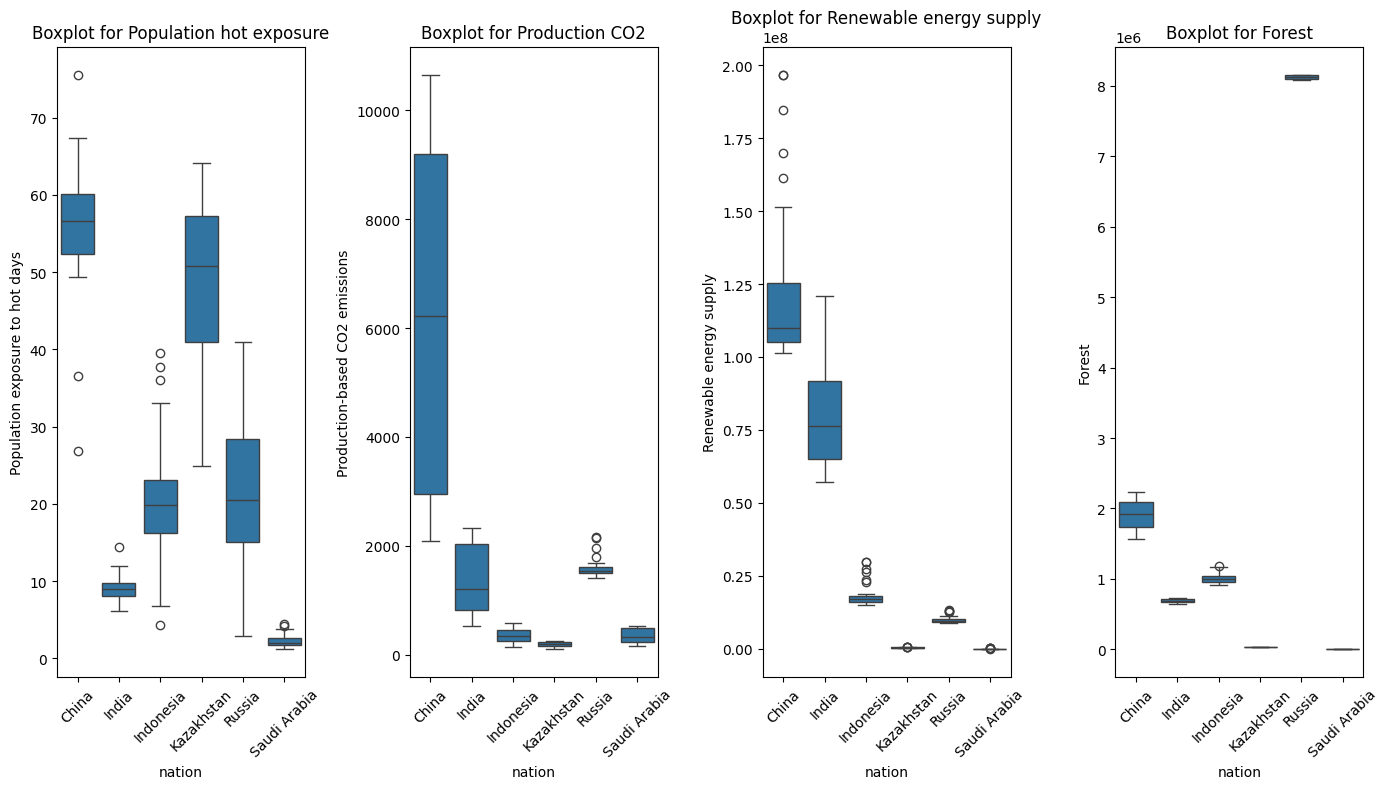

In [ ]:
# Menentukan kolom yang ingin divisualisasikan
columns_to_check = ['Population exposure to hot days', 'Production-based CO2 emissions', 'Renewable energy supply', 'Forest']
display_names = ['Population hot exposure', 'Production CO2', 'Renewable energy supply', 'Forest']

# Membuat figure untuk visualisasi
plt.figure(figsize=(14, 8))

# Loop untuk setiap kolom yang ingin divisualisasikan
for i, (column, display_name) in enumerate(zip(columns_to_check, display_names), 1):
    plt.subplot(1, len(columns_to_check), i)  # Membuat subplot untuk setiap kolom
    sns.boxplot(x='nation', y=column, data=df)  # Boxplot berdasarkan 'nation'
    plt.title(f'Boxplot for {display_name}')  # Judul plot
    plt.xticks(rotation=45)  # Memutar label x agar tidak tumpang tindih

plt.tight_layout()  # Menyesuaikan layout untuk menghindari tumpang tindih
plt.show()


###4. Imbalance Data
Memeriksa imbalance data dan menyelesaikan masalah imbalance data

In [ ]:
# Memeriksa frekuensi setiap kategori (berdasarkan kolom 'nation')
category_counts = df['nation'].value_counts()
print("Frekuensi per kategori:")
print(category_counts)

# Menghitung selisih antara kategori
imbalance = category_counts.max() - category_counts.min()
print(f"\nImbalance antara kategori: {imbalance}")

# Jika ada ketidakseimbangan, lakukan oversampling atau undersampling
if imbalance > 0:
    # Oversampling kategori minoritas (misalnya Indonesia)
    minority_class = df[df['nation'] == 'Indonesia']
    majority_class = df[df['nation'] == 'Japan']

    # Hitung berapa banyak data yang perlu ditambahkan ke minoritas
    n_needed = category_counts['Japan'] - category_counts['Indonesia']

    # Tambahkan data dengan cara meng-copy data minoritas
    additional_data = minority_class.sample(n=n_needed, replace=True, random_state=1)
    df_balanced = pd.concat([majority_class, minority_class, additional_data])

    # Cek keseimbangan setelah perbaikan
    balanced_counts = df_balanced['nation'].value_counts()
    print("\nFrekuensi setelah perbaikan:")
    balanced_counts

Frekuensi per kategori:
nation
China           34
India           34
Indonesia       34
Kazakhstan      34
Russia          34
Saudi Arabia    34
Name: count, dtype: int64

Imbalance antara kategori: 0


Output di atas menunjukkan **frekuensi kemunculan** setiap kategori dalam kolom nation dari dataframe. Setiap negara (China, India, Indonesia, Kazakhstan, Russia, dan Saudi Arabia) muncul sebanyak **34 kali**, sehingga jumlah data untuk masing-masing kategori adalah seimbang.

Lalu **Imbalance antara kategori = 0**, yang berarti **tidak ada ketidakseimbangan** antar kategori dalam kolom nation. Semua kategori memiliki jumlah data yang sama.

###5. Feature Encoding

In [ ]:
# Salin dataset agar tidak mengubah dataset asli
df_encoded = df.copy()

# Identifikasi fitur kategorikal
categorical_features = df_encoded.select_dtypes(include=['object']).columns

# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

# Mengonversi setiap fitur kategorikal menjadi numerik
for col in categorical_features:
    # Jika fitur memiliki banyak kategori unik, gunakan One-Hot Encoding
    if df_encoded[col].nunique() > 5:  # Tentukan threshold sesuai kebutuhan
        df_encoded = pd.get_dummies(df_encoded, columns=[col], drop_first=True)
    # Jika fitur memiliki kategori sedikit atau berurutan, gunakan Label Encoding
    else:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
df_encoded

period  Population exposure to hot days  Production-based CO2 emissions  \
0      1990                        55.451665                         2088.85   
6      1991                        59.489104                         2200.89   
12     1992                        52.056536                         2295.78   
18     1993                        56.922244                         2500.73   
24     1994                        51.537795                         2599.50   
..      ...                              ...                             ...   
179    2019                         1.483676                          498.31   
185    2020                         1.715791                          483.15   
191    2021                         1.321411                          497.25   
197    2022                         3.289547                          497.25   
203    2023                         1.273601                          497.25   

     Renewable energy supply     Forest  population  nation_India  \
0               1.056871e+08  1571406.0  1153582718         False   
6               1.066027e+08  1591266.0  1170788527         False   
12              1.075093e+08  1611126.0  1184574240         False   
18              1.088953e+08  1630986.0  1197308569         False   
24              1.098287e+08  1650846.0  1209003100         False   
..                       ...        ...         ...           ...   
179             1.768681e+04     9770.0    30472810         False   
185             4.335027e+04     9770.0    30991205         False   
191             4.693062e+04     9770.0    31328374         False   
197             1.126673e+05     9770.0    32175352         False   
203             1.126673e+05     9770.0    33264288         False   

     nation_Indonesia  nation_Kazakhstan  nation_Russia  nation_Saudi Arabia  
0               False              False          False                False  
6               False              False          False                False  
12              False              False          False                False  
18              False              False          False                False  
24              False              False          False                False  
..                ...                ...            ...                  ...  
179             False              False          False                 True  
185             False              False          False                 True  
191             False              False          False                 True  
197             False              False          False                 True  
203             False              False          False                 True  

[204 rows x 11 columns]

Proses encoding yang dilakukan pada dataframe ini menggunakan **One-Hot Encoding** yang bertujuan untuk mengubah kolom kategori menjadi format yang dapat digunakan dalam model machine learning.

Kolom `nation` yang berisi nama negara diproses karena memiliki beberapa kategori unik. Setiap negara **(India, Indonesia, Kazakhstan, Russia, dan Saudi Arabia)** kini direpresentasikan sebagai kolom biner **(True atau False)**.

Kolom `nation` telah dipecah menjadi beberapa kolom biner, seperti `nation_India`, `nation_Indonesia`, `nation_Kazakhstan`, `nation_Russia`, dan `nation_Saudi Arabia` di mana nilai True menunjukkan bahwa baris tersebut milik negara tersebut.

# C2. Statistics for Data Science & Exploratory Data Analysis (EDA)

### 1. Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

In [ ]:
# Memberikan ringkasan informasi tentang struktur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   period                           204 non-null    int64  
 1   nation                           204 non-null    object 
 2   Population exposure to hot days  204 non-null    float64
 3   Production-based CO2 emissions   204 non-null    float64
 4   Renewable energy supply          204 non-null    float64
 5   Forest                           204 non-null    float64
 6   population                       204 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.8+ KB


Berdasarkan output di atas, berikut insight singkatnya:
- Dataset terdiri dari 204 entri dengan 7 kolom, dan tidak ada missing values (semua kolom memiliki 204 non-null values).
- Terdapat 4 kolom dengan tipe data float64 (numerik desimal): Population exposure to hot days, Production-based CO2 emissions, Renewable energy supply, dan Forest.
- Kolom period dan population menggunakan tipe data int64 (numerik), dan nation menggunakan object (kategori/teks).
- Ukuran dataset relatif kecil dengan penggunaan memori sekitar 11.3 KB.

### 2. Kondisi dan perbedaan penggunaan mean, median, dan modus

In [ ]:
# Memberikan ringkasan statistik deskriptif dari dataset
df.describe()

period  Population exposure to hot days  \
count   204.000000                       204.000000   
mean   2006.500000                        26.094662   
std       9.834843                        21.147734   
min    1990.000000                         1.273601   
25%    1998.000000                         8.276023   
50%    2006.500000                        19.911556   
75%    2015.000000                        49.096119   
max    2023.000000                        75.498890   

       Production-based CO2 emissions  Renewable energy supply        Forest  \
count                      204.000000             2.040000e+02  2.040000e+02   
mean                      1669.108627             3.856043e+07  1.963767e+06   
std                       2455.241581             4.854690e+07  2.838040e+06   
min                        109.250000             1.934650e+03  9.770000e+03   
25%                        238.522500             3.694115e+05  3.159984e+04   
50%                        563.880000             1.415203e+07  8.180747e+05   
75%                       1677.640000             7.568385e+07  1.917567e+06   
max                      10648.540000             1.966229e+08  8.153116e+06   

         population  
count  2.040000e+02  
mean   4.847566e+08  
std    5.509185e+08  
min    1.064070e+07  
25%    2.214102e+07  
50%    1.664748e+08  
75%    1.158704e+09  
max    1.438070e+09

Berdasarkan output di atas, berikut insight singkatnya :
*  Exposure to Hot Days: Rata-rata paparan populasi mencapai 26 juta orang, dengan nilai tertinggi 75 juta orang. Ada peningkatan paparan dalam beberapa tahun terakhir.

*  CO2 Emissions: Emisi rata-rata adalah 1.669 juta ton, dengan outlier signifikan hingga 10.648 juta ton.


*  Renewable Energy: Rata-rata pasokan energi terbarukan 12%, dengan maksimum 40%, menunjukkan perbedaan besar antar negara.
*  Forest Area: Rata-rata luas hutan 1,96 juta km², sangat bervariasi, menunjukkan ketimpangan dalam konservasi.


*  Population: Populasi rata-rata adalah 484 juta, namun ada outlier dengan populasi hingga 1,44 miliar.

### 3. Mendeskripsikan Stastitical Five Summaries

In [ ]:
# Menggunakan .describe() untuk menghasilkan ringkasan statistik
five_number_summary = df.describe().loc[['min', '25%', '50%', '75%', 'max']]
five_number_summary

period  Population exposure to hot days  Production-based CO2 emissions  \
min  1990.0                         1.273601                        109.2500   
25%  1998.0                         8.276023                        238.5225   
50%  2006.5                        19.911556                        563.8800   
75%  2015.0                        49.096119                       1677.6400   
max  2023.0                        75.498890                      10648.5400   

     Renewable energy supply      Forest    population  
min             1.934650e+03     9770.00  1.064070e+07  
25%             3.694115e+05    31599.84  2.214102e+07  
50%             1.415203e+07   818074.65  1.664748e+08  
75%             7.568385e+07  1917567.25  1.158704e+09  
max             1.966229e+08  8153116.00  1.438070e+09

Berdasarkan output di atas, berikut insight singkatnya:


*   Exposure to Hot Days: Naik dari 1,27 juta hingga 75,5 juta.
*   CO2 Emissions: Median 563,88 juta ton, ada outlier hingga 10.648 juta ton.
*   Renewable Energy: 50% negara di bawah 5,4%, maksimum 40,7%.
*   Forest Area: Luas bervariasi, median 818 ribu km², maksimum 8,15 juta km².
* Population: Median 166 juta, rentang 10,6 juta hingga 1,44 miliar.



### 4. Mendeskripsikan Distribusi Data

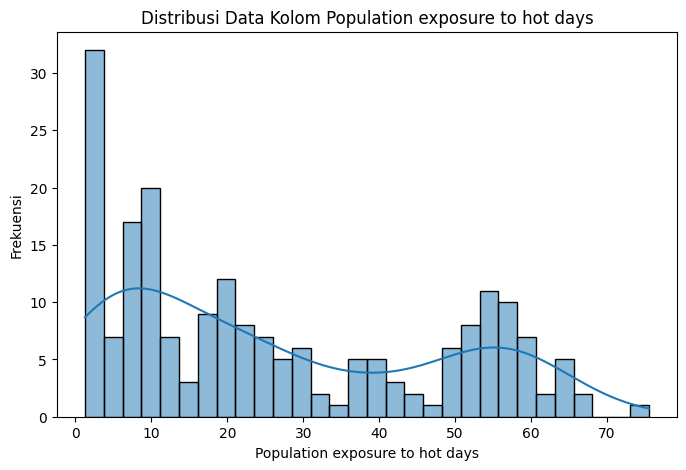

In [ ]:
# Histogram untuk distribusi nilai dari kolom 'Production-based CO2 emissions'
plt.figure(figsize=(8, 5))
sns.histplot(df['Population exposure to hot days'], bins=30, kde=True)  # kde=True menambahkan garis densitas
plt.title('Distribusi Data Kolom Population exposure to hot days')
plt.xlabel('Population exposure to hot days')
plt.ylabel('Frekuensi')
plt.show()

Grafik Distribusi Data Kolom Population exposure to hot days menjelaskan bahwa:
*   Mayoritas negara memiliki paparan rendah (di bawah 10 juta), terlihat dari puncak tertinggi di awal grafik.

* Distribusi memiliki dua puncak (bimodal) sekitar 10 juta dan 50 juta, mengindikasikan dua kelompok negara.

* Data condong ke kiri (skew positif), menunjukkan ada beberapa negara dengan paparan sangat tinggi, namun jarang terjadi.

Kesimpulan:

Sebagian besar negara belum mengalami paparan suhu panas ekstrem yang signifikan, namun terdapat beberapa negara yang sangat terdampak, menunjukkan potensi ketimpangan dalam dampak perubahan iklim



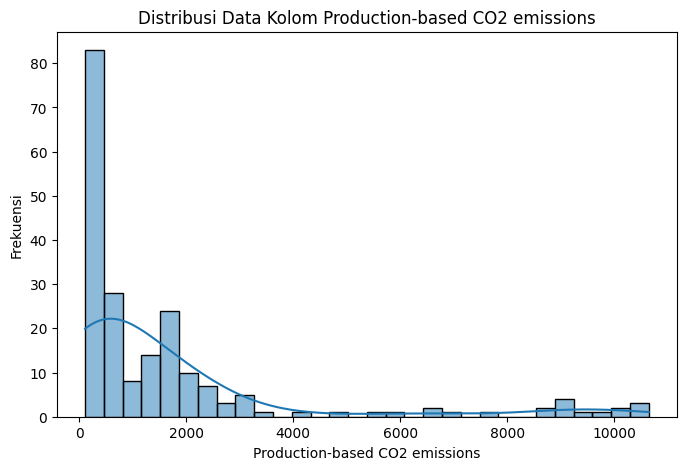

In [ ]:
# Histogram untuk distribusi nilai dari kolom 'Production-based CO2 emissions'
plt.figure(figsize=(8, 5))
sns.histplot(df['Production-based CO2 emissions'], bins=30, kde=True)  # kde=True menambahkan garis densitas
plt.title('Distribusi Data Kolom Production-based CO2 emissions')
plt.xlabel('Production-based CO2 emissions')
plt.ylabel('Frekuensi')
plt.show()

Grafik Distribusi Data Kolom Production-based CO2 emissions menjelaskan bahwa:
* Mayoritas nilai emisi CO₂ berbasis produksi berada di kisaran rendah (di bawah 2000).

* Distribusi data sangat miring ke kanan (right-skewed), menunjukkan ketidakseimbangan distribusi emisi.

* Hanya sedikit negara atau wilayah yang memiliki emisi produksi CO₂ yang sangat tinggi.

* Ketimpangan ini menunjukkan bahwa beberapa negara menjadi kontributor utama dalam emisi CO₂ berbasis produksi.

Kesimpulan:

Emisi CO₂ dari produksi sangat tidak merata di berbagai negara. Kebanyakan negara memiliki emisi yang rendah, sementara hanya sedikit negara yang menghasilkan emisi CO₂ dalam jumlah besar. Ini menunjukkan bahwa sebagian besar emisi CO₂ berasal dari segelintir negara yang menjadi penyumbang utama dalam skala global.

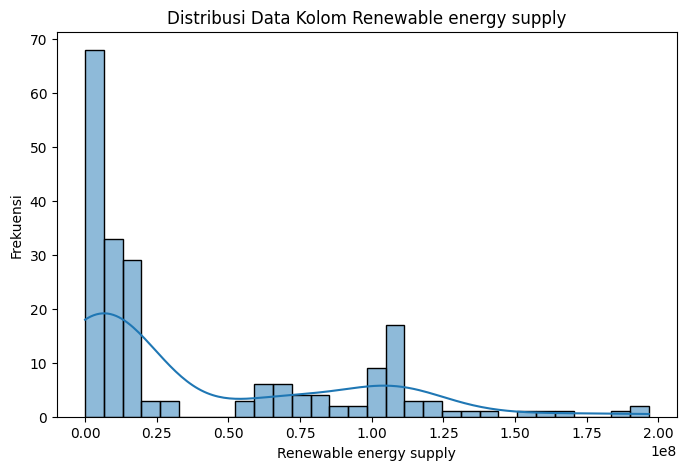

In [ ]:
# Histogram untuk distribusi nilai dari kolom 'Production-based CO2 emissions'
plt.figure(figsize=(8, 5))
sns.histplot(df['Renewable energy supply'], bins=30, kde=True)  # kde=True menambahkan garis densitas
plt.title('Distribusi Data Kolom Renewable energy supply')
plt.xlabel('Renewable energy supply')
plt.ylabel('Frekuensi')
plt.show()

Grafik Distribusi Data Kolom Renewable energy supply menjelaskan bahwa:
* Mayoritas nilai suplai energi terbarukan berada di kisaran rendah (0-10).
* Distribusi data miring ke kanan, menunjukkan bahwa sebagian besar negara memiliki suplai energi terbarukan yang rendah.
* Hanya sedikit negara yang memiliki suplai energi terbarukan di atas 20, dengan jumlah yang terus menurun pada nilai yang lebih tinggi.
* Pola ini menunjukkan bahwa pemanfaatan energi terbarukan masih terbatas di banyak negara.


Kesimpulan:

Penggunaan energi terbarukan masih rendah di banyak negara. Sebagian besar negara hanya memiliki sedikit suplai energi terbarukan, dan hanya sedikit yang memanfaatkan energi terbarukan dalam jumlah besar. Ini menunjukkan bahwa adopsi energi terbarukan belum merata, dengan sebagian besar negara masih bergantung pada sumber energi non-terbarukan.

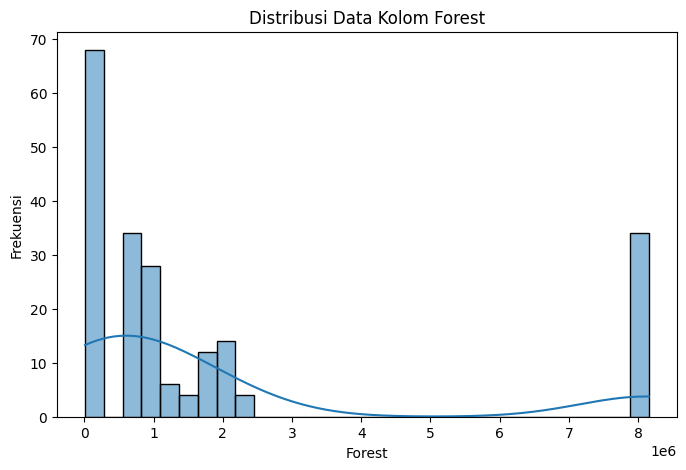

In [ ]:
# Histogram untuk distribusi nilai dari kolom 'Renewable energy supply'
plt.figure(figsize=(8, 5))
sns.histplot(df['Forest'], bins=30, kde=True)  # kde=True menambahkan garis densitas
plt.title('Distribusi Data Kolom Forest')
plt.xlabel('Forest')
plt.ylabel('Frekuensi')
plt.show()

Grafik Distribusi Data kolom Forest menjelaskan bahwa:
* Mayoritas wilayah memiliki tutupan hutan yang rendah, di kisaran awal.
* Distribusi data miring ke kanan, menunjukkan banyak wilayah dengan tutupan hutan yang kecil.
* Hanya sedikit wilayah yang memiliki tutupan hutan yang sangat besar, terlihat sebagai outlier.

Kesimpulan:

Sebagian besar wilayah hanya memiliki sedikit tutupan hutan, dengan hanya sedikit yang memiliki area hutan sangat luas. Hal ini menunjukkan distribusi tutupan hutan yang tidak merata di berbagai wilayah.

### 5. Korelasi Feature

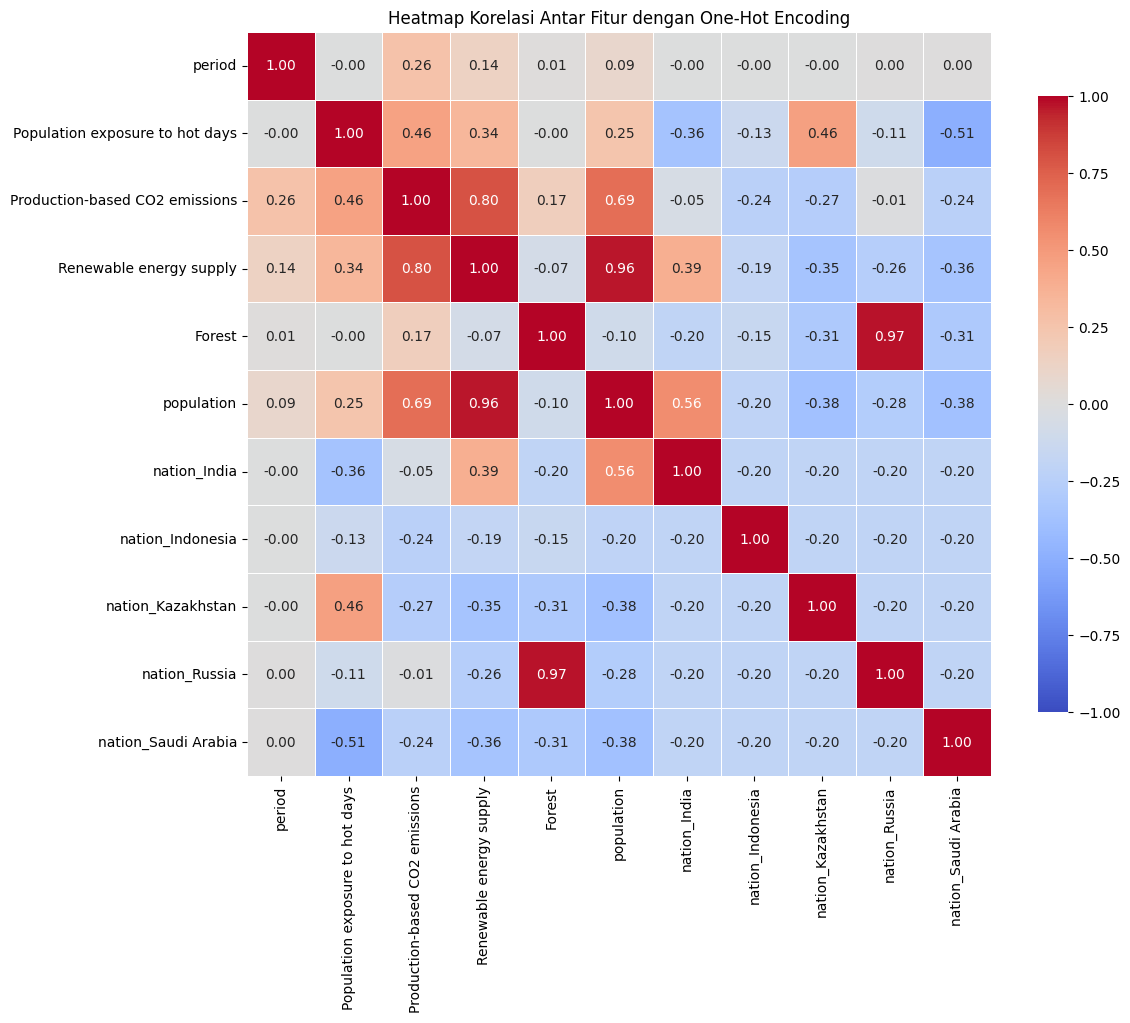

In [ ]:
# Cek jenis encoding yang ingin digunakan
encoding_method = 'onehot'  # Ganti dengan 'label' untuk Label Encoding, 'onehot' untuk One-Hot Encoding

# Fungsi untuk melakukan encoding dan menghitung korelasi
def encode_and_plot(df, encoding_method):
    if encoding_method == 'onehot':
        # One-Hot Encoding menggunakan pd.get_dummies()
        df_encoded = pd.get_dummies(df, drop_first=True)
        title = "Heatmap Korelasi Antar Fitur dengan One-Hot Encoding"
    elif encoding_method == 'label':
        # Label Encoding untuk kolom kategorikal
        label_encoder = LabelEncoder()
        for col in df.select_dtypes(include=['object']).columns:
            df[col] = label_encoder.fit_transform(df[col])
        df_encoded = df  # Tidak ada kolom baru, encoding langsung di kolom
        title = "Heatmap Korelasi Antar Fitur dengan Label Encoding"
    else:
        raise ValueError("Encoding method harus 'onehot' atau 'label'")

    # Menghitung matriks korelasi antar fitur numerik
    correlation_matrix = df_encoded.corr()

    # Membuat heatmap untuk visualisasi korelasi antar fitur
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f",
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title(title)
    plt.show()

# Panggil fungsi dengan encoding yang diinginkan
encode_and_plot(df, encoding_method='onehot')  # Ganti dengan 'label' jika ingin menggunakan Label Encoding

In [ ]:
# Ganti nama kolom menjadi lebih sederhana
df3 = df.rename(columns={
    'Population exposure to hot days': 'Heat exposure',
    'Production-based CO2 emissions': 'CO2 Emissions',
    'Renewable energy supply': 'Renewable Energy',
    'population': 'Population'
})

# Tampilkan DataFrame untuk memastikan perubahan
df3.head()


period nation  Heat exposure  CO2 Emissions  Renewable Energy     Forest  \
0     1990  China      55.451665        2088.85      1.056871e+08  1571406.0   
6     1991  China      59.489104        2200.89      1.066027e+08  1591266.0   
12    1992  China      52.056536        2295.78      1.075093e+08  1611126.0   
18    1993  China      56.922244        2500.73      1.088953e+08  1630986.0   
24    1994  China      51.537795        2599.50      1.098287e+08  1650846.0   

    Population  
0   1153582718  
6   1170788527  
12  1184574240  
18  1197308569  
24  1209003100

In [ ]:
# Misalkan df3 adalah DataFrame yang berisi data
# Pilih hanya kolom-kolom yang diinginkan
selected_columns = ['Heat exposure','CO2 Emissions','Renewable Energy','Forest','Population']

# Hitung korelasi antar kolom yang dipilih
correlation_matrix = df3[selected_columns].corr()

# Tampilkan matriks korelasi
correlation_matrix


Heat exposure  CO2 Emissions  Renewable Energy    Forest  \
Heat exposure          1.000000       0.455559          0.338410 -0.003967   
CO2 Emissions          0.455559       1.000000          0.800522  0.169558   
Renewable Energy       0.338410       0.800522          1.000000 -0.074740   
Forest                -0.003967       0.169558         -0.074740  1.000000   
Population             0.247135       0.688112          0.961587 -0.100248   

                  Population  
Heat exposure       0.247135  
CO2 Emissions       0.688112  
Renewable Energy    0.961587  
Forest             -0.100248  
Population          1.000000

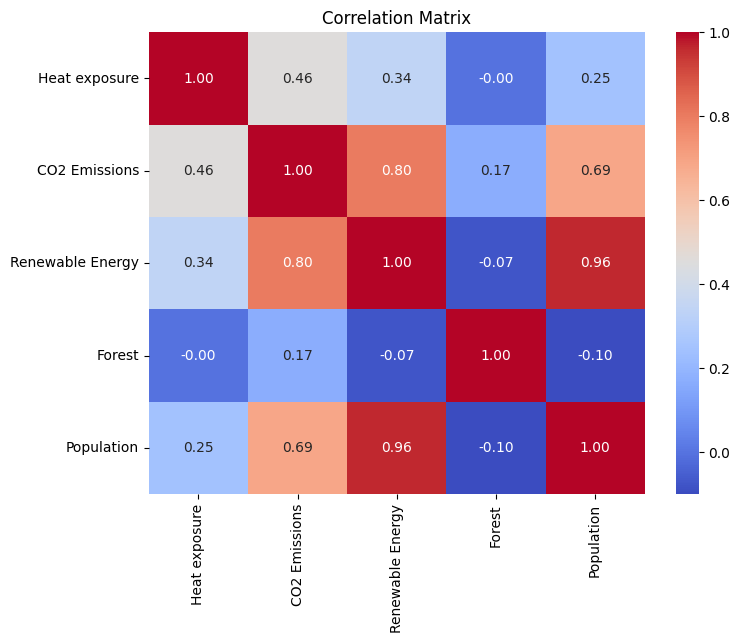

In [ ]:
# Buat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()


# C3. Feature Engineering

### 1. Membuat Feature Exposure Rate

In [ ]:
# Membuat fungsi bernama 'kategori_paparan' yang mengkategorikan persentase paparan panas
# Jika persentase di bawah 25%, dikategorikan sebagai 'Low'
# Jika persentase antara 25% hingga 75%, dikategorikan sebagai 'Moderate'
# Jika persentase lebih dari 75%, dikategorikan sebagai 'High'
def kategori_paparan(percentage):
    if percentage < 25:
        return 'Low'
    elif 25 <= percentage <= 75:
        return 'Moderate'
    else:
        return 'High'

# Menerapkan fungsi 'kategori_paparan' ke kolom 'Population exposure to hot days'
# dan membuat kolom baru 'exposure_rate' yang berisi kategori ('Low', 'Moderate', atau 'High')
# berdasarkan persentase paparan panas
df['exposure_rate'] = df['Population exposure to hot days'].apply(kategori_paparan)

In [ ]:
df.head()

period nation  Population exposure to hot days  \
0     1990  China                        55.451665   
6     1991  China                        59.489104   
12    1992  China                        52.056536   
18    1993  China                        56.922244   
24    1994  China                        51.537795   

    Production-based CO2 emissions  Renewable energy supply     Forest  \
0                          2088.85             1.056871e+08  1571406.0   
6                          2200.89             1.066027e+08  1591266.0   
12                         2295.78             1.075093e+08  1611126.0   
18                         2500.73             1.088953e+08  1630986.0   
24                         2599.50             1.098287e+08  1650846.0   

    population exposure_rate  
0   1153582718      Moderate  
6   1170788527      Moderate  
12  1184574240      Moderate  
18  1197308569      Moderate  
24  1209003100      Moderate

### 2. Membuat Feature Population Exposure

Untuk mengetahui secara pasti jumlah populasi yang terpapar

In [ ]:
# Menghitung jumlah populasi yang terekspos pada hari panas, dibulatkan ke integer
df['pop_exposure'] = ((df['Population exposure to hot days'] / 100) * df['population']).round().astype(int)

In [ ]:
df

period        nation  Population exposure to hot days  \
0      1990         China                        55.451665   
6      1991         China                        59.489104   
12     1992         China                        52.056536   
18     1993         China                        56.922244   
24     1994         China                        51.537795   
..      ...           ...                              ...   
179    2019  Saudi Arabia                         1.483676   
185    2020  Saudi Arabia                         1.715791   
191    2021  Saudi Arabia                         1.321411   
197    2022  Saudi Arabia                         3.289547   
203    2023  Saudi Arabia                         1.273601   

     Production-based CO2 emissions  Renewable energy supply     Forest  \
0                           2088.85             1.056871e+08  1571406.0   
6                           2200.89             1.066027e+08  1591266.0   
12                          2295.78             1.075093e+08  1611126.0   
18                          2500.73             1.088953e+08  1630986.0   
24                          2599.50             1.098287e+08  1650846.0   
..                              ...                      ...        ...   
179                          498.31             1.768681e+04     9770.0   
185                          483.15             4.335027e+04     9770.0   
191                          497.25             4.693062e+04     9770.0   
197                          497.25             1.126673e+05     9770.0   
203                          497.25             1.126673e+05     9770.0   

     population exposure_rate  pop_exposure  
0    1153582718      Moderate     639680824  
6    1170788527      Moderate     696491602  
12   1184574240      Moderate     616648311  
18   1197308569      Moderate     681534901  
24   1209003100      Moderate     623093544  
..          ...           ...           ...  
179    30472810           Low        452118  
185    30991205           Low        531744  
191    31328374           Low        413977  
197    32175352           Low       1058423  
203    33264288           Low        423654  

[204 rows x 9 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi fitur numerik dengan MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi variabel yang perlu dihitung, pastikan kolomnya numerik
df['Normalized Exposure'] = scaler.fit_transform(df[['Population exposure to hot days']])
df['Normalized CO2 Emissions'] = scaler.fit_transform(df[['Production-based CO2 emissions']])
df['Normalized Renewable Energy'] = scaler.fit_transform(df[['Renewable energy supply']])

# Tentukan bobot untuk masing-masing faktor (bobot bisa disesuaikan berdasarkan pemahaman)
weights = {
    'Exposure': 0.4,  # bobot lebih besar untuk paparan panas
    'CO2': 0.4,       # bobot tinggi untuk emisi CO2
    'Renewable': 0.2  # bobot lebih kecil untuk energi terbarukan
}

# Hitung indeks lingkungan berdasarkan bobot dan normalisasi nilai
df['Environmental Health Index'] = (df['Normalized Exposure'] * weights['Exposure'] +
                                    df['Normalized CO2 Emissions'] * weights['CO2'] +
                                    df['Normalized Renewable Energy'] * weights['Renewable'])

# Kategorikan indeks ke dalam kategori kesehatan lingkungan
def categorize_index(value):
    if value < 0.33:
        return "Sangat Baik"
    elif value < 0.66:
        return "Baik"
    elif value < 0.85:
        return "Buruk"
    else:
        return "Sangat Buruk"

# Menerapkan fungsi kategorisasi ke kolom 'Environmental Health Index'
df['Health Index Category'] = df['Environmental Health Index'].apply(categorize_index)

# Menampilkan hasil
df


period        nation  Population exposure to hot days  \
0      1990         China                        55.451665   
6      1991         China                        59.489104   
12     1992         China                        52.056536   
18     1993         China                        56.922244   
24     1994         China                        51.537795   
..      ...           ...                              ...   
179    2019  Saudi Arabia                         1.483676   
185    2020  Saudi Arabia                         1.715791   
191    2021  Saudi Arabia                         1.321411   
197    2022  Saudi Arabia                         3.289547   
203    2023  Saudi Arabia                         1.273601   

     Production-based CO2 emissions  Renewable energy supply     Forest  \
0                           2088.85             1.056871e+08  1571406.0   
6                           2200.89             1.066027e+08  1591266.0   
12                          2295.78             1.075093e+08  1611126.0   
18                          2500.73             1.088953e+08  1630986.0   
24                          2599.50             1.098287e+08  1650846.0   
..                              ...                      ...        ...   
179                          498.31             1.768681e+04     9770.0   
185                          483.15             4.335027e+04     9770.0   
191                          497.25             4.693062e+04     9770.0   
197                          497.25             1.126673e+05     9770.0   
203                          497.25             1.126673e+05     9770.0   

     population exposure_rate  pop_exposure  Normalized Exposure  \
0    1153582718      Moderate     639680824             0.729914   
6    1170788527      Moderate     696491602             0.784308   
12   1184574240      Moderate     616648311             0.684173   
18   1197308569      Moderate     681534901             0.749726   
24   1209003100      Moderate     623093544             0.677184   
..          ...           ...           ...                  ...   
179    30472810           Low        452118             0.002830   
185    30991205           Low        531744             0.005957   
191    31328374           Low        413977             0.000644   
197    32175352           Low       1058423             0.027160   
203    33264288           Low        423654             0.000000   

     Normalized CO2 Emissions  Normalized Renewable Energy  \
0                    0.187830                     0.537507   
6                    0.198461                     0.542164   
12                   0.207465                     0.546775   
18                   0.226911                     0.553824   
24                   0.236283                     0.558571   
..                        ...                          ...   
179                  0.036915                     0.000080   
185                  0.035477                     0.000211   
191                  0.036815                     0.000229   
197                  0.036815                     0.000563   
203                  0.036815                     0.000563   

     Environmental Health Index Health Index Category  
0                      0.474599                  Baik  
6                      0.501540                  Baik  
12                     0.466010                  Baik  
18                     0.501420                  Baik  
24                     0.477101                  Baik  
..                          ...                   ...  
179                    0.015914           Sangat Baik  
185                    0.016616           Sangat Baik  
191                    0.015029           Sangat Baik  
197                    0.025702           Sangat Baik  
203                    0.014838           Sangat Baik  

[204 rows x 14 columns]

In [ ]:
df.to_csv('Finpro.csv', index=False)
df.to_excel('Finpro.xlsx', index=False)

In [ ]:
# Tentukan ambang batas untuk Emisi CO2 dan Energi Terbarukan (nilai ini bisa disesuaikan)
co2_threshold_low = 500      # Ambang batas rendah untuk emisi CO2 (dalam juta ton)
co2_threshold_high = 1000   # Ambang batas tinggi untuk emisi CO2 (dalam juta ton)

# Tentukan ambang batas untuk Energi Terbarukan (berdasarkan standar global)
renewable_threshold_low = 10   # Ambang batas rendah untuk energi terbarukan (%)
renewable_threshold_mid = 30   # Ambang batas sedang untuk energi terbarukan (%)
renewable_threshold_high = 50  # Ambang batas tinggi untuk energi terbarukan (%)

# Kategorikan negara berdasarkan energi terbarukan
def categorize_wellbeing(row):
    # Tentukan kategori berdasarkan energi terbarukan
    if row['Renewable energy supply'] < renewable_threshold_low:
        return 'Energi terbarukan rendah'  # Energi terbarukan rendah (< 10%)
    elif renewable_threshold_low <= row['Renewable energy supply'] < renewable_threshold_mid:
        return 'Energi terbarukan sedang'  # Energi terbarukan sedang (10% - 30%)
    elif renewable_threshold_mid <= row['Renewable energy supply'] < renewable_threshold_high:
        return 'Energi terbarukan tinggi'  # Energi terbarukan tinggi (30% - 50%)
    else:
        return 'Energi terbarukan sangat tinggi'  # Energi terbarukan sangat tinggi (> 50%)

# Terapkan kategori energi terbarukan ke setiap negara
df['Renewable Energy Category'] = df.apply(categorize_wellbeing, axis=1)

# Menampilkan hasil
df



# Kategorikan negara berdasarkan emisi CO2 dan penggunaan energi terbarukan
def categorize_wellbeing(row):
    # Tentukan kategori berdasarkan CO2 dan energi terbarukan
    if row['Production-based CO2 emissions'] > co2_threshold_high and row['Renewable energy supply'] < renewable_threshold_low:
        return 'Emisi CO2 tinggi, energi terbarukan rendah'  # Emisi CO2 tinggi, energi terbarukan rendah
    elif row['Production-based CO2 emissions'] <= co2_threshold_high and row['Production-based CO2 emissions'] > co2_threshold_low and row['Renewable energy supply'] <= renewable_threshold_mid and row['Renewable energy supply'] > renewable_threshold_low:
        return 'Emisi CO2 sedang, energi terbarukan sedang'  # Emisi CO2 sedang, energi terbarukan sedang
    elif row['Production-based CO2 emissions'] <= co2_threshold_low and row['Renewable energy supply'] >= renewable_threshold_mid:
        return 'Emisi CO2 rendah, energi terbarukan tinggi'  # Emisi CO2 rendah, energi terbarukan tinggi
    else:
        return 'Emisi CO2 dan energi terbarukan rendah'  # Kategori lainnya jika ada data yang tidak memenuhi

# Terapkan kategori kesejahteraan ke setiap negara
df['Wellbeing Category'] = df.apply(categorize_wellbeing, axis=1)

# Menampilkan hasil
df


period        nation  Population exposure to hot days  \
0      1990         China                        55.451665   
6      1991         China                        59.489104   
12     1992         China                        52.056536   
18     1993         China                        56.922244   
24     1994         China                        51.537795   
..      ...           ...                              ...   
179    2019  Saudi Arabia                         1.483676   
185    2020  Saudi Arabia                         1.715791   
191    2021  Saudi Arabia                         1.321411   
197    2022  Saudi Arabia                         3.289547   
203    2023  Saudi Arabia                         1.273601   

     Production-based CO2 emissions  Renewable energy supply     Forest  \
0                           2088.85             1.056871e+08  1571406.0   
6                           2200.89             1.066027e+08  1591266.0   
12                          2295.78             1.075093e+08  1611126.0   
18                          2500.73             1.088953e+08  1630986.0   
24                          2599.50             1.098287e+08  1650846.0   
..                              ...                      ...        ...   
179                          498.31             1.768681e+04     9770.0   
185                          483.15             4.335027e+04     9770.0   
191                          497.25             4.693062e+04     9770.0   
197                          497.25             1.126673e+05     9770.0   
203                          497.25             1.126673e+05     9770.0   

     population exposure_rate  pop_exposure  Normalized Exposure  \
0    1153582718      Moderate     639680824             0.729914   
6    1170788527      Moderate     696491602             0.784308   
12   1184574240      Moderate     616648311             0.684173   
18   1197308569      Moderate     681534901             0.749726   
24   1209003100      Moderate     623093544             0.677184   
..          ...           ...           ...                  ...   
179    30472810           Low        452118             0.002830   
185    30991205           Low        531744             0.005957   
191    31328374           Low        413977             0.000644   
197    32175352           Low       1058423             0.027160   
203    33264288           Low        423654             0.000000   

     Normalized CO2 Emissions  Normalized Renewable Energy  \
0                    0.187830                     0.537507   
6                    0.198461                     0.542164   
12                   0.207465                     0.546775   
18                   0.226911                     0.553824   
24                   0.236283                     0.558571   
..                        ...                          ...   
179                  0.036915                     0.000080   
185                  0.035477                     0.000211   
191                  0.036815                     0.000229   
197                  0.036815                     0.000563   
203                  0.036815                     0.000563   

     Environmental Health Index Health Index Category  \
0                      0.474599                  Baik   
6                      0.501540                  Baik   
12                     0.466010                  Baik   
18                     0.501420                  Baik   
24                     0.477101                  Baik   
..                          ...                   ...   
179                    0.015914           Sangat Baik   
185                    0.016616           Sangat Baik   
191                    0.015029           Sangat Baik   
197                    0.025702           Sangat Baik   
203                    0.014838           Sangat Baik   

           Renewable Energy Category  \
0    Energi terbarukan sangat tinggi   
6    Energi terbarukan sangat ti

# Visualisasi Data

### Tren Paparan Panas Tiap Negara

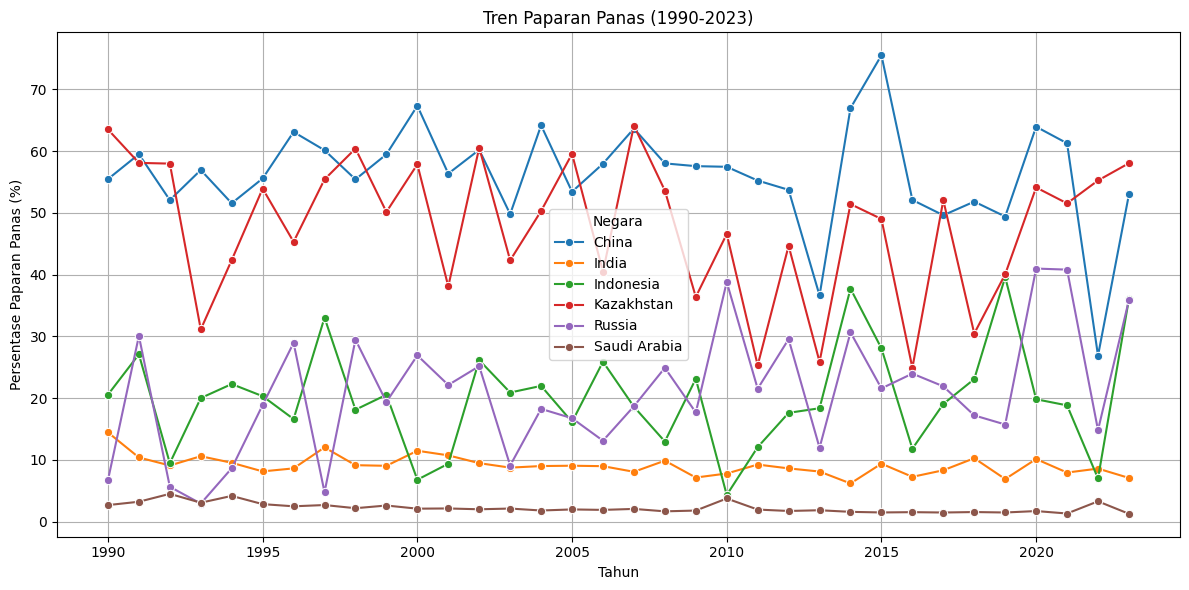

In [ ]:
# Misalkan df_pivot adalah DataFrame Anda yang sudah berisi data untuk analisis
# Mengatur ukuran tampilan grafik menjadi 12x6 inci
plt.figure(figsize=(12, 6))

# Membuat grafik garis (lineplot) untuk memvisualisasikan tren paparan panas dari tahun ke tahun
# sumbu x adalah 'period' (misalnya tahun), sumbu y adalah 'Population exposure to hot days'
# 'hue' digunakan untuk membedakan negara, dan 'marker' ditambahkan pada titik data
sns.lineplot(data=df, x='period', y='Population exposure to hot days', hue='nation', marker='o')

# Menambahkan judul grafik: 'Tren Paparan Panas'
plt.title('Tren Paparan Panas (1990-2023)')

# Memberikan label untuk sumbu x (Tahun) dan sumbu y (Persentase Paparan Panas)
plt.xlabel('Tahun')
plt.ylabel('Persentase Paparan Panas (%)')

# Menambahkan grid pada grafik agar lebih mudah membaca nilai-nilai pada sumbu x dan y
plt.grid(True)

# Menampilkan legenda yang menunjukkan negara mana yang direpresentasikan oleh setiap garis,
# dengan judul 'Negara' untuk memperjelas
plt.legend(title='Negara')

# Mengatur tata letak agar semua elemen pada grafik terlihat rapi dan tidak saling bertumpukan
plt.tight_layout()

# Menampilkan grafik
plt.show()

### Rata-Rata Paparan Panas Setiap Negara

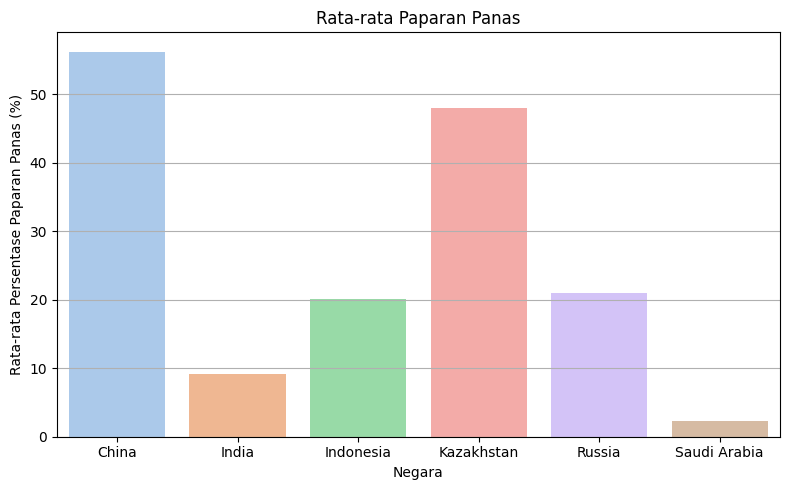

In [ ]:
# Mengatur ukuran tampilan grafik menjadi 8x5 inci
plt.figure(figsize=(8, 5))

# Menghitung rata-rata 'Population exposure to hot days' untuk setiap negara
# dengan mengelompokkan data berdasarkan kolom 'nation',
# lalu mengatur ulang indeks hasilnya agar rapi
average_exposure = df.groupby('nation')['Population exposure to hot days'].mean().reset_index()

# Membuat grafik batang (barplot) menggunakan data yang sudah dihitung rata-ratanya
# sumbu x adalah 'nation', sumbu y adalah 'Population exposure to hot days'
# dan menggunakan skema warna pastel untuk batang-batangnya
sns.barplot(data=average_exposure, x='nation', y='Population exposure to hot days', palette='pastel')

# Menambahkan judul grafik: 'Rata-rata Paparan Panas'
plt.title('Rata-rata Paparan Panas')

# Memberikan label untuk sumbu x (Negara) dan sumbu y (Rata-rata Persentase Paparan Panas)
plt.xlabel('Negara')
plt.ylabel('Rata-rata Persentase Paparan Panas (%)')

# Menambahkan grid pada sumbu y agar lebih mudah membaca nilai pada grafik
plt.grid(axis='y')

# Mengatur tata letak agar semua elemen pada grafik terlihat rapi dan tidak saling bertumpukan
plt.tight_layout()

# Menampilkan grafik
plt.show()

# Modelling

In [ ]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8); # setting the figuresize

from datetime import datetime, date #Library to deal with datetime columns

# time series analysis libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# time series forecasting libraries
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Neural network required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# model evaluation libraries
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#for saving trained model
import pickle

import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

In [ ]:
!pip install openpyxl # to load excel file in kaggle kernel, you should try first without this line

In [ ]:
data = df
data.head()

period nation  Population exposure to hot days  \
0     1990  China                        55.451665   
6     1991  China                        59.489104   
12    1992  China                        52.056536   
18    1993  China                        56.922244   
24    1994  China                        51.537795   

    Production-based CO2 emissions  Renewable energy supply     Forest  \
0                          2088.85             1.056871e+08  1571406.0   
6                          2200.89             1.066027e+08  1591266.0   
12                         2295.78             1.075093e+08  1611126.0   
18                         2500.73             1.088953e+08  1630986.0   
24                         2599.50             1.098287e+08  1650846.0   

    population exposure_rate  pop_exposure  Normalized Exposure  \
0   1153582718      Moderate     639680824             0.729914   
6   1170788527      Moderate     696491602             0.784308   
12  1184574240      Moderate     616648311             0.684173   
18  1197308569      Moderate     681534901             0.749726   
24  1209003100      Moderate     623093544             0.677184   

    Normalized CO2 Emissions  Normalized Renewable Energy  \
0                   0.187830                     0.537507   
6                   0.198461                     0.542164   
12                  0.207465                     0.546775   
18                  0.226911                     0.553824   
24                  0.236283                     0.558571   

    Environmental Health Index Health Index Category  \
0                     0.474599                  Baik   
6                     0.501540                  Baik   
12                    0.466010                  Baik   
18                    0.501420                  Baik   
24                    0.477101                  Baik   

          Renewable Energy Category                      Wellbeing Category  
0   Energi terbarukan sangat tinggi  Emisi CO2 dan energi terbarukan rendah  
6   Energi terbarukan sangat tinggi  Emisi CO2 dan energi terbarukan rendah  
12  Energi terbarukan sangat tinggi  Emisi CO2 dan energi terbarukan rendah  
18  Energi terbarukan sangat tinggi  Emisi CO2 dan energi terbarukan rendah  
24  Energi terbarukan sangat tinggi  Emisi CO2 dan energi terbarukan rendah

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 203
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   period                           204 non-null    int64  
 1   nation                           204 non-null    object 
 2   Population exposure to hot days  204 non-null    float64
 3   Production-based CO2 emissions   204 non-null    float64
 4   Renewable energy supply          204 non-null    float64
 5   Forest                           204 non-null    float64
 6   population                       204 non-null    int64  
 7   exposure_rate                    204 non-null    object 
 8   pop_exposure                     204 non-null    int64  
 9   Normalized Exposure              204 non-null    float64
 10  Normalized CO2 Emissions         204 non-null    float64
 11  Normalized Renewable Energy      204 non-null    float64
 12  Environmental Health Index 

In [ ]:
df = data[['period','nation','Population exposure to hot days']].copy()
df

period        nation  Population exposure to hot days
0      1990         China                        55.451665
6      1991         China                        59.489104
12     1992         China                        52.056536
18     1993         China                        56.922244
24     1994         China                        51.537795
..      ...           ...                              ...
179    2019  Saudi Arabia                         1.483676
185    2020  Saudi Arabia                         1.715791
191    2021  Saudi Arabia                         1.321411
197    2022  Saudi Arabia                         3.289547
203    2023  Saudi Arabia                         1.273601

[204 rows x 3 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   period                           204 non-null    int64  
 1   nation                           204 non-null    object 
 2   Population exposure to hot days  204 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ KB


In [ ]:
# checking if data is continues
if (df.index.max() - df.index.min() == 214):
    print('Data Is Continuous')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   period                           204 non-null    int64  
 1   nation                           204 non-null    object 
 2   Population exposure to hot days  204 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ KB


In [ ]:
df_pivot = df.pivot_table(index='period', columns='nation', values='Population exposure to hot days').reset_index()
df_pivot.columns.name = None  # Menghapus nama kolom tingkat atas (Nation)
df_pivot

period      China      India  Indonesia  Kazakhstan     Russia  \
0     1990  55.451665  14.449631  20.559384   63.489118   6.712737   
1     1991  59.489104  10.390094  27.089102   58.078624  30.062201   
2     1992  52.056536   9.094017   9.463780   57.959124   5.648306   
3     1993  56.922244  10.593122  20.007212   31.120523   2.923997   
4     1994  51.537795   9.532933  22.276223   42.344962   8.646929   
5     1995  55.554452   8.136755  20.311439   53.911638  18.885875   
6     1996  63.086860   8.626315  16.607236   45.297701  28.944020   
7     1997  60.127603  12.021489  33.027623   55.409624   4.766965   
8     1998  55.409839   9.141810  18.120064   60.392019  29.462827   
9     1999  59.460608   9.041741  20.540045   50.135597  19.374571   
10    2000  67.318457  11.478162   6.787645   57.842704  26.915044   
11    2001  56.337250  10.733846   9.379029   38.085164  22.125395   
12    2002  60.196606   9.469863  26.142192   60.532494  25.169693   
13    2003  49.781023   8.746056  20.902961   42.303510   9.088764   
14    2004  64.147123   9.002417  21.977339   50.294437  18.255139   
15    2005  53.416191   9.056210  16.149153   59.539363  16.741459   
16    2006  57.943023   8.981706  25.891834   40.468165  13.102754   
17    2007  63.634823   8.071966  18.607618   64.102457  18.682741   
18    2008  57.995720   9.871049  12.971208   53.600980  24.905248   
19    2009  57.548309   7.142453  23.129334   36.376987  17.676916   
20    2010  57.443870   7.794357   4.319528   46.567243  38.794478   
21    2011  55.219510   9.243718  12.059919   25.310033  21.519635   
22    2012  53.710882   8.622721  17.615157   44.646498  29.541563   
23    2013  36.614849   8.113634  18.359962   25.873217  11.954285   
24    2014  66.938349   6.186209  37.714009   51.406854  30.646029   
25    2015  75.498890   9.387959  28.057993   48.997242  21.569117   
26    2016  52.079344   7.255570  11.802897   24.892495  23.966827   
27    2017  49.599609   8.322446  19.051486   52.026016  21.906672   
28    2018  51.807227  10.267275  23.078239   30.452983  17.203161   
29    2019  49.392750   6.899016  39.593113   40.047541  15.725622   
30    2020  63.928751  10.136299  19.815899   54.096868  40.969543   
31    2021  61.250757   7.948300  18.823752   51.523410  40.797474   
32    2022  26.870622   8.591882   6.993986   55.228697  14.821982   
33    2023  52.977458   7.078080  36.063690   58.026301  35.883320   

    Saudi Arabia  
0       2.682644  
1       3.225438  
2       4.503924  
3       3.066234  
4       4.170282  
5       2.837682  
6       2.487064  
7       2.691189  
8       2.177563  
9       2.613574  
10      2.104062  
11      2.137317  
12      2.003707  
13      2.121792  
14      1.806240  
15      1.980263  
16      1.903995  
17      2.063340  
18      1.670577  
19      1.797307  
20      3.750119  
21      1.958588  
22      1.730289  
23      1.847595  
24      1.588986  
25      1.490765  
26      1.538994  
27      1.481050  
28      1.557279  
29      1.483676  
30      1.715791  
31      1.321411  
32      3.289547  
33      1.273601

In [ ]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   period        34 non-null     int64  
 1   China         34 non-null     float64
 2   India         34 non-null     float64
 3   Indonesia     34 non-null     float64
 4   Kazakhstan    34 non-null     float64
 5   Russia        34 non-null     float64
 6   Saudi Arabia  34 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.0 KB


In [ ]:
df_pivot['period'] = pd.to_datetime(df_pivot['period'], format='%Y')
df_pivot.set_index('period', inplace=True)
df_pivot


China      India  Indonesia  Kazakhstan     Russia  \
period                                                               
1990-01-01  55.451665  14.449631  20.559384   63.489118   6.712737   
1991-01-01  59.489104  10.390094  27.089102   58.078624  30.062201   
1992-01-01  52.056536   9.094017   9.463780   57.959124   5.648306   
1993-01-01  56.922244  10.593122  20.007212   31.120523   2.923997   
1994-01-01  51.537795   9.532933  22.276223   42.344962   8.646929   
1995-01-01  55.554452   8.136755  20.311439   53.911638  18.885875   
1996-01-01  63.086860   8.626315  16.607236   45.297701  28.944020   
1997-01-01  60.127603  12.021489  33.027623   55.409624   4.766965   
1998-01-01  55.409839   9.141810  18.120064   60.392019  29.462827   
1999-01-01  59.460608   9.041741  20.540045   50.135597  19.374571   
2000-01-01  67.318457  11.478162   6.787645   57.842704  26.915044   
2001-01-01  56.337250  10.733846   9.379029   38.085164  22.125395   
2002-01-01  60.196606   9.469863  26.142192   60.532494  25.169693   
2003-01-01  49.781023   8.746056  20.902961   42.303510   9.088764   
2004-01-01  64.147123   9.002417  21.977339   50.294437  18.255139   
2005-01-01  53.416191   9.056210  16.149153   59.539363  16.741459   
2006-01-01  57.943023   8.981706  25.891834   40.468165  13.102754   
2007-01-01  63.634823   8.071966  18.607618   64.102457  18.682741   
2008-01-01  57.995720   9.871049  12.971208   53.600980  24.905248   
2009-01-01  57.548309   7.142453  23.129334   36.376987  17.676916   
2010-01-01  57.443870   7.794357   4.319528   46.567243  38.794478   
2011-01-01  55.219510   9.243718  12.059919   25.310033  21.519635   
2012-01-01  53.710882   8.622721  17.615157   44.646498  29.541563   
2013-01-01  36.614849   8.113634  18.359962   25.873217  11.954285   
2014-01-01  66.938349   6.186209  37.714009   51.406854  30.646029   
2015-01-01  75.498890   9.387959  28.057993   48.997242  21.569117   
2016-01-01  52.079344   7.255570  11.802897   24.892495  23.966827   
2017-01-01  49.599609   8.322446  19.051486   52.026016  21.906672   
2018-01-01  51.807227  10.267275  23.078239   30.452983  17.203161   
2019-01-01  49.392750   6.899016  39.593113   40.047541  15.725622   
2020-01-01  63.928751  10.136299  19.815899   54.096868  40.969543   
2021-01-01  61.250757   7.948300  18.823752   51.523410  40.797474   
2022-01-01  26.870622   8.591882   6.993986   55.228697  14.821982   
2023-01-01  52.977458   7.078080  36.063690   58.026301  35.883320   

            Saudi Arabia  
period                    
1990-01-01      2.682644  
1991-01-01      3.225438  
1992-01-01      4.503924  
1993-01-01      3.066234  
1994-01-01      4.170282  
1995-01-01      2.837682  
1996-01-01      2.487064  
1997-01-01      2.691189  
1998-01-01      2.177563  
1999-01-01      2.613574  
2000-01-01      2.104062  
2001-01-01      2.137317  
2002-01-01      2.003707  
2003-01-01      2.121792  
2004-01-01      1.806240  
2005-01-01      1.980263  
2006-01-01      1.903995  
2007-01-01      2.063340  
2008-01-01      1.670577  
2009-01-01      1.797307  
2010-01-01      3.750119  
2011-01-01      1.958588  
2012-01-01      1.730289  
2013-01-01      1.847595  
2014-01-01      1.588986  
2015-01-01      1.490765  
2016-01-01      1.538994  
2017-01-01      1.481050  
2018-01-01      1.557279  
2019-01-01      1.483676  
2020-01-01      1.715791  
2021-01-01      1.321411  
2022-01-01      3.289547  
2023-01-01      1.273601

In [ ]:
# Mengubah indeks menjadi datetime
df_pivot.index = pd.to_datetime(df_pivot.index)

# Menampilkan DataFrame setelah indeks diubah
df_pivot.head()


China      India  Indonesia  Kazakhstan     Russia  \
period                                                               
1990-01-01  55.451665  14.449631  20.559384   63.489118   6.712737   
1991-01-01  59.489104  10.390094  27.089102   58.078624  30.062201   
1992-01-01  52.056536   9.094017   9.463780   57.959124   5.648306   
1993-01-01  56.922244  10.593122  20.007212   31.120523   2.923997   
1994-01-01  51.537795   9.532933  22.276223   42.344962   8.646929   

            Saudi Arabia  
period                    
1990-01-01      2.682644  
1991-01-01      3.225438  
1992-01-01      4.503924  
1993-01-01      3.066234  
1994-01-01      4.170282

In [ ]:
df_pivot.index.min(), df_pivot.index.max()

(Timestamp('1990-01-01 00:00:00'), Timestamp('2023-01-01 00:00:00'))

In [ ]:
# Menghitung jumlah tahun dalam rentang data
total_years = (df_pivot.index.max().year - df_pivot.index.min().year + 1)

# Menghitung jumlah tahun unik dalam data
unique_years = df_pivot.index.nunique()  # Gunakan .nunique() pada index langsung

if unique_years == total_years:
    print('Data Is Continuous')
    df_pivot.index.freq = 'YS'  # setting the data frequency to year
else:
    print('Data Is Not Continuous')


Data Is Continuous


In [ ]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 1990-01-01 to 2023-01-01
Freq: YS-JAN
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   China         34 non-null     float64
 1   India         34 non-null     float64
 2   Indonesia     34 non-null     float64
 3   Kazakhstan    34 non-null     float64
 4   Russia        34 non-null     float64
 5   Saudi Arabia  34 non-null     float64
dtypes: float64(6)
memory usage: 1.9 KB


In [ ]:
df_pivot.shape


(34, 6)

### Hasil Observasi🔭


*   Panjang baris adalah 34

*   Data berurutan, dari tahun 1990 sampai 2023

# Time Series Analysis

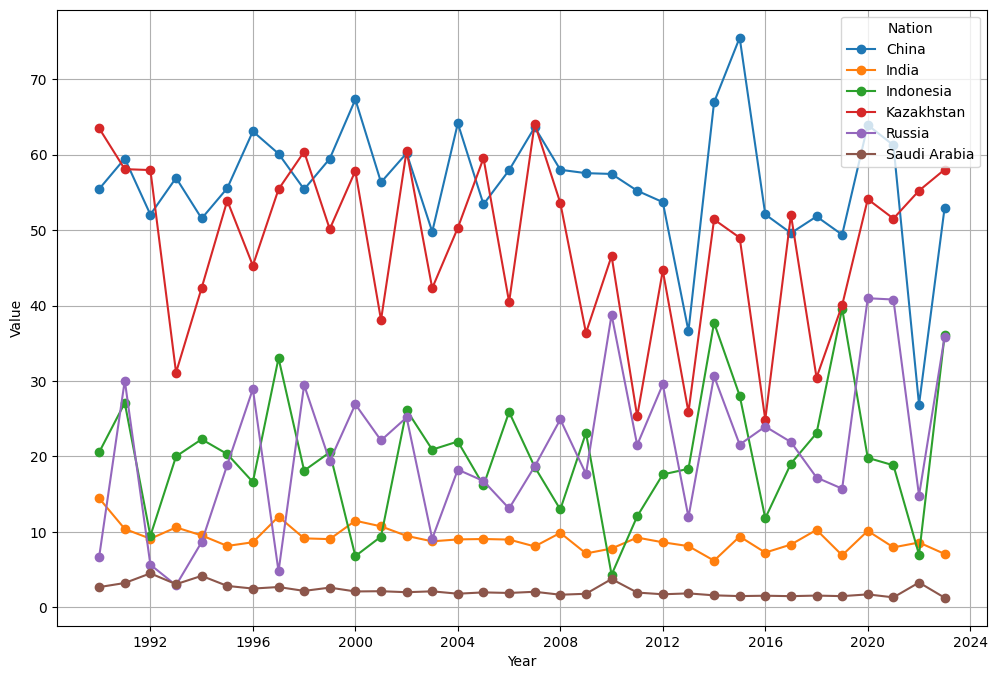

In [ ]:
# Plot data dengan grid dan membedakan berdasarkan negara
# Buat plot untuk setiap negara
for nation in df_pivot.columns:  # Menggunakan kolom dari df_pivot yang merupakan negara
    plt.plot(df_pivot.index, df_pivot[nation], marker='o', label=nation)  # Plot garis dengan marker

# Tambahkan  label dan grid
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Nation')  # Tambahkan legenda untuk negara
plt.show()


In [ ]:
# Membagi dataset -+70% train, -+30% test
train_df = df_pivot.loc[:'2013-01-01']  # Data dari 1979 hingga 2010 untuk training
test_df = df_pivot.loc['2014-01-01':]   # Data dari 2011 hingga 2023 untuk testing

In [ ]:
# Menghitung jumlah data pada train dan test
jumlah_train = len(train_df)
jumlah_test = len(test_df)
total_data = len(df_pivot)  # Pastikan ini adalah total dari df_pivot

# Menghitung persentase train dan test
persentase_train = (jumlah_train / total_data) * 100
persentase_test = (jumlah_test / total_data) * 100

print(f'Jumlah data train: {jumlah_train}')
print(f'Jumlah data test: {jumlah_test}')
print(f'Total data: {total_data}')
print(f'Persentase data train: {persentase_train:.2f}%')
print(f'Persentase data test: {persentase_test:.2f}%')

Jumlah data train: 24
Jumlah data test: 10
Total data: 34
Persentase data train: 70.59%
Persentase data test: 29.41%


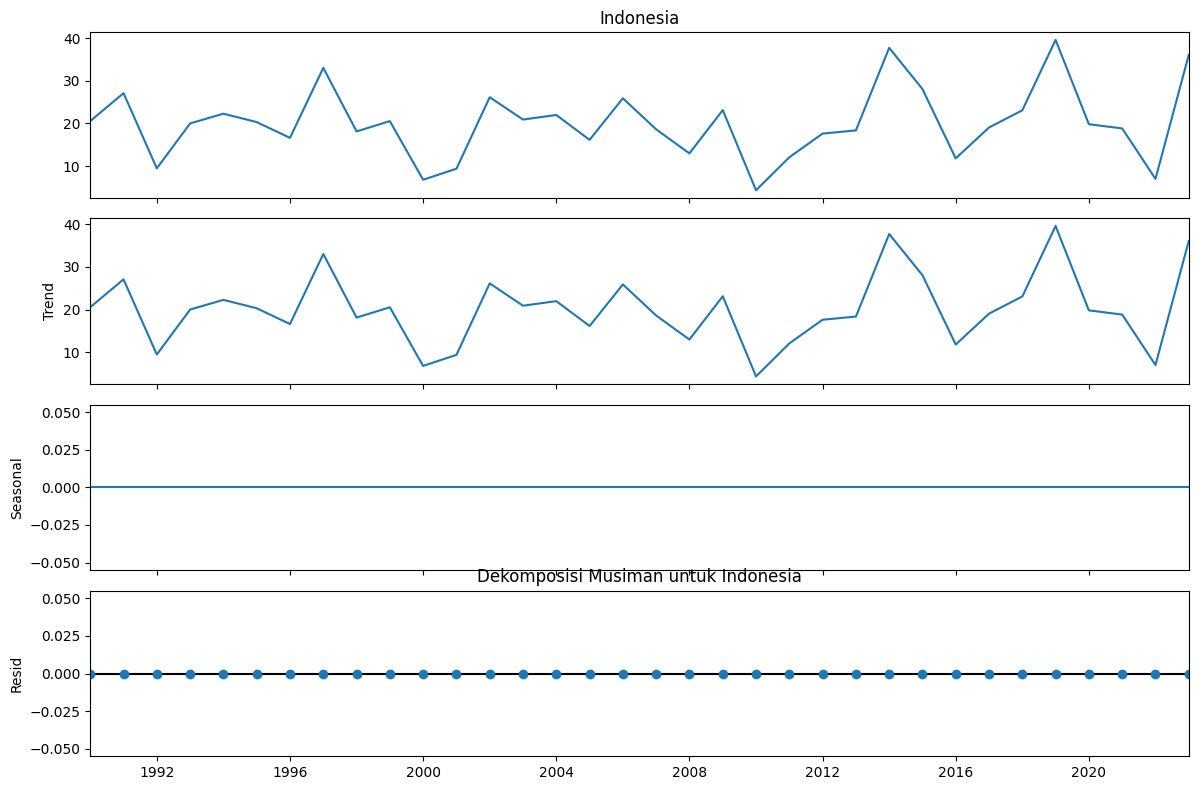

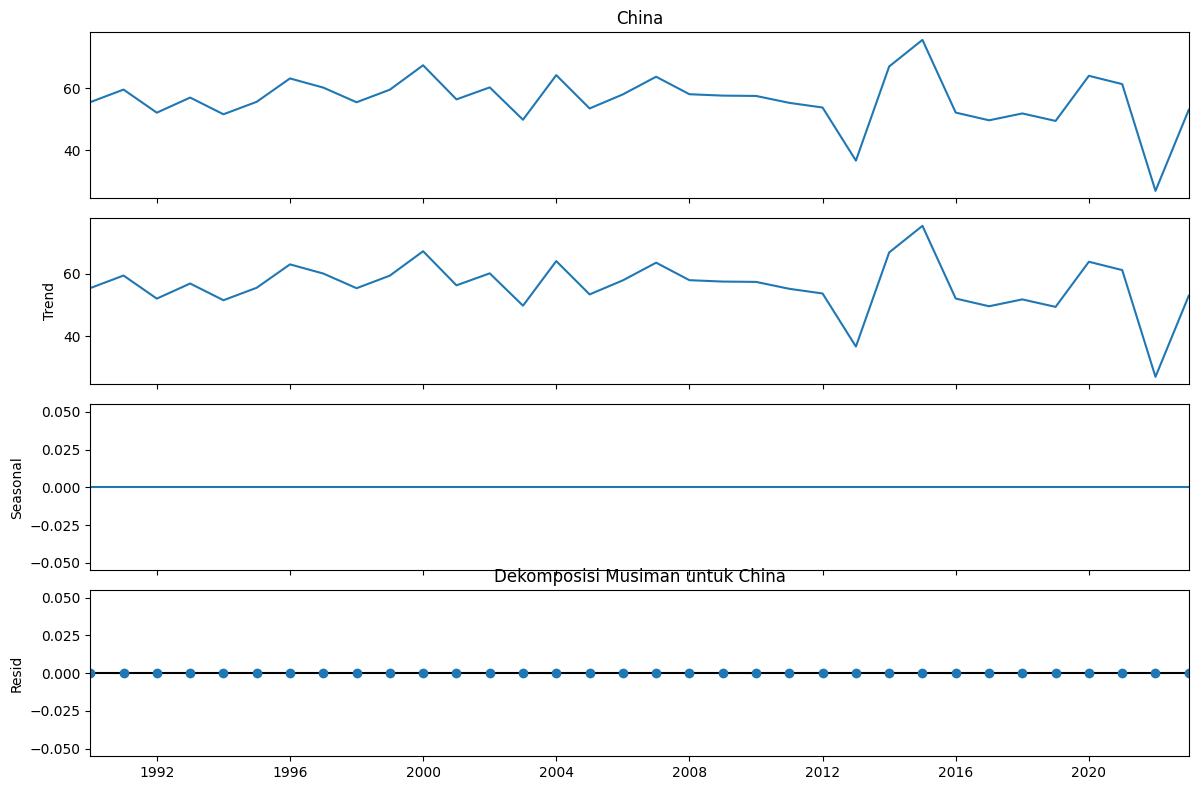

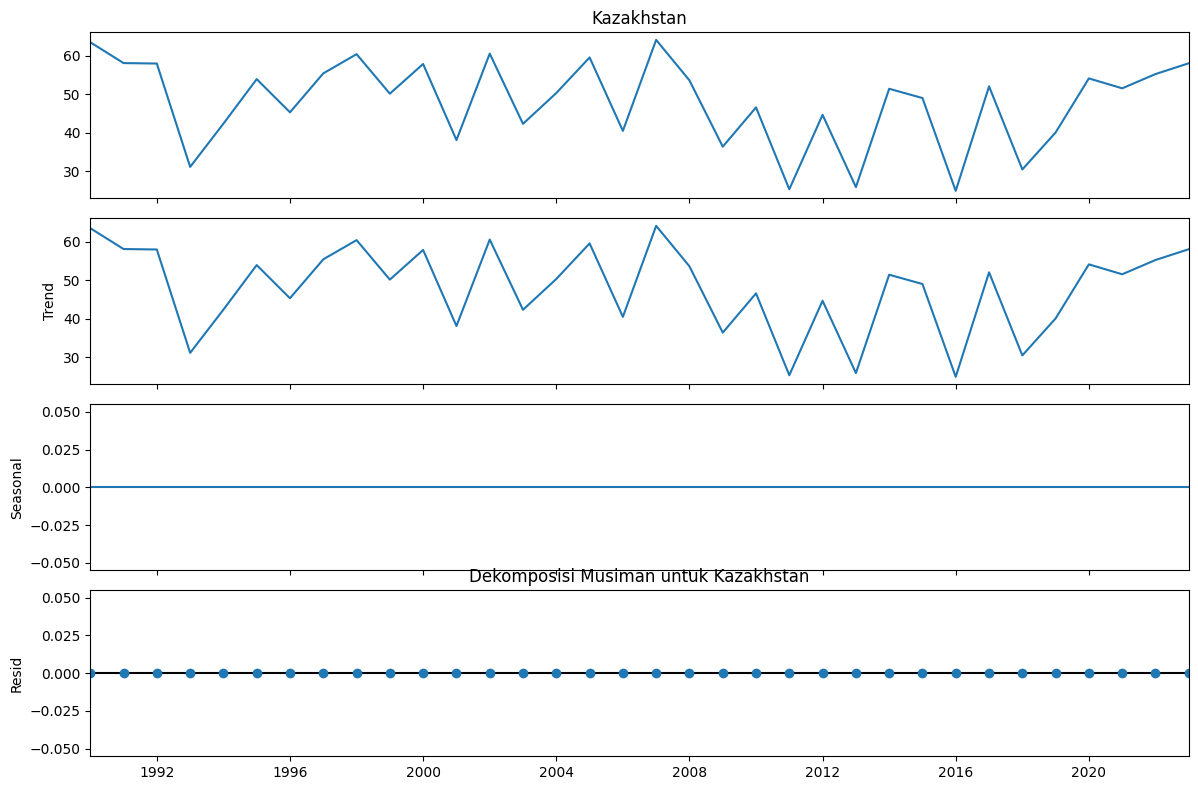

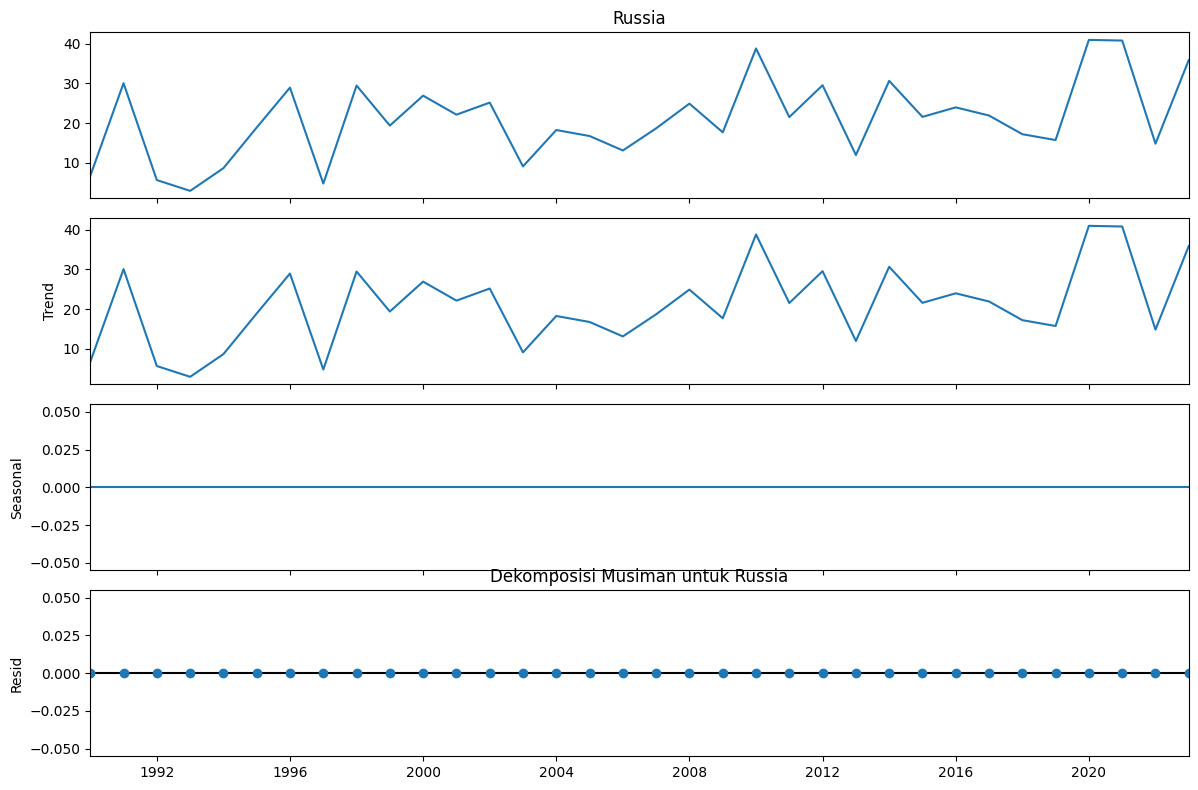

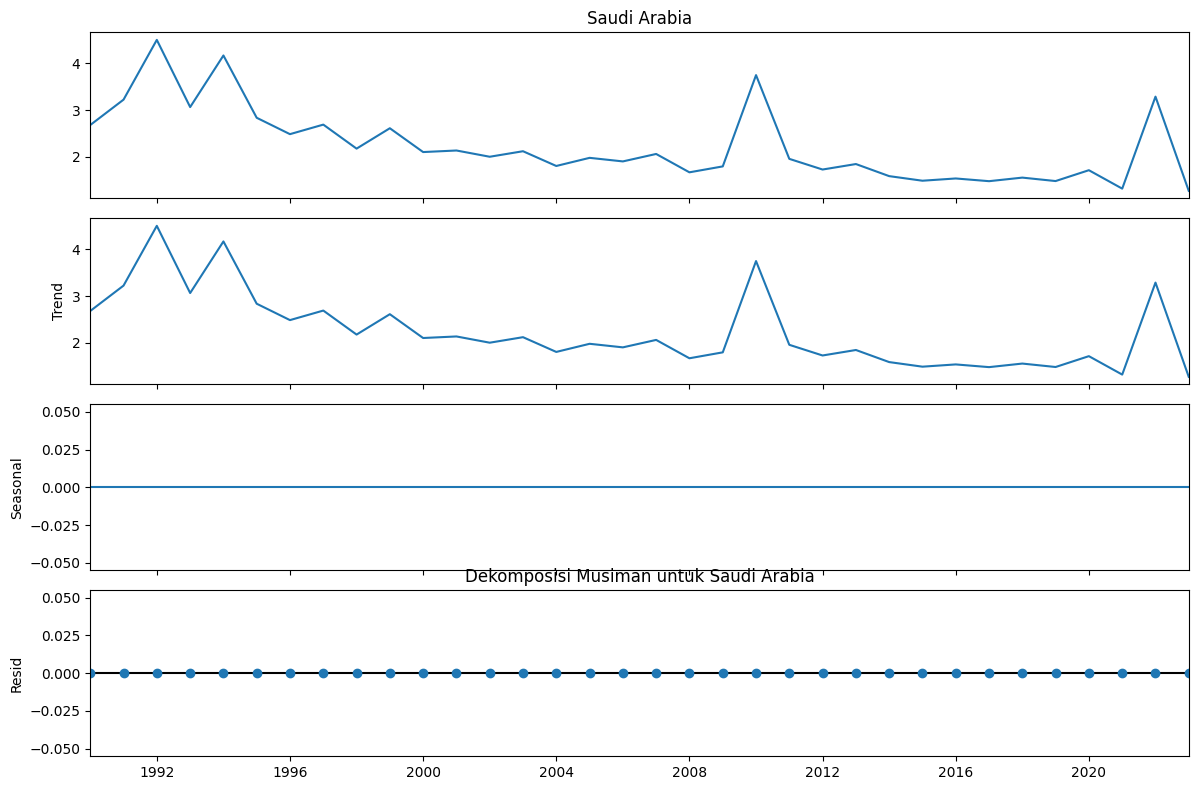

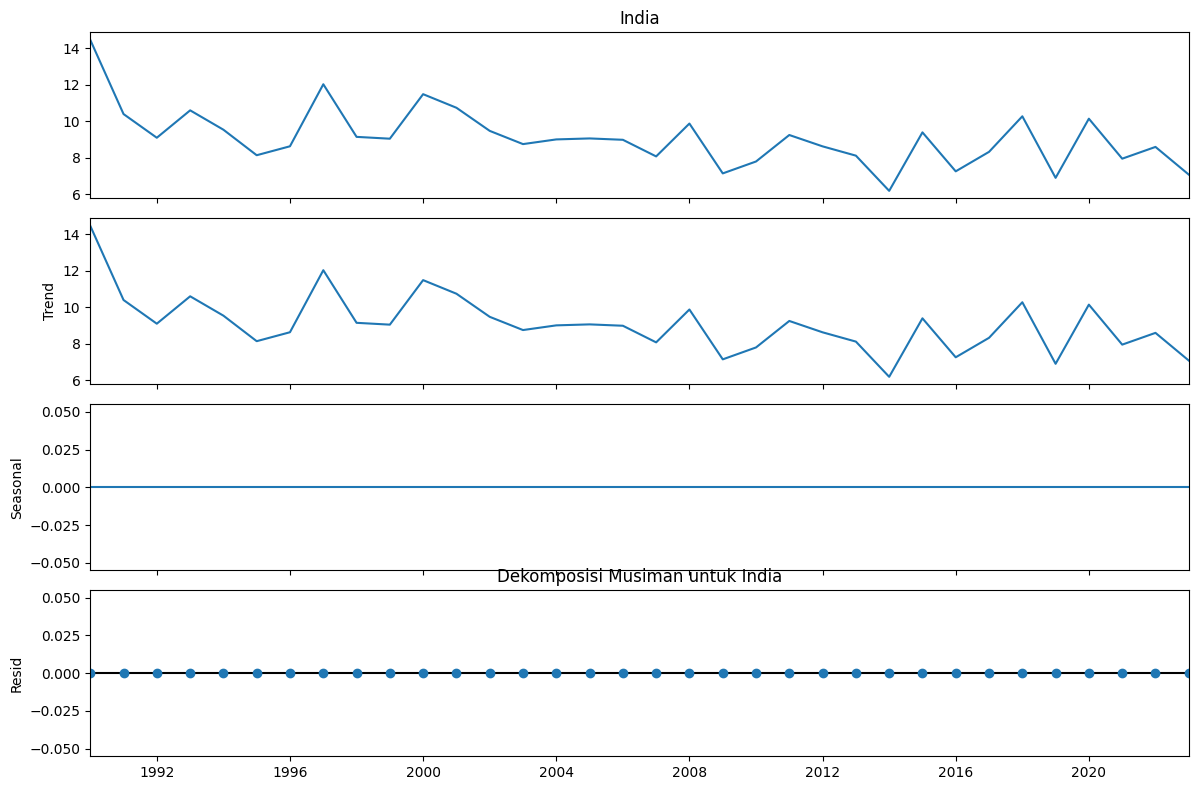

In [ ]:
# Melakukan dekomposisi musiman untuk kolom Indonesia
decompose_add = seasonal_decompose(df_pivot['Indonesia'], model='additive')
decompose_add.plot()
plt.title('Dekomposisi Musiman untuk Indonesia')
plt.show()

# Jika ingin dekomposisi untuk China
decompose_add_China = seasonal_decompose(df_pivot['China'], model='additive')
decompose_add_China.plot()
plt.title('Dekomposisi Musiman untuk China')
plt.show()

# Jika ingin dekomposisi untuk Kazakhstan
decompose_add_Kazakhstan = seasonal_decompose(df_pivot['Kazakhstan'], model='additive')
decompose_add_Kazakhstan.plot()
plt.title('Dekomposisi Musiman untuk Kazakhstan')
plt.show()

# Jika ingin dekomposisi untuk Russia
decompose_add_Russia = seasonal_decompose(df_pivot['Russia'], model='additive')
decompose_add_Russia.plot()
plt.title('Dekomposisi Musiman untuk Russia')
plt.show()

# Jika ingin dekomposisi untuk Saudi Arabia
decompose_add_Saudi_Arabia = seasonal_decompose(df_pivot['Saudi Arabia'], model='additive')
decompose_add_Saudi_Arabia.plot()
plt.title('Dekomposisi Musiman untuk Saudi Arabia')
plt.show()

# Jika ingin dekomposisi untuk India
decompose_add_India = seasonal_decompose(df_pivot['India'], model='additive')
decompose_add_India.plot()
plt.title('Dekomposisi Musiman untuk India')
plt.show()



**Deret Waktu Stasioner:**  
Deret waktu dikatakan stasioner jika memiliki sifat-sifat statistik seperti rata-rata, variansi, autokorelasi, dll. yang konstan sepanjang waktu. Sebagian besar metode peramalan statistik didasarkan pada asumsi bahwa deret waktu dapat dibuat mendekati stasioner (yaitu, "distasionerkan") dengan menggunakan transformasi matematika. Deret yang sudah distasionerkan relatif lebih mudah untuk diprediksi.

Tanda-tanda jelas seperti tren, musiman, atau struktur sistematis lainnya dalam deret merupakan indikator bahwa deret tersebut tidak stasioner. Metode yang lebih akurat untuk memeriksa ini adalah dengan menggunakan uji statistik, seperti uji Dickey-Fuller.

**Uji ADFuller:**  
Jika nilai statistik uji < Nilai Kritis dan nilai p < 0.05 – maka deret tersebut adalah stasioner.

In [ ]:
# Fungsi untuk uji ADF
def adf_test(timeseries, country_name):
    print(f"Uji ADF untuk {country_name}:")
    print('----------------------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adftest[4].items():
        adf_output[f'Critical Value ({key})'] = value
    print(adf_output)
    print("\n")

# Daftar negara yang ingin dianalisis
countries = ['Indonesia', 'China', 'Kazakhstan', 'Russia', 'Saudi Arabia','India']

# Memanggil fungsi ADF untuk setiap negara
for country in countries:
    adf_test(df_pivot[country], country)


Uji ADF untuk Indonesia:
----------------------------------------------
Test Statistic                 -5.508214
p-value                         0.000002
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


Uji ADF untuk China:
----------------------------------------------
Test Statistic                 -5.329014
p-value                         0.000005
#Lags Used                      1.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


Uji ADF untuk Kazakhstan:
----------------------------------------------
Test Statistic                 -1.591261
p-value                         0.487982
#Lags Used                      8.000000
Number of Observations Used    25.000000
Critical Value 

**Fungsi Autokorelasi dan Autokorelasi Parsial:**  
Autokorelasi dan autokorelasi parsial adalah grafik yang merangkum secara visual pengaruh pengamatan pada waktu sebelumnya terhadap pengamatan yang ingin kita prediksi.

**Plot ACF memberikan nilai q dan PACF memberikan nilai p.**  
Perhatikan ekor pola di ACF atau PACF. Jika ekor tersebut melewati area biru, maka ini dapat memberikan kita nilai p dan q yang potensial.

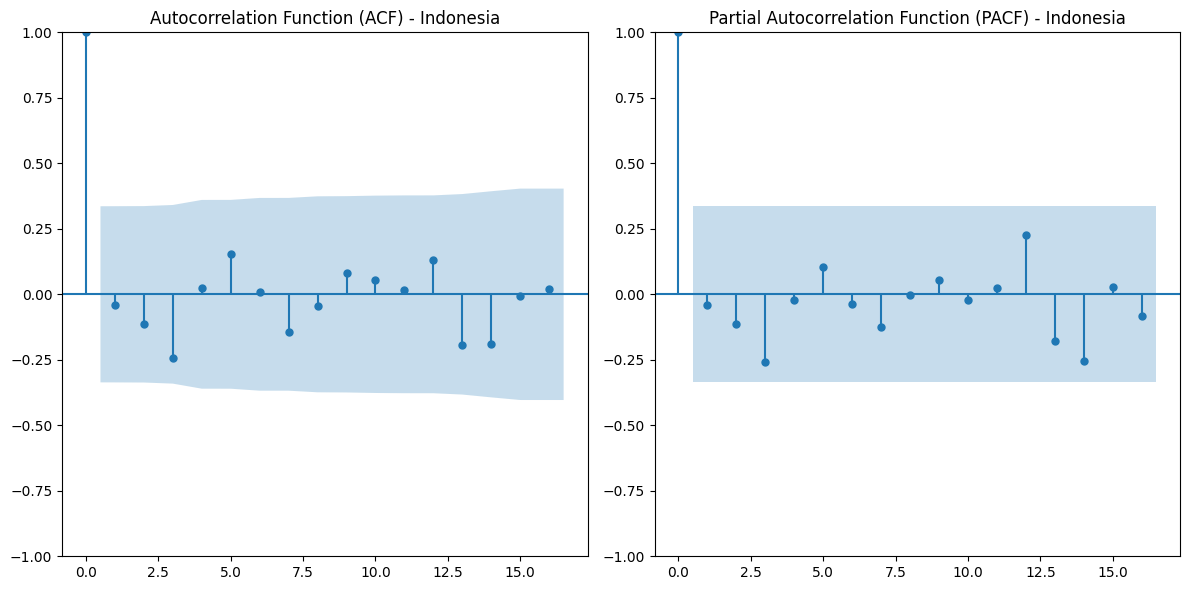

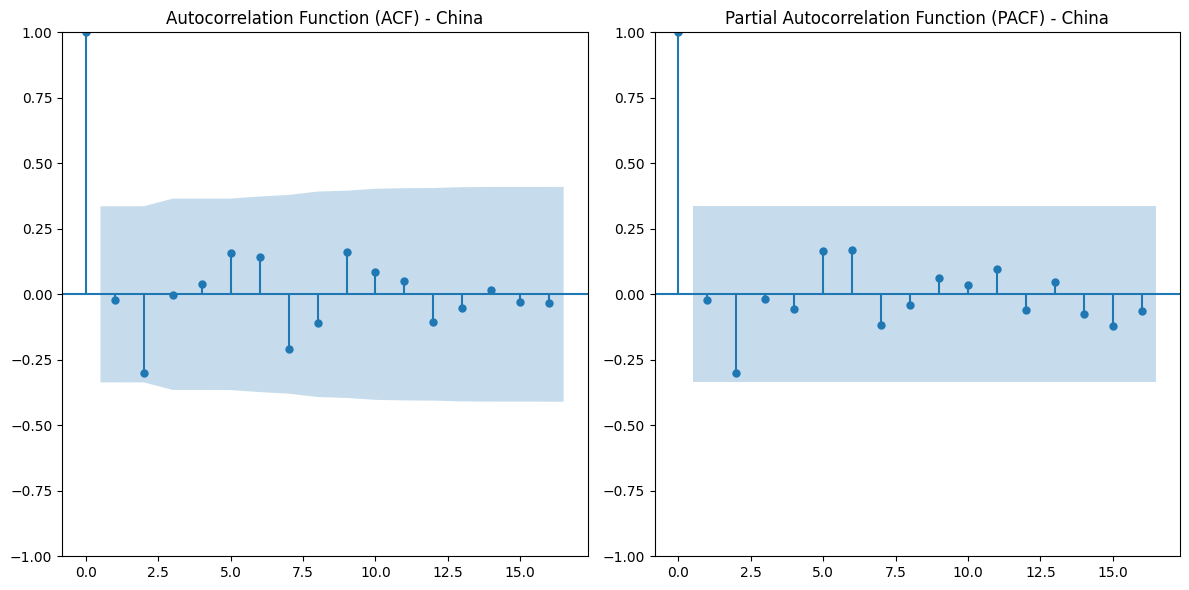

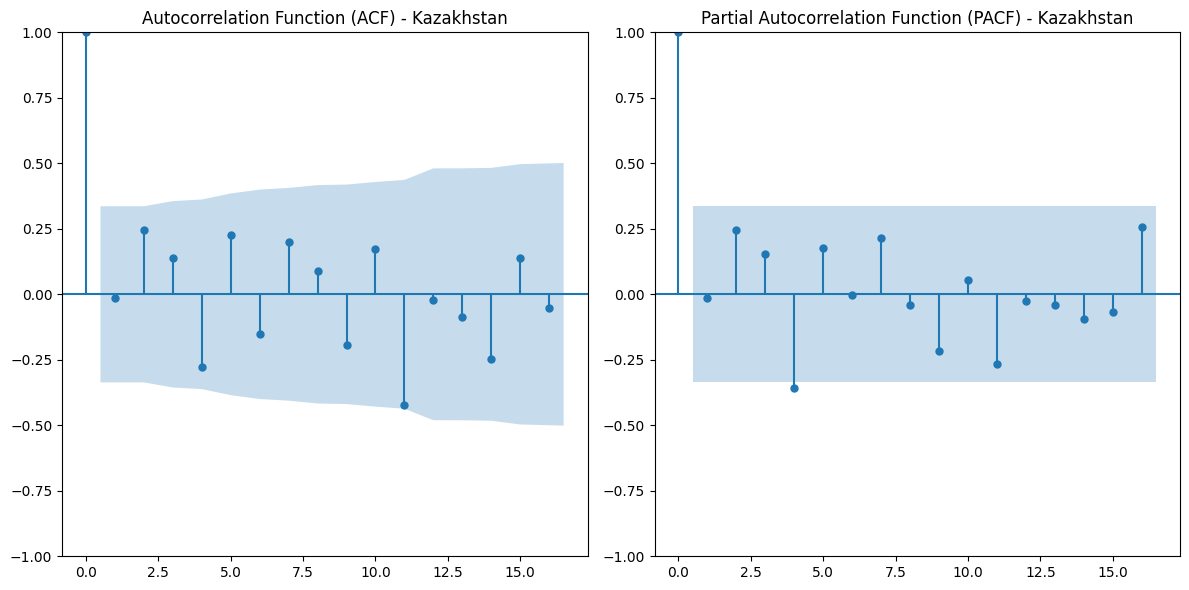

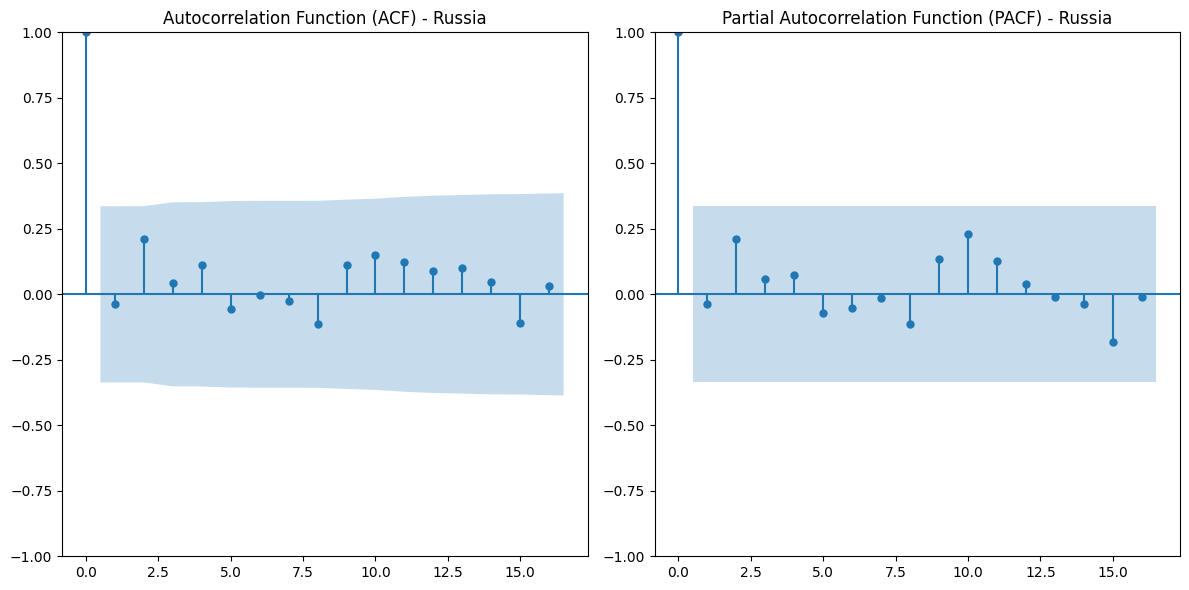

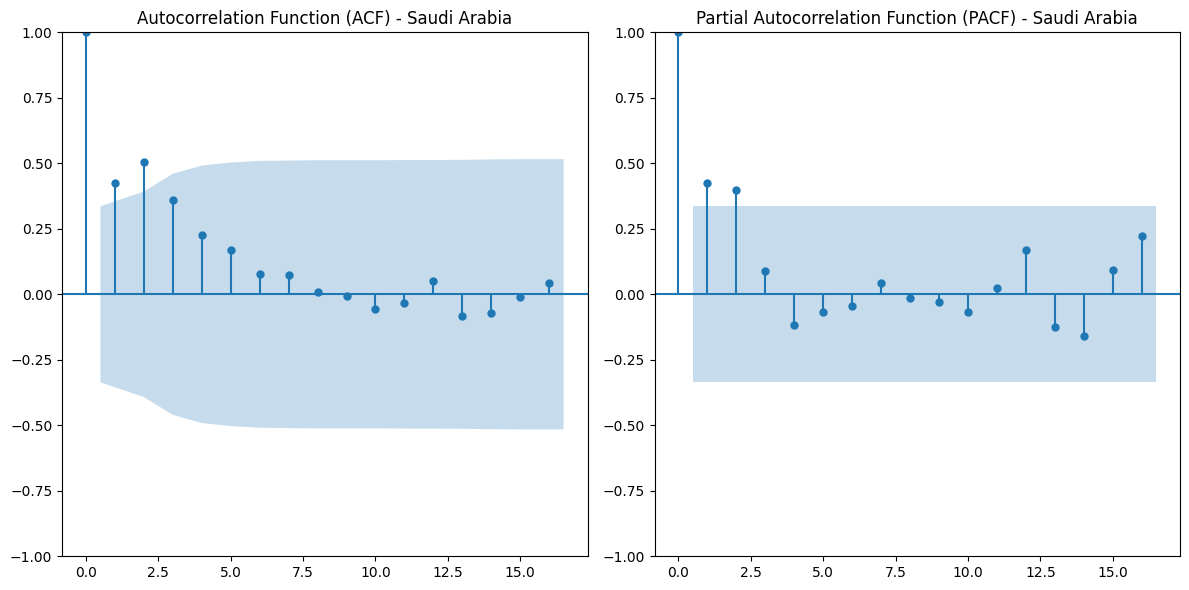

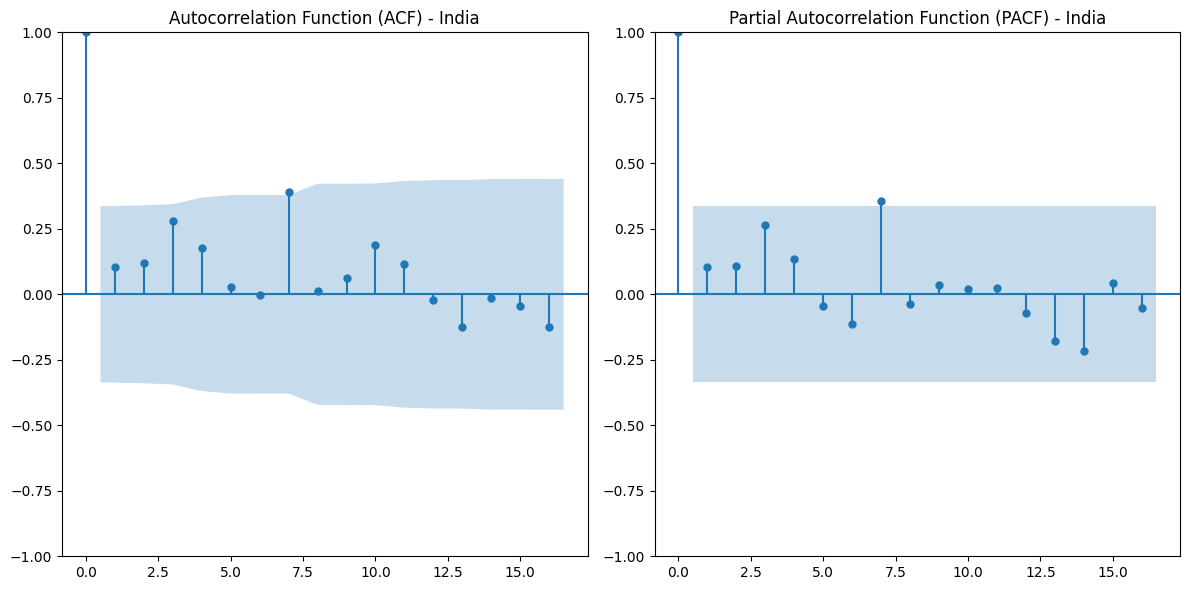

In [ ]:
# Daftar negara yang ingin dianalisis
countries = ['Indonesia', 'China', 'Kazakhstan', 'Russia', 'Saudi Arabia','India']

# Fungsi untuk menampilkan ACF dan PACF
def plot_acf_pacf(country):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plot_acf(df_pivot[country], ax=plt.gca())
    plt.title(f'Autocorrelation Function (ACF) - {country}')

    plt.subplot(1, 2, 2)
    plot_pacf(df_pivot[country], ax=plt.gca())
    plt.title(f'Partial Autocorrelation Function (PACF) - {country}')

    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk setiap negara
for country in countries:
    plot_acf_pacf(country)


# Model-Model Time Series Forcasting 🤖

## Exponential Smoothing

# **Exponential Smoothing:**  
Exponential smoothing adalah metode peramalan deret waktu untuk data univariat. Ada tiga jenis utama metode peramalan deret waktu exponential smoothing:

1. Metode sederhana yang mengasumsikan tidak ada struktur sistematis.
2. Ekstensi yang secara eksplisit menangani tren.
3. Pendekatan yang paling maju yang menambahkan dukungan untuk musiman.

### Double Exponantial Smoothing


**Double Exponential Smoothing:**

Double Exponential Smoothing adalah ekstensi dari Exponential Smoothing yang secara eksplisit menambahkan dukungan untuk tren dalam deret waktu univariat.

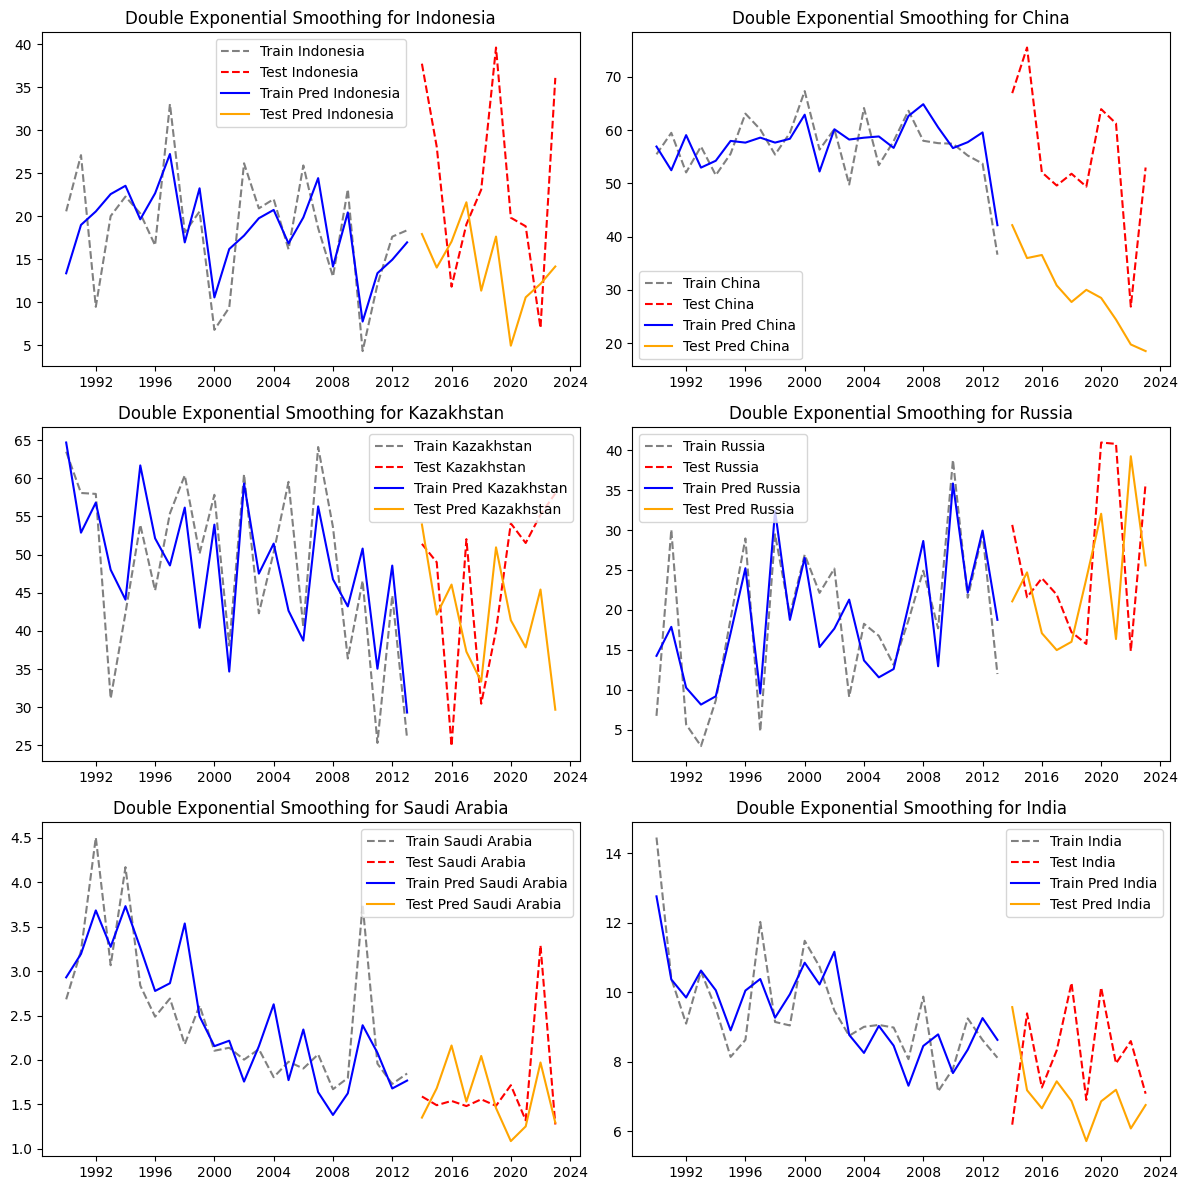

In [ ]:
# Daftar negara yang akan diproses
countries = ['Indonesia', 'China', 'Kazakhstan', 'Russia', 'Saudi Arabia','India']

# Fungsi untuk membuat model Double Exponential Smoothing
def double_exp_smoothing(train_data, seasonal_periods):
    model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=seasonal_periods, damped_trend=False).fit()
    return model.fittedvalues, model.forecast(steps=10)

# Membuat model dan prediksi untuk setiap negara
predictions = {}
for country in countries:
    train_data = train_df[country]
    seasonal_periods = 10 if country == 'Indonesia' else 12  # Menyesuaikan dengan jumlah periode musiman
    train_pred, test_pred = double_exp_smoothing(train_data, seasonal_periods)
    predictions[country] = (train_pred, test_pred)

# Plotting hasil prediksi
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
for i, country in enumerate(countries):
    ax = axes[i // 2, i % 2]
    ax.plot(train_df[country], label=f'Train {country}', linestyle='--', color='gray')
    ax.plot(test_df[country], label=f'Test {country}', linestyle='--', color='red')
    ax.plot(predictions[country][0], label=f'Train Pred {country}', color='blue')
    ax.plot(predictions[country][1], label=f'Test Pred {country}', color='orange')
    ax.set_title(f'Double Exponential Smoothing for {country}')
    ax.legend()

plt.tight_layout()
plt.show()


Interpretasi Hasil

Secara umum, visualisasi ini menunjukkan seberapa baik model Double Exponential Smoothing mampu menangkap pola dalam data historis dan memprediksi nilai di masa depan. Beberapa poin penting yang dapat kita amati:

-  Kemampuan Model dalam Menangkap Pola:

  - Pola Musiman: Beberapa negara menunjukkan pola musiman yang jelas, seperti fluktuasi tahunan. Model DES umumnya cukup baik dalam menangkap pola musiman ini.

  - Tren: Beberapa negara menunjukkan tren kenaikan atau penurunan jangka panjang. Model Double Exponential Smoothing juga dapat menangkap tren ini, meskipun mungkin tidak selalu sempurna.

- Akurasi Prediksi:

  - Data Latih: Prediksi pada data latih umumnya cukup akurat, menunjukkan bahwa model telah "memahami" data dengan baik.
  - Data Uji: Akurasi pada data uji bervariasi antar negara. Beberapa negara menunjukkan prediksi yang cukup akurat, sementara yang lain memiliki kesalahan yang lebih besar.

  

In [ ]:
# Menghitung panjang data untuk semua negara
lengths = {
    'Length of test_df[\'Indonesia\']': len(test_df['Indonesia']),
    'Length of test_pred_Indonesia': len(predictions['Indonesia'][1]),
    'Length of test_df[\'China\']': len(test_df['China']),
    'Length of test_pred_China': len(predictions['China'][1]),
    'Length of test_df[\'Kazakhstan\']': len(test_df['Kazakhstan']),
    'Length of test_pred_Kazakhstan': len(predictions['Kazakhstan'][1]),
    'Length of test_df[\'Russia\']': len(test_df['Russia']),
    'Length of test_pred_Russia': len(predictions['Russia'][1]),
    'Length of test_df[\'Saudi Arabia\']': len(test_df['Saudi Arabia']),
    'Length of test_pred_Saudi Arabia': len(predictions['Saudi Arabia'][1]),
    'Length of test_df[\'India\']': len(test_df['India']),
    'Length of test_pred_India': len(predictions['India'][1]),
}

# Mengonversi hasil ke dalam DataFrame untuk tampilan yang lebih rapi
lengths_df = pd.DataFrame(list(lengths.items()), columns=['Description', 'Length'])
lengths_df



Description  Length
0      Length of test_df['Indonesia']      10
1       Length of test_pred_Indonesia      10
2          Length of test_df['China']      10
3           Length of test_pred_China      10
4     Length of test_df['Kazakhstan']      10
5      Length of test_pred_Kazakhstan      10
6         Length of test_df['Russia']      10
7          Length of test_pred_Russia      10
8   Length of test_df['Saudi Arabia']      10
9    Length of test_pred_Saudi Arabia      10
10         Length of test_df['India']      10
11          Length of test_pred_India      10

Ini menunjukan panjang atau banayak priode yang diprediksi

In [ ]:
# Daftar negara
countries = ['Indonesia', 'China', 'Kazakhstan', 'Russia', 'Saudi Arabia', 'India']

# Fungsi untuk menghitung RMSE dan MAPE
def calculate_metrics(actual, predicted):
    rmse = mean_squared_error(actual, predicted) ** 0.5
    mape = mean_absolute_percentage_error(actual, predicted)
    return rmse, mape

# Menyimpan hasil dalam dictionary
results = {'Train RMSE': [], 'Test RMSE': [], 'Train MAPE': [], 'Test MAPE': []}

# Menghitung RMSE dan MAPE untuk setiap negara
for country in countries:
    rmse_train, mape_train = calculate_metrics(train_df[country], predictions[country][0])
    rmse_test, mape_test = calculate_metrics(test_df[country], predictions[country][1])

    # Menyimpan hasil ke dalam dictionary
    results['Train RMSE'].append(rmse_train)
    results['Test RMSE'].append(rmse_test)
    results['Train MAPE'].append(mape_train)
    results['Test MAPE'].append(mape_test)

# Membuat DataFrame hasil
results_df = pd.DataFrame(results, index=countries)

# Menampilkan hasil
results_df


Train RMSE  Test RMSE  Train MAPE  Test MAPE
Indonesia       4.846554  14.278751    0.267216   0.519805
China           4.405779  27.513092    0.068310   0.449605
Kazakhstan      7.140077  14.478037    0.132368   0.285809
Russia          5.391869  12.832210    0.387495   0.440581
Saudi Arabia    0.511268   0.534876    0.142552   0.188275
India           0.934666   2.195279    0.079761   0.223176

Hasil evaluasi menggunakan metode Double Exponential Smoothing menunjukkan performa yang bervariasi untuk masing-masing negara. Berdasarkan nilai RMSE (Root Mean Square Error) dan MAPE (Mean Absolute Percentage Error), negara yang paling cocok dengan metode ini adalah Saudi Arabia. Nilai RMSE dan MAPE untuk Saudi Arabia sangat rendah baik pada data training (**RMSE: 0.511, MAPE: 0.143**) maupun testing (**RMSE: 0.535, MAPE: 0.188**), menunjukkan model mampu memprediksi dengan akurat. India juga memiliki performa cukup baik dengan nilai error yang rendah, terutama pada testing (**RMSE: 2.195, MAPE: 0.223**). Sebaliknya, performa model kurang optimal untuk China karena memiliki nilai error testing yang tinggi (**RMSE: 27.513, MAPE: 0.450**), yang mengindikasikan prediksi model kurang sesuai untuk data tersebut. Negara-negara lain seperti Indonesia, Kazakhstan, dan Russia menunjukkan hasil yang cukup baik pada training, tetapi masih terdapat peningkatan error yang signifikan pada testing. Oleh karena itu, Double Exponential Smoothing paling cocok digunakan pada dataset negara yang menunjukkan stabilitas pola tren seperti Saudi Arabia dan India.

### Triple Exponential Smoothing

**Triple Exponential Smoothing:**

Triple Exponential Smoothing adalah ekstensi dari Exponential Smoothing yang secara eksplisit menambahkan dukungan untuk musiman dalam deret waktu univariat. Juga dikenal sebagai Holt-Winters Exponential Smoothing.

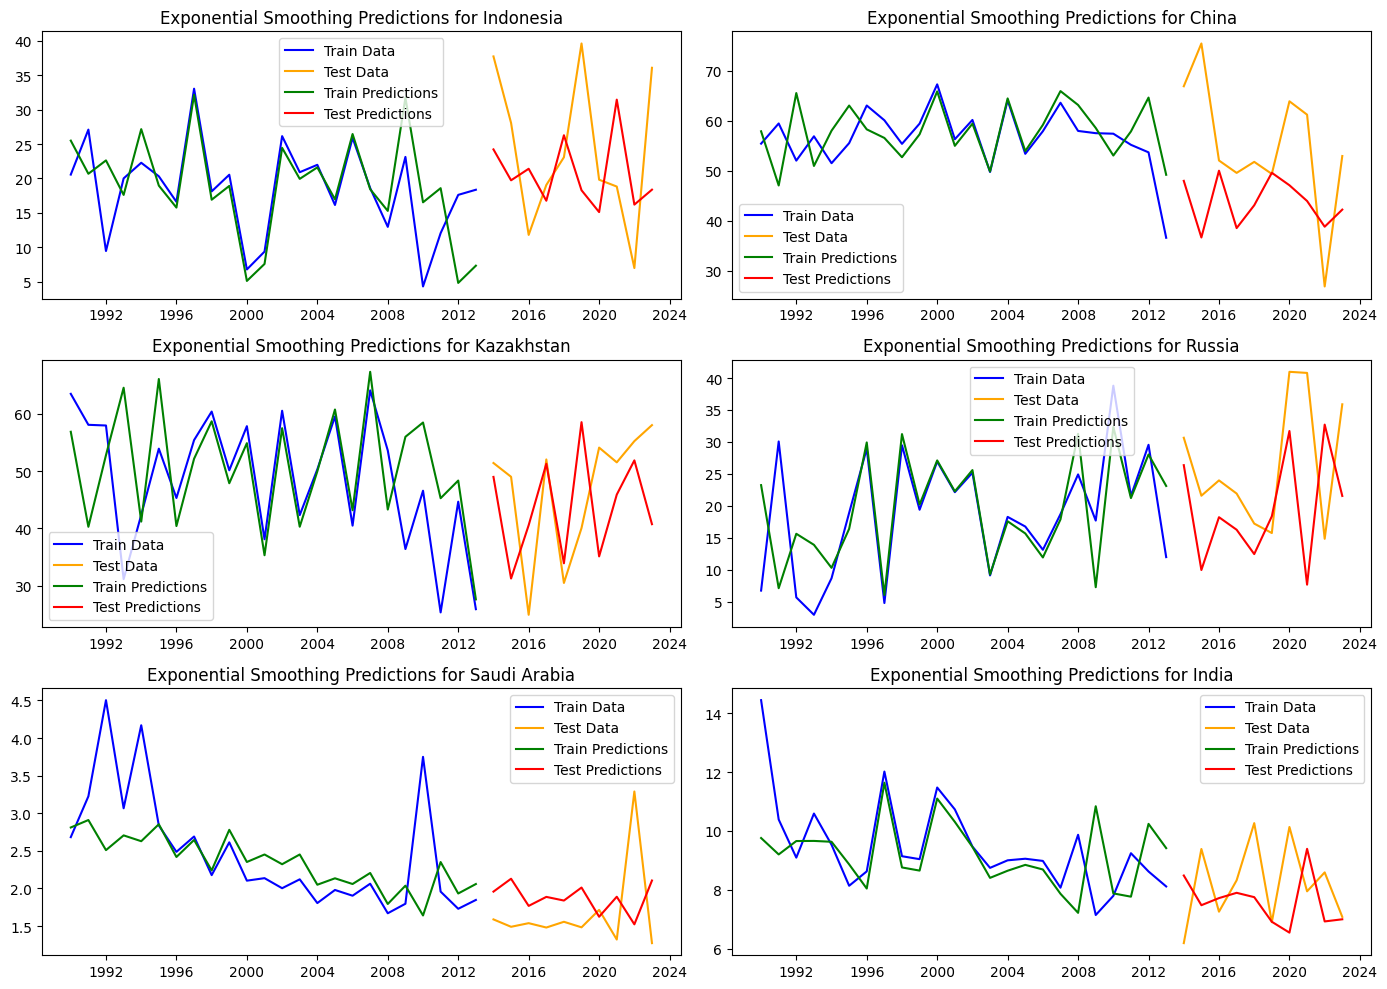

In [ ]:
# Daftar negara yang akan diproses
countries = ['Indonesia', 'China', 'Kazakhstan', 'Russia', 'Saudi Arabia','India']

# Membuat model Holt-Winters dan melakukan prediksi untuk setiap negara
predictions = {}
for country in countries:
    # Model Holt-Winters
    hw_model = ExponentialSmoothing(
        train_df[country],
        trend='add',
        initialization_method='heuristic',
        seasonal='add',
        seasonal_periods=12,
        damped_trend=True
    ).fit()

    # Prediksi untuk train dan test
    hw_train_pred = hw_model.fittedvalues
    hw_test_pred = hw_model.forecast(len(test_df))

    # Simpan hasil prediksi
    predictions[country] = (hw_train_pred, hw_test_pred)

# Visualisasi hasil prediksi untuk semua negara
plt.figure(figsize=(14, 10))
for i, country in enumerate(countries):
    plt.subplot(3, 2, i+1)
    plt.plot(train_df[country], label='Train Data', color='blue')
    plt.plot(test_df[country], label='Test Data', color='orange')
    plt.plot(predictions[country][0].index, predictions[country][0], label='Train Predictions', color='green')
    plt.plot(test_df.index, predictions[country][1], label='Test Predictions', color='red')
    plt.title(f'Exponential Smoothing Predictions for {country}')
    plt.legend()

plt.tight_layout()
plt.show()


Interpretasi Umum

Secara keseluruhan, model Tripple Exponensial Smooting terlihat mampu menangkap pola umum dalam data, terutama tren dan musim. Namun, tingkat akurasi prediksi bervariasi antar negara. Beberapa hal yang bisa kita amati:

Kemampuan Menangkap Tren: Model umumnya dapat mengikuti tren kenaikan atau penurunan yang terjadi pada data.
Kemampuan Menangkap Musim: Untuk negara-negara dengan pola musiman yang jelas, model juga mampu menangkap fluktuasi musiman tersebut.
Akurasi Prediksi:
Data Latih: Prediksi pada data latih umumnya cukup baik, menunjukkan bahwa model telah "belajar" dengan baik dari data historis.
Data Uji: Akurasi pada data uji lebih bervariasi. Beberapa negara menunjukkan prediksi yang cukup akurat, sementara yang lain memiliki kesalahan yang lebih besar.

In [ ]:
# Daftar negara yang akan diproses
countries = ['Indonesia', 'China', 'Kazakhstan', 'Russia', 'Saudi Arabia','India']

# Membuat dictionary untuk menyimpan prediksi
train_preds = {}
test_preds = {}

# Loop untuk melatih model Holt-Winters dan mendapatkan prediksi untuk setiap negara
for country in countries:
    hw_model = ExponentialSmoothing(
        train_df[country],
        trend='add',
        seasonal='add',
        seasonal_periods=12,
        damped_trend=True
    ).fit()

    # Menyimpan prediksi
    train_preds[country] = hw_model.fittedvalues
    test_preds[country] = hw_model.forecast(len(test_df))

# Menyusun hasil prediksi dalam DataFrame
results_hw = pd.DataFrame({
    'Metrics': ['Train Predicted', 'Test Predicted'],
    **{country: [train_preds[country], test_preds[country]] for country in countries}
})

# Menentukan index dan menampilkan hasil
results_hw.set_index('Metrics', inplace=True)
results_hw


Indonesia  \
Metrics                                                              
Train Predicted  period
1990-01-01    23.603809
1991-01-01    2...   
Test Predicted   2014-01-01    22.620534
2015-01-01    23.26955...   

                                                             China  \
Metrics                                                              
Train Predicted  period
1990-01-01    56.931121
1991-01-01    5...   
Test Predicted   2014-01-01    42.219323
2015-01-01    36.10479...   

                                                        Kazakhstan  \
Metrics                                                              
Train Predicted  period
1990-01-01    64.720529
1991-01-01    5...   
Test Predicted   2014-01-01    54.196839
2015-01-01    42.41644...   

                                                            Russia  \
Metrics                                                              
Train Predicted  period
1990-01-01    12.695575
1991-01-01    1...   
Test Predicted   2014-01-01    20.583205
2015-01-01    23.65958...   

                                                      Saudi Arabia  \
Metrics                                                              
Train Predicted  period
1990-01-01    3.164439
1991-01-01    3....   
Test Predicted   2014-01-01    1.195623
2015-01-01    1.670649
...   

                                                             India  
Metrics                                                             
Train Predicted  period
1990-01-01    12.896979
1991-01-01    1...  
Test Predicted   2014-01-01    9.732445
2015-01-01    7.409043
...

In [ ]:
# Daftar negara yang akan diproses
countries = ['Indonesia', 'China', 'Kazakhstan', 'Russia', 'Saudi Arabia','India']

# Menyimpan hasil RMSE dan MAPE untuk setiap negara
results = {}

# Loop untuk melatih model Holt-Winters dan menghitung RMSE serta MAPE
for country in countries:
    # Melatih model Holt-Winters
    hw_model = ExponentialSmoothing(
        train_df[country],
        trend='add',
        seasonal='add',
        seasonal_periods=12,
        damped_trend=True
    ).fit()

    # Mendapatkan prediksi
    hw_train_pred = hw_model.fittedvalues
    hw_test_pred = hw_model.forecast(len(test_df))

    # Menyesuaikan panjang test_df dan hw_test_pred agar konsisten
    min_length = min(len(test_df), len(hw_test_pred))
    test_df_trimmed = test_df[country].iloc[:min_length]
    hw_test_pred_trimmed = hw_test_pred[:min_length]

    # Menghitung RMSE dan MAPE
    rmse_train = mean_squared_error(train_df[country], hw_train_pred) ** 0.5
    rmse_test = mean_squared_error(test_df_trimmed, hw_test_pred_trimmed) ** 0.5
    mape_train = mean_absolute_percentage_error(train_df[country], hw_train_pred)
    mape_test = mean_absolute_percentage_error(test_df_trimmed, hw_test_pred_trimmed)

    # Menyimpan hasil untuk negara ini
    results[country] = {
        'Train RMSE': rmse_train,
        'Test RMSE': rmse_test,
        'Train MAPE': mape_train,
        'Test MAPE': mape_test
    }

# Menyusun hasil dalam DataFrame
results_df = pd.DataFrame(results).T  # Transpose untuk format yang rapi
results_df



Train RMSE  Test RMSE  Train MAPE  Test MAPE
Indonesia       4.146856  11.115402    0.284314   0.328443
China           4.406247  27.031064    0.068362   0.438488
Kazakhstan      7.158110  14.282924    0.133140   0.284822
Russia          5.317883  13.570511    0.361866   0.451288
Saudi Arabia    0.444626   0.531504    0.113293   0.300437
India           0.932927   1.931898    0.081744   0.184024

Hasil evaluasi dengan Triple Exponential Smoothing pada data ini menunjukkan bahwa metode ini bekerja sangat baik untuk beberapa negara, terutama Saudi Arabia dan India. Saudi Arabia memiliki nilai error terendah (**Train RMSE: 0.445, Test RMSE: 0.532, Test MAPE: 0.300**), menunjukkan prediksi model sangat akurat untuk negara ini. India juga memiliki performa yang baik dengan nilai error testing yang rendah (**Test RMSE: 1.932, Test MAPE: 0.184**).

Sementara itu, hasil untuk Indonesia cukup memuaskan karena nilai RMSE dan MAPE pada testing (**RMSE: 11.115, MAPE: 0.328**) lebih stabil dibanding beberapa negara lain. Namun, untuk China, nilai RMSE dan MAPE testing yang tinggi (**RMSE: 27.031, MAPE: 0.438**) menunjukkan bahwa metode ini kurang cocok untuk data China. Kazakhstan dan Russia memiliki hasil yang cukup baik pada training, tetapi terjadi sedikit peningkatan error pada testing, menandakan model bekerja cukup baik tetapi tidak seoptimal untuk Saudi Arabia dan India.

## ARIMA

Metode statistik yang populer dan banyak digunakan untuk peramalan deret waktu adalah model ARIMA. ARIMA adalah akronim yang berarti AutoRegressive Integrated Moving Average. Parameter-parameter dari model ARIMA didefinisikan sebagai berikut:

> **p** : Jumlah pengamatan lag yang dimasukkan dalam model, juga disebut sebagai urutan lag.  
> **d** : Jumlah kali pengamatan mentah dibedakan, juga disebut sebagai derajat pembedaan.  
> **q** : Ukuran jendela rata-rata bergerak, juga disebut sebagai urutan rata-rata bergerak.

In [ ]:
# ARIMA untuk Indonesia
ar_indonesia = ARIMA(train_df['Indonesia'], order=(15,0,15)).fit()
ar_train_pred_indonesia = ar_indonesia.fittedvalues
ar_test_pred_indonesia = ar_indonesia.forecast(23)

# ARIMA untuk China
ar_China = ARIMA(train_df['China'], order=(15,0,15)).fit()
ar_train_pred_China = ar_China.fittedvalues
ar_test_pred_China = ar_China.forecast(23)
# ARIMA untuk Kazakhstan
ar_Kazakhstan = ARIMA(train_df['Kazakhstan'], order=(15,0,15)).fit()
ar_train_pred_Kazakhstan = ar_Kazakhstan.fittedvalues
ar_test_pred_Kazakhstan = ar_Kazakhstan.forecast(23)
# ARIMA untuk Russia
ar_Russia = ARIMA(train_df['Russia'], order=(15,0,15)).fit()
ar_train_pred_Russia = ar_Russia.fittedvalues
ar_test_pred_Russia = ar_Russia.forecast(23)
# ARIMA untuk Saudi_Arabia
ar_Saudi_Arabia = ARIMA(train_df['Saudi Arabia'], order=(15,0,15)).fit()
ar_train_pred_Saudi_Arabia = ar_Saudi_Arabia.fittedvalues
ar_test_pred_Saudi_Arabia = ar_Saudi_Arabia.forecast(23)

# ARIMA untuk India
ar_India = ARIMA(train_df['India'], order=(15,0,15)).fit()
ar_train_pred_India = ar_India.fittedvalues
ar_test_pred_India = ar_India.forecast(23)

In [ ]:
# Daftar negara yang akan diproses
countries = ['Indonesia', 'China', 'Kazakhstan', 'Russia', 'Saudi Arabia','India']

# Menyimpan hasil prediksi untuk setiap negara
results_arima = {}

# Loop untuk melatih model ARIMA dan menghasilkan prediksi
for country in countries:
    # Melatih model ARIMA
    ar_model = ARIMA(train_df[country], order=(15, 0, 15)).fit()

    # Mendapatkan prediksi
    ar_train_pred = ar_model.fittedvalues
    ar_test_pred = ar_model.forecast(len(test_df))

    # Menyimpan hasil prediksi untuk negara ini
    results_arima[country] = {
        'Train Pred': ar_train_pred,
        'Test Pred': ar_test_pred
    }

# Menyusun hasil dalam DataFrame
results_arima_df = pd.DataFrame(results_arima)
results_arima_df


Indonesia  \
Train Pred  period
1990-01-01    18.668163
1991-01-01    1...   
Test Pred   2014-01-01    32.515982
2015-01-01    22.82461...   

                                                        China  \
Train Pred  period
1990-01-01    56.743331
1991-01-01    5...   
Test Pred   2014-01-01    50.724040
2015-01-01    47.21625...   

                                                   Kazakhstan  \
Train Pred  period
1990-01-01    48.847232
1991-01-01    5...   
Test Pred   2014-01-01    48.772471
2015-01-01    67.38070...   

                                                       Russia  \
Train Pred  period
1990-01-01    19.101904
1991-01-01    1...   
Test Pred   2014-01-01    31.553483
2015-01-01    21.94081...   

                                                 Saudi Arabia  \
Train Pred  period
1990-01-01    2.586575
1991-01-01    2....   
Test Pred   2014-01-01    2.337079
2015-01-01    3.295842
...   

                                                        India  
Train Pred  period
1990-01-01     9.334351
1991-01-01     ...  
Test Pred   2014-01-01     6.589706
2015-01-01    10.98354...

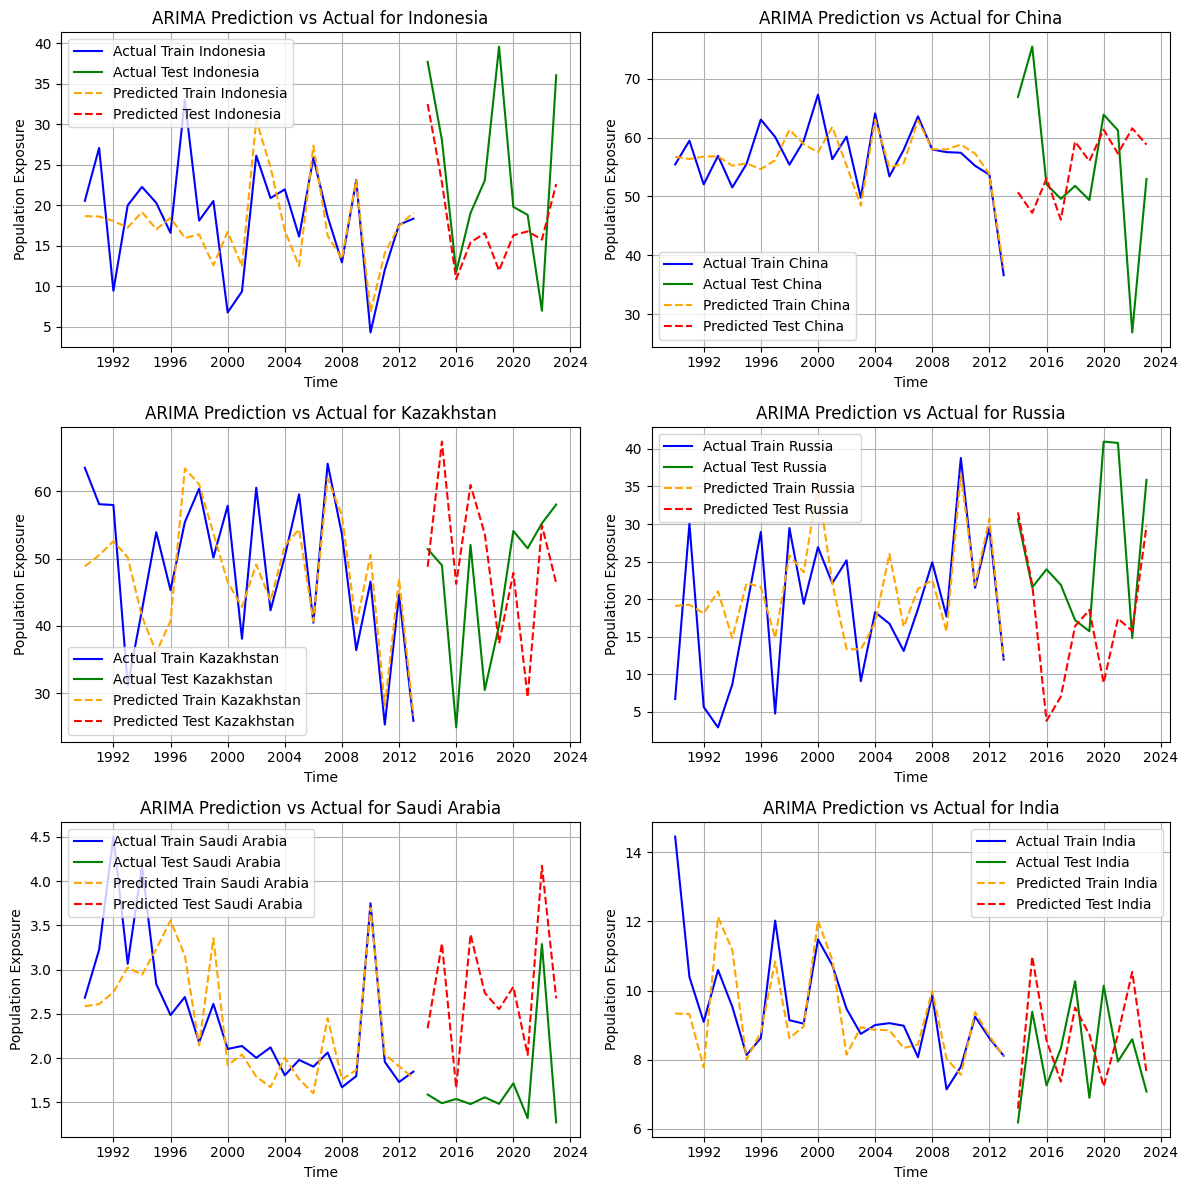

In [ ]:
# Daftar negara yang akan diproses
countries = ['Indonesia', 'China', 'Kazakhstan', 'Russia', 'Saudi Arabia','India']

# Membuat subplots (3 baris, 2 kolom)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Mengatur layout subplot
axes = axes.flatten()

# Menyusun hasil prediksi dan plotting untuk setiap negara
for i, country in enumerate(countries):
    # Mengambil prediksi dan data asli untuk negara ini
    ar_train_pred = results_arima[country]['Train Pred']
    ar_test_pred = results_arima[country]['Test Pred']
    actual_train = train_df[country]
    actual_test = test_df[country]

    # Menyesuaikan panjang test data dan prediksi
    min_length = min(len(actual_test), len(ar_test_pred))
    ar_test_pred_trimmed = ar_test_pred[:min_length]

    # Plot untuk negara ini
    ax = axes[i]  # Memilih subplot yang sesuai

    # Plot data asli (train dan test)
    ax.plot(actual_train.index, actual_train, label=f'Actual Train {country}', color='blue')
    ax.plot(actual_test.index[:min_length], actual_test[:min_length], label=f'Actual Test {country}', color='green')

    # Plot prediksi
    ax.plot(actual_train.index, ar_train_pred, label=f'Predicted Train {country}', linestyle='--', color='orange')
    ax.plot(actual_test.index[:min_length], ar_test_pred_trimmed, label=f'Predicted Test {country}', linestyle='--', color='red')

    # Menambahkan judul dan label
    ax.set_title(f'ARIMA Prediction vs Actual for {country}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Population Exposure')
    ax.legend()
    ax.grid(True)

# Menyesuaikan layout agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()


Interpretasi Umum

Secara keseluruhan, model ARIMA terlihat mampu menangkap pola umum dalam data, terutama tren dan musim. Namun, tingkat akurasi prediksi bervariasi antar negara. Beberapa hal yang bisa kita amati:

  Kemampuan Menangkap Tren: Model umumnya dapat mengikuti tren kenaikan atau penurunan yang terjadi pada data.
  Kemampuan Menangkap Musim: Untuk negara-negara dengan pola musiman yang jelas, model juga mampu menangkap fluktuasi musiman tersebut.
  Akurasi Prediksi:
        Data Latih: Prediksi pada data latih umumnya cukup baik, menunjukkan bahwa model telah "belajar" dengan baik dari data historis.
        Data Uji: Akurasi pada data uji lebih bervariasi. Beberapa negara menunjukkan prediksi yang cukup akurat seperti Cihina dan Indonesia , sementara yang lain memiliki kesalahan yang lebih besar.

In [ ]:
# Daftar negara yang akan dievaluasi
countries = ['Indonesia', 'China', 'Kazakhstan', 'Russia', 'Saudi Arabia','India']

# Menyusun dictionary untuk menyimpan hasil evaluasi
performance = {}

# Loop untuk menghitung RMSE dan MAPE untuk setiap negara
for country in countries:
    # Mengambil prediksi dan data asli untuk negara ini
    ar_train_pred = results_arima[country]['Train Pred']
    ar_test_pred = results_arima[country]['Test Pred']
    actual_train = train_df[country]
    actual_test = test_df[country]

    # Menyesuaikan panjang test data dan prediksi
    min_length = min(len(actual_test), len(ar_test_pred))
    ar_test_pred_trimmed = ar_test_pred[:min_length]

    # Menghitung RMSE dan MAPE
    rmse_train = mean_squared_error(actual_train, ar_train_pred) ** 0.5
    rmse_test = mean_squared_error(actual_test[:min_length], ar_test_pred_trimmed) ** 0.5
    mape_train = mean_absolute_percentage_error(actual_train, ar_train_pred)
    mape_test = mean_absolute_percentage_error(actual_test[:min_length], ar_test_pred_trimmed)

    # Menyimpan hasil evaluasi dalam dictionary
    performance[country] = {
        'Train RMSE': rmse_train,
        'Test RMSE': rmse_test,
        'Train MAPE': mape_train,
        'Test MAPE': mape_test,
    }

# Mengubah dictionary ke dalam DataFrame agar lebih rapi
performance_df = pd.DataFrame(performance)

# Menampilkan hasil evaluasi
performance_df


Indonesia      China  Kazakhstan     Russia  Saudi Arabia  \
Train RMSE   5.544358   3.762328    7.776629   7.462469      0.567706   
Test RMSE   10.719600  15.617801   14.455767  15.014630      1.204259   
Train MAPE   0.270278   0.046238    0.120030   0.699917      0.136433   
Test MAPE    0.348508   0.249386    0.303394   0.338508      0.708435   

               India  
Train RMSE  1.281518  
Test RMSE   1.497343  
Train MAPE  0.070390  
Test MAPE   0.155967

Hasil evaluasi menggunakan metode ARIMA menunjukkan performa yang bervariasi antar negara. Secara umum, ARIMA bekerja cukup baik untuk negara India, yang memiliki nilai error testing rendah (**RMSE: 1.497, MAPE: 0.156**), menunjukkan model dapat memprediksi data India dengan baik. Saudi Arabia juga memiliki hasil yang cukup baik pada testing (**RMSE: 1.204**), tetapi nilai MAPE testing yang tinggi (**0.708**) menunjukkan prediksi relatif kurang akurat dalam persentase.

Untuk negara lain, seperti Indonesia, China, Kazakhstan, dan Russia, performa model pada testing kurang optimal karena nilai RMSE dan MAPE testing yang cukup tinggi, misalnya untuk China (**Test RMSE: 15.618, MAPE: 0.249**). Hal ini menandakan bahwa ARIMA mungkin tidak sepenuhnya mampu menangkap pola data pada negara-negara ini, terutama jika terdapat variasi besar atau tren yang kompleks.

#Comperasion


In [ ]:
# Data perbandingan untuk Indonesia
comparison_df_indonesia = pd.DataFrame(data=[
    ['Double exp smoothing', 14.2787, 0.5198],
    ['Triple exp smoothing', 27.0310, 0.4384],
    ['ARIMA [15, 0, 15]', 10.7196, 0.3485]],
    columns=['Model', 'RMSE Indonesia', 'MAPE Indonesia']
)
comparison_df_indonesia.set_index('Model', inplace=True)

# Data perbandingan untuk China
comparison_df_China = pd.DataFrame(data=[
    ['Double exp smoothing', 27.5130, 0.4496],
    ['Triple exp smoothing', 17.0486, 0.2423],
    ['ARIMA [15, 0, 15]', 15.6178, 0.2493]],
    columns=['Model', 'RMSE China', 'MAPE China']
)
comparison_df_China.set_index('Model', inplace=True)

# Data perbandingan untuk Kazakhstan
comparison_df_Kazakhstan = pd.DataFrame(data=[
    ['Double exp smoothing', 14.4780, 0.2858],
    ['Triple exp smoothing', 14.2829, 0.2848],
    ['ARIMA [15, 0, 15]', 14.4557, 0.3033]],
    columns=['Model', 'RMSE Kazakhstan', 'MAPE Kazakhstan']
)
comparison_df_Kazakhstan.set_index('Model', inplace=True)


# Data perbandingan untuk Russia
comparison_df_Russia = pd.DataFrame(data=[
    ['Double exp smoothing',12.8322, 0.4405],
    ['Triple exp smoothing', 13.5705, 0.4512],
    ['ARIMA [15, 0, 15]', 15.0146, 0.3385]],
    columns=['Model', 'RMSE Russia', 'MAPE Russia']
)
comparison_df_Russia.set_index('Model', inplace=True)

# Data perbandingan untuk Saudi_Arabia
comparison_df_Saudi_Arabia = pd.DataFrame(data=[
    ['Double exp smoothing', 0.5348, 0.1882],
    ['Triple exp smoothing', 0.5315, 0.3004],
    ['ARIMA [15, 0, 15]', 1.2042, 0.7084]],
    columns=['Model', 'RMSE Saudi_Arabia', 'MAPE Saudi_Arabia']
)
comparison_df_Saudi_Arabia.set_index('Model', inplace=True)

# Data perbandingan untuk India
comparison_df_India = pd.DataFrame(data=[
    ['Double exp smoothing', 2.1952,0.2231],
    ['Triple exp smoothing', 1.9318,0.1840],
    ['ARIMA [15, 0, 15]', 1.4973, 0.1559]],
    columns=['Model', 'RMSE India', 'MAPE India']
)
comparison_df_India.set_index('Model', inplace=True)


###Indonesia


In [ ]:
# Mencari model terbaik untuk Indonesia

comparison_df_indonesia.sort_values(by='RMSE Indonesia', ascending=True)

RMSE Indonesia  MAPE Indonesia
Model                                               
ARIMA [15, 0, 15]            10.7196          0.3485
Double exp smoothing         14.2787          0.5198
Triple exp smoothing         27.0310          0.4384

In [ ]:
# ARIMA untuk indonesia
ar_indonesia = ARIMA(df_pivot['Indonesia'], order=(15,0,15)).fit()
ar_train_pred_indonesia = ar_indonesia.fittedvalues
ar_pred_indonesia = ar_indonesia.forecast(10)
ar_pred_indonesia

2024-01-01    30.720401
2025-01-01    13.701276
2026-01-01     4.413622
2027-01-01    11.649323
2028-01-01    13.186259
2029-01-01    26.690444
2030-01-01    18.265588
2031-01-01    16.169280
2032-01-01    15.567518
2033-01-01    16.987604
Freq: YS-JAN, Name: predicted_mean, dtype: float64

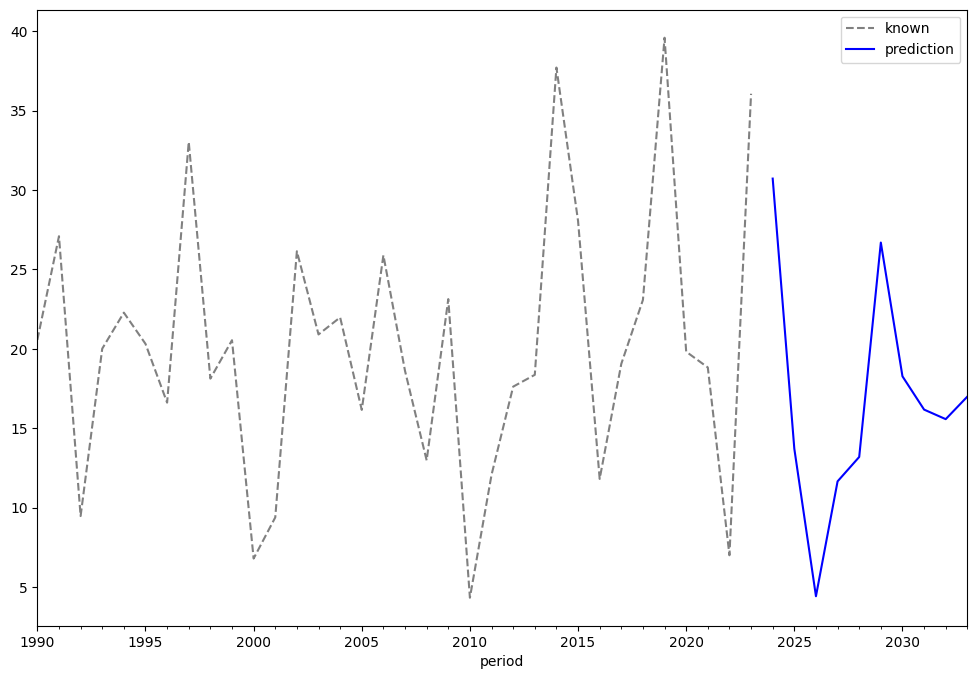

In [ ]:
df_pivot['Indonesia'].plot(style='--', color='gray', legend=True, label='known')
ar_pred_indonesia.plot(color='b', legend=True, label='prediction')
plt.show()

###China

In [ ]:
# Mencari model terbaik untuk China

comparison_df_China.sort_values(by='RMSE China', ascending=True)

RMSE China  MAPE China
Model                                       
ARIMA [15, 0, 15]        15.6178      0.2493
Triple exp smoothing     17.0486      0.2423
Double exp smoothing     27.5130      0.4496

In [ ]:
# ARIMA untuk China
ar_China = ARIMA(df_pivot['China'], order=(15,0,15)).fit()
ar_train_pred_China = ar_China.fittedvalues
ar_pred_China = ar_China.forecast(10)
ar_pred_China

2024-01-01    68.771274
2025-01-01    64.289109
2026-01-01    52.935652
2027-01-01    39.912317
2028-01-01    54.661921
2029-01-01    56.563596
2030-01-01    56.949338
2031-01-01    57.289680
2032-01-01    47.080957
2033-01-01    56.531179
Freq: YS-JAN, Name: predicted_mean, dtype: float64

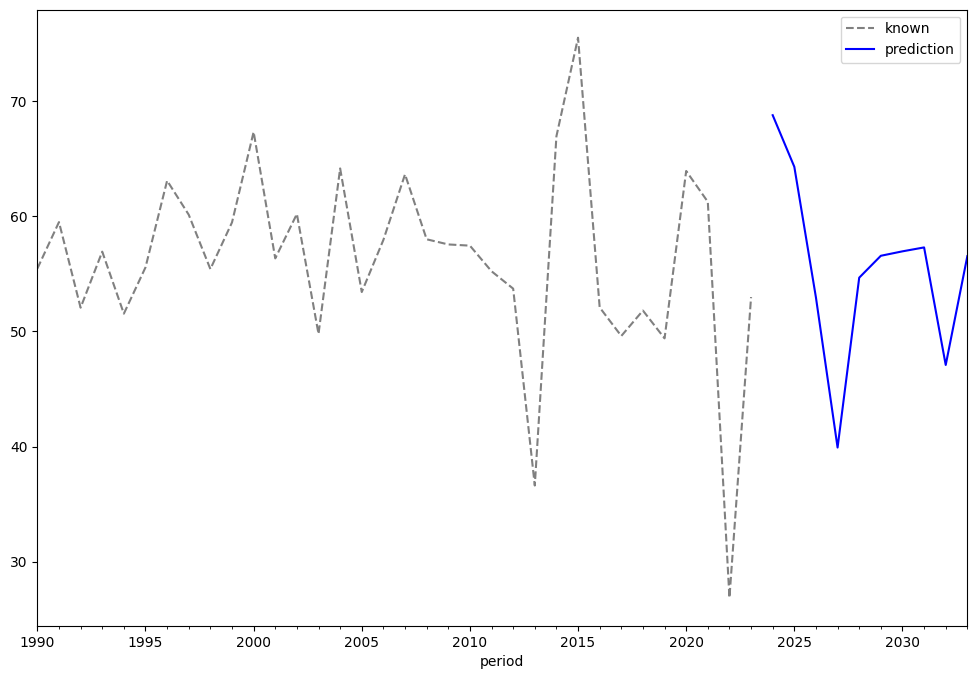

In [ ]:
df_pivot['China'].plot(style='--', color='gray', legend=True, label='known')
ar_pred_China.plot(color='b', legend=True, label='prediction')
plt.show()

###Kazakhstan

In [ ]:
# Mencari model terbaik untuk Kazakhstan

comparison_df_Kazakhstan.sort_values(by='RMSE Kazakhstan', ascending=True)

RMSE Kazakhstan  MAPE Kazakhstan
Model                                                 
Triple exp smoothing          14.2829           0.2848
ARIMA [15, 0, 15]             14.4557           0.3033
Double exp smoothing          14.4780           0.2858

In [ ]:
# # menggunakan seasonal_periods=12, mengasumsikan pola musiman berulang setiap 12 periode (misalnya, musiman tahunan dengan data bulanan).
hw_model_Kazakhstan = ExponentialSmoothing(
    df_pivot['Kazakhstan'],
    trend='add',  # Mengatur komponen tren menjadi 'add'
    initialization_method='heuristic',
    seasonal='add',
    seasonal_periods=12,
    damped_trend=True
).fit()

# Memprediksi 12 tahun ke depan
hw_exp_pred_Kazakhstan = hw_model_Kazakhstan.forecast(10)
hw_exp_pred_Kazakhstan

2024-01-01    51.043705
2025-01-01    31.141090
2026-01-01    53.818331
2027-01-01    38.452452
2028-01-01    43.461519
2029-01-01    52.864611
2030-01-01    37.281819
2031-01-01    59.412001
2032-01-01    42.118091
2033-01-01    48.950364
Freq: YS-JAN, dtype: float64

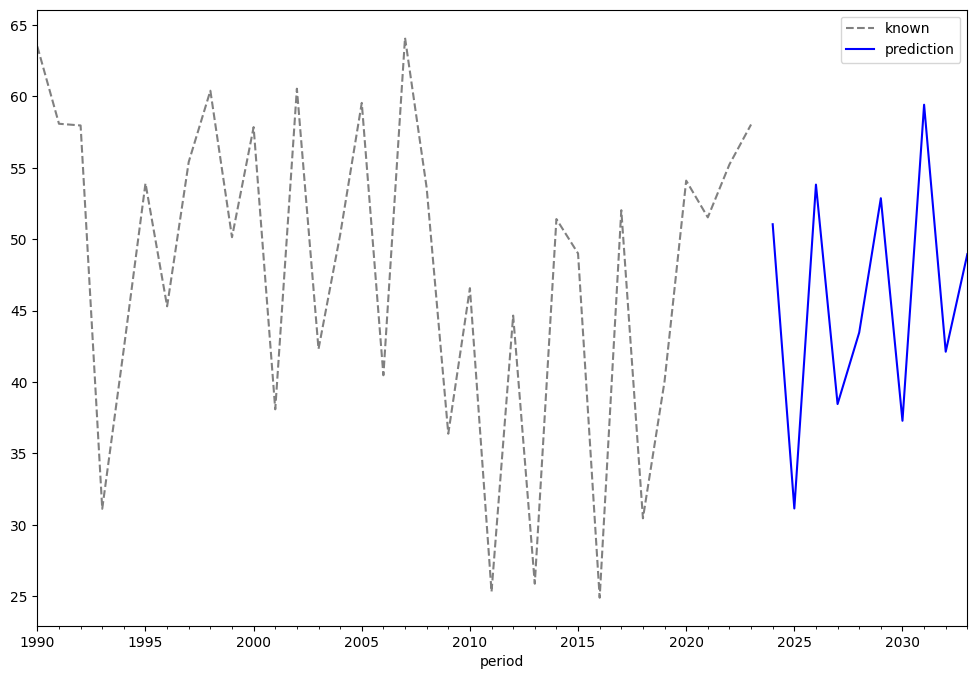

In [ ]:
df_pivot['Kazakhstan'].plot(style='--', color='gray', legend=True, label='known')
hw_exp_pred_Kazakhstan.plot(color='b', legend=True, label='prediction')
plt.show()

###Russia

In [ ]:

# Mencari model terbaik untuk Russia

comparison_df_Russia.sort_values(by='RMSE Russia', ascending=True)

RMSE Russia  MAPE Russia
Model                                         
Double exp smoothing      12.8322       0.4405
Triple exp smoothing      13.5705       0.4512
ARIMA [15, 0, 15]         15.0146       0.3385

In [ ]:
# menggunakan seasonal_periods=12, mengasumsikan pola musiman berulang setiap 12 periode (misalnya, musiman tahunan dengan data bulanan).
double_exp_Russia = ExponentialSmoothing(df_pivot['Russia'], trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=12, damped_trend=False).fit()
# Memprediksi 12 tahun kedepan
double_exp_pred_Russia = double_exp_Russia.forecast(10)

double_exp_pred_Russia

2024-01-01    32.318216
2025-01-01    25.555174
2026-01-01    29.375034
2027-01-01    18.152800
2028-01-01    21.949726
2029-01-01    19.894249
2030-01-01    16.922484
2031-01-01    22.116512
2032-01-01    35.923551
2033-01-01    17.163999
Freq: YS-JAN, dtype: float64

<Axes: xlabel='period'>

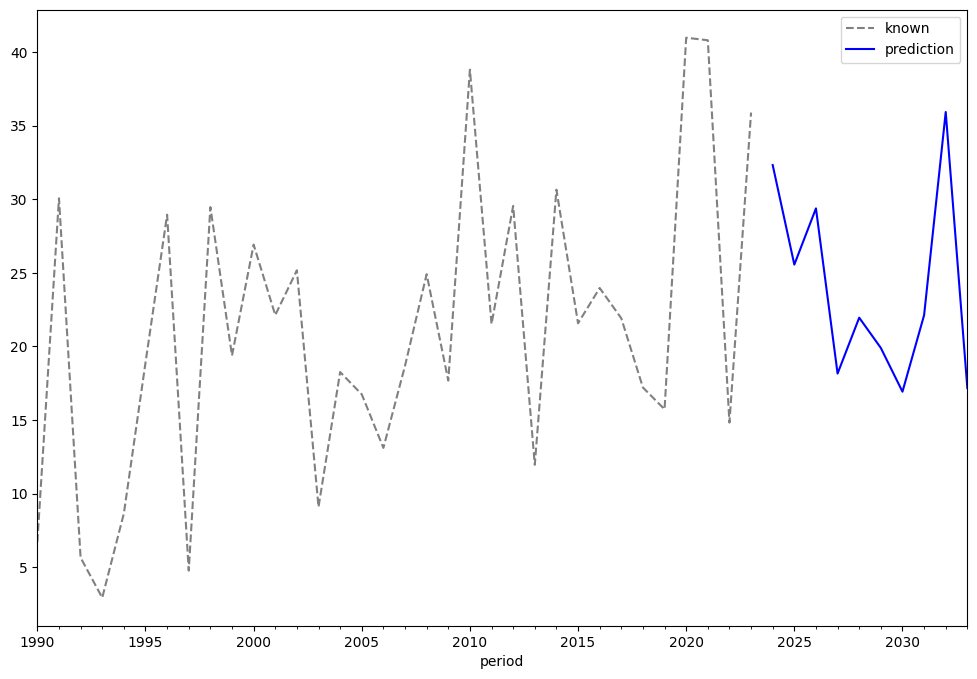

In [ ]:
df_pivot['Russia'].plot(style='--', color='gray', legend=True, label='known')
double_exp_pred_Russia.plot(color='b', legend=True, label='prediction')

###Saudi_Arabia

In [ ]:
# Mencari model terbaik untuk Saudi_Arabia

comparison_df_Saudi_Arabia.sort_values(by='RMSE Saudi_Arabia', ascending=True)


RMSE Saudi_Arabia  MAPE Saudi_Arabia
Model                                                     
Triple exp smoothing             0.5315             0.3004
Double exp smoothing             0.5348             0.1882
ARIMA [15, 0, 15]                1.2042             0.7084

In [ ]:
# # menggunakan seasonal_periods=12, mengasumsikan pola musiman berulang setiap 12 periode (misalnya, musiman tahunan dengan data bulanan).
hw_model_Saudi_Arabia = ExponentialSmoothing(
    df_pivot['Saudi Arabia'],
    trend='add',  # Mengatur komponen tren menjadi 'add'
    initialization_method='heuristic',
    seasonal='add',
    seasonal_periods=12,
    damped_trend=True
).fit()

# Memprediksi 12 tahun ke depan
hw_exp_pred_Saudi_Arabia = hw_model_Saudi_Arabia.forecast(10)
hw_exp_pred_Saudi_Arabia

2024-01-01    1.407965
2025-01-01    1.529574
2026-01-01    1.365572
2027-01-01    1.506876
2028-01-01    1.571279
2029-01-01    1.431502
2030-01-01    1.612457
2031-01-01    1.490827
2032-01-01    1.350126
2033-01-01    1.350441
Freq: YS-JAN, dtype: float64

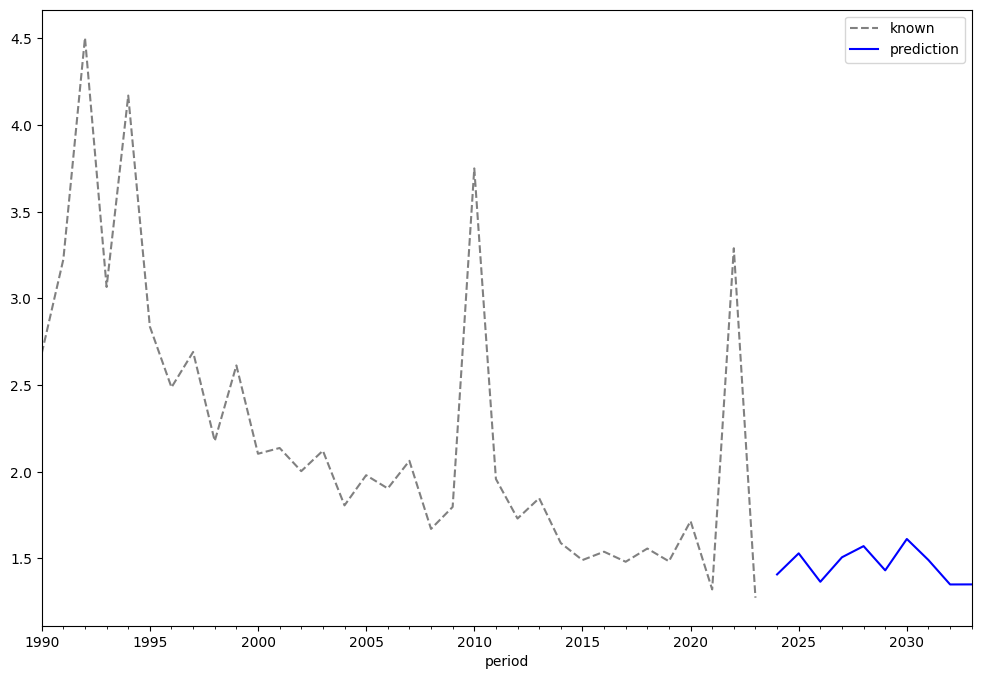

In [ ]:
df_pivot['Saudi Arabia'].plot(style='--', color='gray', legend=True, label='known')
hw_exp_pred_Saudi_Arabia.plot(color='b', legend=True, label='prediction')
plt.show()

###India

In [ ]:
# Mencari model terbaik untuk India

comparison_df_India.sort_values(by='RMSE India', ascending=True)

RMSE India  MAPE India
Model                                       
ARIMA [15, 0, 15]         1.4973      0.1559
Triple exp smoothing      1.9318      0.1840
Double exp smoothing      2.1952      0.2231

In [ ]:
# ARIMA untuk India
ar_India = ARIMA(df_pivot['India'], order=(15,0,15)).fit()
ar_train_pred_India = ar_India.fittedvalues
ar_pred_India = ar_India.forecast(10)
ar_pred_India

2024-01-01    6.095201
2025-01-01    7.600130
2026-01-01    5.754403
2027-01-01    9.733727
2028-01-01    7.339474
2029-01-01    7.444435
2030-01-01    9.130158
2031-01-01    7.292532
2032-01-01    8.830884
2033-01-01    7.506919
Freq: YS-JAN, Name: predicted_mean, dtype: float64

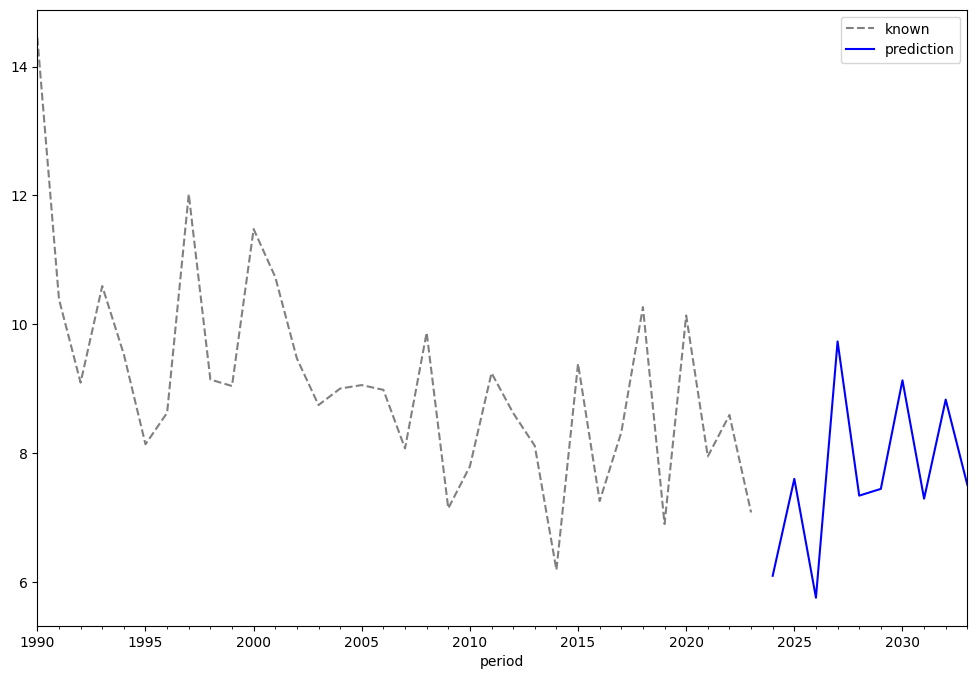

In [ ]:
df_pivot['India'].plot(style='--', color='gray', legend=True, label='known')
ar_pred_India.plot(color='b', legend=True, label='prediction')
plt.show()

##Gabungan

In [ ]:
# Menggabungkan hasil prediksi ke dalam satu DataFrame untuk tampilan yang lebih rapi
predictions_df = pd.DataFrame({
    'period': pd.date_range(start=df_pivot.index[-1] + pd.DateOffset(years=1), periods=10, freq='Y').date,
    'Indonesia': ar_pred_indonesia,
    'China': ar_pred_China,
    'Kazakhstan': hw_exp_pred_Kazakhstan,
    'Russia': double_exp_pred_Russia,
    'Saudi Arabia': hw_exp_pred_Saudi_Arabia,
    'India': ar_pred_India,
})

# Menampilkan hasil prediksi sebagai tabel
predictions_df.style.set_caption("Hasil Prediksi 10 Tahun ke Depan").set_table_attributes('style="width: 100%; border-collapse: collapse;"')


Insight yang bisa didapat dari tabel prediksi 10 tahun ke depan untuk negara-negara yang dianalisis:

Insight Berdasarkan Data Prediksi
Indonesia
Tren: Paparan panas di Indonesia menunjukkan pola fluktuasi, dengan puncak tinggi pada 2024 (30.72) dan penurunan tajam pada 2026 (4.41).
Interpretasi: Ini bisa jadi menandakan bahwa dampak gelombang panas di Indonesia akan sangat variatif, mungkin dipengaruhi oleh pola cuaca seperti El Niño atau perubahan iklim lokal.

China: Paparan panas di China cenderung stabil di rentang 40–70, meskipun ada penurunan signifikan pada 2027 (39.91).
Interpretasi: China menghadapi risiko paparan panas tinggi secara konsisten, yang dapat berdampak signifikan pada kesehatan publik, terutama di wilayah perkotaan yang padat penduduk.

Kazakhstan: Nilai paparan panas di Kazakhstan bervariasi tetapi cenderung meningkat hingga mencapai puncaknya pada 2031 (59.41).
Interpretasi: Ini menunjukkan bahwa wilayah ini akan semakin terdampak oleh gelombang panas di masa depan, meskipun awalnya risikonya lebih rendah.

Russia: Paparan panas di Russia menunjukkan fluktuasi tajam, dengan penurunan pada 2028 (21.95) tetapi melonjak ke angka 35.92 pada 2032.
Interpretasi: Meskipun Rusia dikenal dengan iklim yang lebih dingin, perubahan iklim dapat menyebabkan gelombang panas musiman yang lebih intens, terutama di wilayah selatan.

Saudi Arabia: Paparan panas di Saudi Arabia sangat stabil, berkisar di angka 1.3 hingga 1.6.
Interpretasi: Meskipun panas ekstrem adalah kondisi normal di wilayah ini, populasi tampaknya sudah beradaptasi dengan baik, sehingga paparan panas tidak menunjukkan peningkatan signifikan.

India: India menunjukkan tren peningkatan paparan panas, dari 6.10 pada 2024 hingga 9.73 pada 2027, sebelum stabil di angka 7-9.
Interpretasi: India menghadapi risiko gelombang panas yang meningkat, terutama karena pertumbuhan populasi yang padat di wilayah urban yang rentan terhadap efek "pulau panas."




In [ ]:
# Menghapus bagian waktu (00:00:00) dan hanya menampilkan tanggal
predictions_df['period'] = pd.to_datetime(predictions_df['period']).dt.date

# Menampilkan hasil prediksi dengan tanggal saja
predictions_df


period  Indonesia      China  Kazakhstan     Russia  \
2024-01-01  2024-12-31  30.720401  68.771274   51.043705  32.318216   
2025-01-01  2025-12-31  13.701276  64.289109   31.141090  25.555174   
2026-01-01  2026-12-31   4.413622  52.935652   53.818331  29.375034   
2027-01-01  2027-12-31  11.649323  39.912317   38.452452  18.152800   
2028-01-01  2028-12-31  13.186259  54.661921   43.461519  21.949726   
2029-01-01  2029-12-31  26.690444  56.563596   52.864611  19.894249   
2030-01-01  2030-12-31  18.265588  56.949338   37.281819  16.922484   
2031-01-01  2031-12-31  16.169280  57.289680   59.412001  22.116512   
2032-01-01  2032-12-31  15.567518  47.080957   42.118091  35.923551   
2033-01-01  2033-12-31  16.987604  56.531179   48.950364  17.163999   

            Saudi Arabia     India  
2024-01-01      1.407965  6.095201  
2025-01-01      1.529574  7.600130  
2026-01-01      1.365572  5.754403  
2027-01-01      1.506876  9.733727  
2028-01-01      1.571279  7.339474  
2029-01-01      1.431502  7.444435  
2030-01-01      1.612457  9.130158  
2031-01-01      1.490827  7.292532  
2032-01-01      1.350126  8.830884  
2033-01-01      1.350441  7.506919

In [ ]:
df_pivot

China      India  Indonesia  Kazakhstan     Russia  \
period                                                               
1990-01-01  55.451665  14.449631  20.559384   63.489118   6.712737   
1991-01-01  59.489104  10.390094  27.089102   58.078624  30.062201   
1992-01-01  52.056536   9.094017   9.463780   57.959124   5.648306   
1993-01-01  56.922244  10.593122  20.007212   31.120523   2.923997   
1994-01-01  51.537795   9.532933  22.276223   42.344962   8.646929   
1995-01-01  55.554452   8.136755  20.311439   53.911638  18.885875   
1996-01-01  63.086860   8.626315  16.607236   45.297701  28.944020   
1997-01-01  60.127603  12.021489  33.027623   55.409624   4.766965   
1998-01-01  55.409839   9.141810  18.120064   60.392019  29.462827   
1999-01-01  59.460608   9.041741  20.540045   50.135597  19.374571   
2000-01-01  67.318457  11.478162   6.787645   57.842704  26.915044   
2001-01-01  56.337250  10.733846   9.379029   38.085164  22.125395   
2002-01-01  60.196606   9.469863  26.142192   60.532494  25.169693   
2003-01-01  49.781023   8.746056  20.902961   42.303510   9.088764   
2004-01-01  64.147123   9.002417  21.977339   50.294437  18.255139   
2005-01-01  53.416191   9.056210  16.149153   59.539363  16.741459   
2006-01-01  57.943023   8.981706  25.891834   40.468165  13.102754   
2007-01-01  63.634823   8.071966  18.607618   64.102457  18.682741   
2008-01-01  57.995720   9.871049  12.971208   53.600980  24.905248   
2009-01-01  57.548309   7.142453  23.129334   36.376987  17.676916   
2010-01-01  57.443870   7.794357   4.319528   46.567243  38.794478   
2011-01-01  55.219510   9.243718  12.059919   25.310033  21.519635   
2012-01-01  53.710882   8.622721  17.615157   44.646498  29.541563   
2013-01-01  36.614849   8.113634  18.359962   25.873217  11.954285   
2014-01-01  66.938349   6.186209  37.714009   51.406854  30.646029   
2015-01-01  75.498890   9.387959  28.057993   48.997242  21.569117   
2016-01-01  52.079344   7.255570  11.802897   24.892495  23.966827   
2017-01-01  49.599609   8.322446  19.051486   52.026016  21.906672   
2018-01-01  51.807227  10.267275  23.078239   30.452983  17.203161   
2019-01-01  49.392750   6.899016  39.593113   40.047541  15.725622   
2020-01-01  63.928751  10.136299  19.815899   54.096868  40.969543   
2021-01-01  61.250757   7.948300  18.823752   51.523410  40.797474   
2022-01-01  26.870622   8.591882   6.993986   55.228697  14.821982   
2023-01-01  52.977458   7.078080  36.063690   58.026301  35.883320   

            Saudi Arabia  
period                    
1990-01-01      2.682644  
1991-01-01      3.225438  
1992-01-01      4.503924  
1993-01-01      3.066234  
1994-01-01      4.170282  
1995-01-01      2.837682  
1996-01-01      2.487064  
1997-01-01      2.691189  
1998-01-01      2.177563  
1999-01-01      2.613574  
2000-01-01      2.104062  
2001-01-01      2.137317  
2002-01-01      2.003707  
2003-01-01      2.121792  
2004-01-01      1.806240  
2005-01-01      1.980263  
2006-01-01      1.903995  
2007-01-01      2.063340  
2008-01-01      1.670577  
2009-01-01      1.797307  
2010-01-01      3.750119  
2011-01-01      1.958588  
2012-01-01      1.730289  
2013-01-01      1.847595  
2014-01-01      1.588986  
2015-01-01      1.490765  
2016-01-01      1.538994  
2017-01-01      1.481050  
2018-01-01      1.557279  
2019-01-01      1.483676  
2020-01-01      1.715791  
2021-01-01      1.321411  
2022-01-01      3.289547  
2023-01-01      1.273601

In [ ]:
# Menggabungkan data historis dan prediksi berdasarkan periode
combined_df = pd.concat([df_pivot, predictions_df.set_index('period')], axis=0)

# Mengatur indeks ulang jika diperlukan (untuk memastikan period yang konsisten)
combined_df.reset_index(inplace=True)
combined_df.rename(columns={'index': 'period'}, inplace=True)

# Menampilkan DataFrame gabungan
combined_df.style.set_caption("Data Historis dan Prediksi 10 Tahun ke Depan").set_table_attributes('style="width: 100%; border-collapse: collapse;"')


Insight yang dapat diambil dari data prediksi population heat exposure selama 10 tahun ke depan (2024–2033) berdasarkan data historis:

China: Diperkirakan akan mengalami penurunan secara perlahan, terutama setelah mencapai puncaknya pada tahun 2024. Namun, China tetap memiliki tingkat eksposur yang cukup tinggi dibandingkan negara lain.

India: Angka eksposur relatif stabil dengan fluktuasi kecil. Tingkat eksposur di India cenderung berada pada level menengah ke bawah.

Indonesia: Diprediksi mengalami fluktuasi besar, terutama penurunan signifikan pada 2026 sebelum kembali meningkat pada tahun-tahun berikutnya.

Kazakhstan: Eksposur di Kazakhstan diperkirakan tetap tinggi, dengan fluktuasi tajam tetapi tanpa pola penurunan yang jelas.

Russia: Angka eksposur di Rusia menunjukkan penurunan stabil hingga 2029, tetapi meningkat kembali di tahun-tahun selanjutnya.

Saudi Arabia: Tetap memiliki eksposur terendah di antara semua negara, dengan angka yang relatif stabil tanpa banyak perubahan signifikan.


In [ ]:
# Menyimpan DataFrame ke dalam file CSV
combined_df.to_csv('DataModelingFinalPriject.csv', index=False)
# Menyimpan DataFrame ke dalam file Excel
combined_df.to_excel('DataModelingFinalPriject.xlsx', index=False)


In [ ]:
df = pd.read_csv('DataModelingFinalPriject.csv')

In [ ]:
df['period'] = pd.to_datetime(df['period'], format='mixed').dt.date
df

period      China      India  Indonesia  Kazakhstan     Russia  \
0   1990-01-01  55.451665  14.449631  20.559384   63.489118   6.712737   
1   1991-01-01  59.489104  10.390094  27.089102   58.078624  30.062201   
2   1992-01-01  52.056536   9.094017   9.463780   57.959124   5.648306   
3   1993-01-01  56.922244  10.593122  20.007212   31.120523   2.923997   
4   1994-01-01  51.537795   9.532933  22.276223   42.344962   8.646929   
5   1995-01-01  55.554452   8.136755  20.311439   53.911638  18.885875   
6   1996-01-01  63.086860   8.626315  16.607236   45.297701  28.944020   
7   1997-01-01  60.127603  12.021489  33.027623   55.409624   4.766965   
8   1998-01-01  55.409839   9.141810  18.120064   60.392019  29.462827   
9   1999-01-01  59.460608   9.041741  20.540045   50.135597  19.374571   
10  2000-01-01  67.318457  11.478162   6.787645   57.842704  26.915044   
11  2001-01-01  56.337250  10.733846   9.379029   38.085164  22.125395   
12  2002-01-01  60.196606   9.469863  26.142192   60.532494  25.169693   
13  2003-01-01  49.781023   8.746056  20.902961   42.303510   9.088764   
14  2004-01-01  64.147123   9.002417  21.977339   50.294437  18.255139   
15  2005-01-01  53.416191   9.056210  16.149153   59.539363  16.741459   
16  2006-01-01  57.943023   8.981706  25.891834   40.468165  13.102754   
17  2007-01-01  63.634823   8.071966  18.607618   64.102457  18.682741   
18  2008-01-01  57.995720   9.871049  12.971208   53.600980  24.905248   
19  2009-01-01  57.548309   7.142453  23.129334   36.376987  17.676916   
20  2010-01-01  57.443870   7.794357   4.319528   46.567243  38.794478   
21  2011-01-01  55.219510   9.243718  12.059919   25.310033  21.519635   
22  2012-01-01  53.710882   8.622721  17.615157   44.646498  29.541563   
23  2013-01-01  36.614849   8.113634  18.359962   25.873217  11.954285   
24  2014-01-01  66.938349   6.186209  37.714009   51.406854  30.646029   
25  2015-01-01  75.498890   9.387959  28.057993   48.997242  21.569117   
26  2016-01-01  52.079344   7.255570  11.802897   24.892495  23.966827   
27  2017-01-01  49.599609   8.322446  19.051486   52.026016  21.906672   
28  2018-01-01  51.807227  10.267275  23.078239   30.452983  17.203161   
29  2019-01-01  49.392750   6.899016  39.593113   40.047541  15.725622   
30  2020-01-01  63.928751  10.136299  19.815899   54.096868  40.969543   
31  2021-01-01  61.250757   7.948300  18.823752   51.523410  40.797474   
32  2022-01-01  26.870622   8.591882   6.993986   55.228697  14.821982   
33  2023-01-01  52.977458   7.078080  36.063690   58.026301  35.883320   
34  2024-12-31  68.771274   6.095201  30.720401   51.043705  32.318216   
35  2025-12-31  64.289109   7.600130  13.701276   31.141090  25.555174   
36  2026-12-31  52.935652   5.754403   4.413622   53.818331  29.375034   
37  2027-12-31  39.912317   9.733727  11.649323   38.452452  18.152800   
38  2028-12-31  54.661921   7.339474  13.186259   43.461519  21.949726   
39  2029-12-31  56.563596   7.444435  26.690444   52.864611  19.894249   
40  2030-12-31  56.949338   9.130158  18.265588   37.281819  16.922484   
41  2031-12-31  57.289680   7.292532  16.169280   59.412001  22.116512   
42  2032-12-31  47.080957   8.830884  15.567518   42.118091  35.923551   
43  2033-12-31  56.531179   7.506919  16.987604   48.950364  17.163999   

    Saudi Arabia  
0       2.682644  
1       3.225438  
2       4.503924  
3       3.066234  
4       4.170282  
5       2.837682  
6       2.487064  
7       2.691189  
8       2.177563  
9       2.613574  
10      2.104062  
11      2.137317  
12      2.003707  
13      2.121792  
14      1.806240  
15      1.980263  
16      1.903995  
17      2.063340  
18      1.670577  
19      1.797307  
20      3.750119  
21      1.958588  
22      1.730289  
23      1.847595  
24      1.588986  
25      1.490765  
26      1.538994  
27      1.481050  
28      1.557279  
29      1.483676  
30      1.715791  
31      1.321411  
32      3.289547  
33      1.273601  
34      1.40

In [ ]:
data = df.reset_index().melt(id_vars='period', var_name='nation', value_name='Population exposure to hot days')


In [ ]:
df2 = data[data['nation'] != 'index'].reset_index(drop=True)
df2

period        nation  Population exposure to hot days
0    1990-01-01         China                        55.451665
1    1991-01-01         China                        59.489104
2    1992-01-01         China                        52.056536
3    1993-01-01         China                        56.922244
4    1994-01-01         China                        51.537795
..          ...           ...                              ...
259  2029-12-31  Saudi Arabia                         1.431502
260  2030-12-31  Saudi Arabia                         1.612457
261  2031-12-31  Saudi Arabia                         1.490827
262  2032-12-31  Saudi Arabia                         1.350126
263  2033-12-31  Saudi Arabia                         1.350441

[264 rows x 3 columns]

Eksposur Panas Berdasarkan Negara

China:
China memiliki tingkat eksposur panas tertinggi dibandingkan negara lain, terutama di awal periode. Namun, eksposur ini menunjukkan fluktuasi dari tahun ke tahun, dengan beberapa tahun tertentu mengalami penurunan.

India:
Tingkat eksposur di India relatif rendah dibandingkan China, tetapi cenderung stabil dengan sedikit kenaikan atau penurunan kecil. Hal ini menunjukkan bahwa India mungkin lebih konsisten dalam menghadapi perubahan panas.

Indonesia:
Eksposur di Indonesia memiliki pola fluktuasi yang lebih tajam. Beberapa tahun menunjukkan peningkatan signifikan, sementara di tahun lainnya terjadi penurunan drastis.

Kazakhstan:
Kazakhstan memiliki tingkat eksposur panas yang tinggi dan cenderung konsisten. Negara ini mungkin perlu memberikan perhatian khusus terhadap adaptasi lingkungan.

Russia:
Eksposur di Rusia memiliki tren menurun secara perlahan. Namun, Rusia tetap menunjukkan eksposur panas yang signifikan di beberapa tahun tertentu, sehingga tetap membutuhkan strategi mitigasi.

Saudi Arabia:
Saudi Arabia memiliki tingkat eksposur terendah di antara semua negara. Angka ini stabil dan tidak menunjukkan fluktuasi yang signifikan, tetapi tetap membutuhkan perhatian untuk menjaga stabilitas tersebut.


In [ ]:
df2.head(44)

period nation  Population exposure to hot days
0   1990-01-01  China                        55.451665
1   1991-01-01  China                        59.489104
2   1992-01-01  China                        52.056536
3   1993-01-01  China                        56.922244
4   1994-01-01  China                        51.537795
5   1995-01-01  China                        55.554452
6   1996-01-01  China                        63.086860
7   1997-01-01  China                        60.127603
8   1998-01-01  China                        55.409839
9   1999-01-01  China                        59.460608
10  2000-01-01  China                        67.318457
11  2001-01-01  China                        56.337250
12  2002-01-01  China                        60.196606
13  2003-01-01  China                        49.781023
14  2004-01-01  China                        64.147123
15  2005-01-01  China                        53.416191
16  2006-01-01  China                        57.943023
17  2007-01-01  China                        63.634823
18  2008-01-01  China                        57.995720
19  2009-01-01  China                        57.548309
20  2010-01-01  China                        57.443870
21  2011-01-01  China                        55.219510
22  2012-01-01  China                        53.710882
23  2013-01-01  China                        36.614849
24  2014-01-01  China                        66.938349
25  2015-01-01  China                        75.498890
26  2016-01-01  China                        52.079344
27  2017-01-01  China                        49.599609
28  2018-01-01  China                        51.807227
29  2019-01-01  China                        49.392750
30  2020-01-01  China                        63.928751
31  2021-01-01  China                        61.250757
32  2022-01-01  China                        26.870622
33  2023-01-01  China                        52.977458
34  2024-12-31  China                        68.771274
35  2025-12-31  China                        64.289109
36  2026-12-31  China                        52.935652
37  2027-12-31  China                        39.912317
38  2028-12-31  China                        54.661921
39  2029-12-31  China                        56.563596
40  2030-12-31  China                        56.949338
41  2031-12-31  China                        57.289680
42  2032-12-31  China                        47.080957
43  2033-12-31  China                        56.531179

In [ ]:
df2.to_csv('ModelingFinpro.csv', index=False)
df2.to_excel('ModelingFinpro.xlsx', index=False)
